In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import pingouin as pg


In [3]:
!pip install --upgrade scipy
!pip install --upgrade pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 KB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 40.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pingouin: filename=pingouin-0.5.3-py3-none-any.whl size=198588 sha256=3faaaa392f0d83b6f9124ae34446f5f634d64de75d6358b8f1ef6e5d91022e50
  Stored in directory: /root/.cache/pip/wheels/60/1e/21/710be95d0c93ea9ac3c0e6bacd

In [ ]:
print(scipy.__version__)

1.7.3


In [ ]:
print(pg.__version__)

0.5.1


In [ ]:
pip install --upgrade pingouin

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#Download dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option("max_rows", None)

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/BIA/ibm_dataset.csv')
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  YearsInCurrentRole YearsSinceLastPromotion  YearsWithCurrManager  \
0  ...                   4                       0                     5   
1  ...                   7                       1                     7   
2  ...                   0                       0                     0   
3  ...                   7                       3                     0   
4  ...                   2                       2                     2   

   somethingnew  OverallSatisfaction MinimumSatis  EngagementType %SalOver18  \
0             0                  2.2            1      Disengaged      False   
1             0                  2.8            2         Neutral       True   
2             0                  2.8            2         Neutral      False   
3             0                  3.2            3  Highly Engaged      False   
4             0                  2.6            1         Neutral      False   

   TalentStatus      Hours  
0             N  63.755319  
1             Y  84.098361  
2             N  22.717391  
3             N  51.946429  
4             N  86.700000  

[5 rows x 42 columns]

In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'somethingnew', 'OverallSatisfaction',
       'MinimumSatis', 'EngagementType', '%SalOver18', 'TalentStatus',
       'Hours'],
      dtype='object')

# New Section

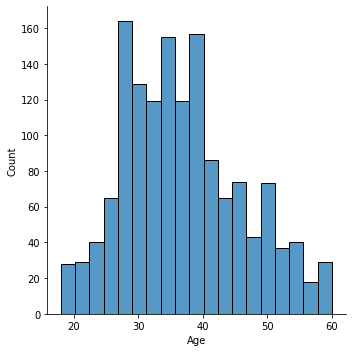

In [ ]:
sns.displot(data['Age'])

# Data Cleansing

##Checking missing values

In [ ]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##Check datatypes

In [ ]:
data.dtypes

Age                           int64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

In [ ]:
categorical_var = data.select_dtypes(include = 'object').columns
numerical_var = data.select_dtypes(include = 'int64').columns

In [ ]:
print(f"no of numerical values: {len(numerical_var)}")
print(f"no of categorical values: {len(categorical_var)}")

no of numerical values: 28
no of categorical values: 11


In [ ]:
numerical_var

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'somethingnew',
       'MinimumSatis'],
      dtype='object')

In [ ]:
data["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data.groupby("Gender").agg( {"Age": ['count', 'mean', 'max', 'min']})

Age                   
       count       mean max min
Gender                         
Female   588  37.329932  60  18
Male     882  36.653061  60  18

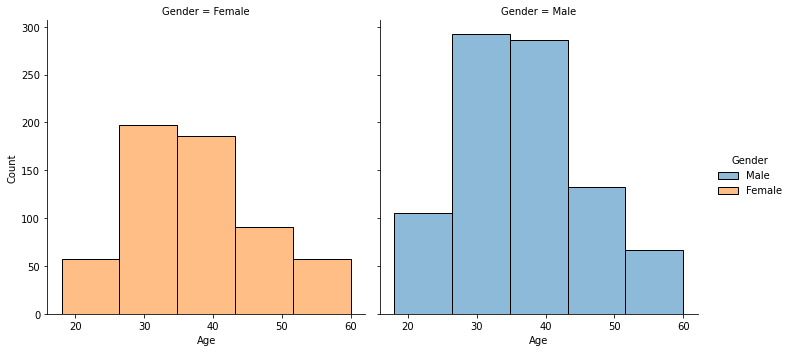

In [ ]:
sns.displot(data=data,x = "Age" , col = "Gender", 
               hue = "Gender", bins = 5, hue_order = ['Male', 'Female'])

plt.show()


##Encoding attrition label

In [ ]:
from sklearn import preprocessing

In [ ]:
print(data['Attrition'].unique())
att_encoder = preprocessing.LabelEncoder().fit(["No", "Yes"])
att_encoder.transform(data["Attrition"])

['Yes' 'No']


array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
att_encoder.classes_

array(['No', 'Yes'], dtype='<U3')

In [ ]:
print(att_encoder.transform(["No"]))
print(att_encoder.transform(["Yes"]))

[0]
[1]


In [ ]:
print(data['Attrition'].unique())

['Yes' 'No']


In [ ]:
copy_data = data.copy(deep = True)
copy_data['encoded_attrition'] = att_encoder.transform(data["Attrition"])
copy_data[["Attrition", "encoded_attrition"]]

Attrition  encoded_attrition
0          Yes                  1
1           No                  0
2          Yes                  1
3           No                  0
4           No                  0
5           No                  0
6           No                  0
7           No                  0
8           No                  0
9           No                  0
10          No                  0
11          No                  0
12          No                  0
13          No                  0
14         Yes                  1
15          No                  0
16          No                  0
17          No                  0
18          No                  0
19          No                  0
20          No                  0
21         Yes                  1
22          No                  0
23          No                  0
24         Yes                  1
25          No                  0
26         Yes                  1
27          No                  0
28          No                  0
29          No                  0
30          No                  0
31          No                  0
32          No                  0
33         Yes                  1
34         Yes                  1
35          No                  0
36         Yes                  1
37          No                  0
38          No                  0
39          No                  0
40          No                  0
41          No                  0
42         Yes                  1
43          No                  0
44          No                  0
45         Yes                  1
46          No                  0
47          No                  0
48          No                  0
49          No                  0
50         Yes                  1
51         Yes                  1
52          No                  0
53          No                  0
54          No                  0
55          No                  0
56          No                  0
57          No                  0
58          No                  0
59          No                  0
60          No                  0
61          No                  0
62          No                  0
63          No                  0
64          No                  0
65          No                  0
66          No                  0
67          No                  0
68          No                  0
69         Yes                  1
70          No                  0
71          No                  0
72          No                  0
73          No                  0
74          No                  0
75          No                  0
76          No                  0
77          No                  0
78          No                  0
79          No                  0
80          No                  0
81          No                  0
82          No                  0
83          No                  0
84          No                  0
85          No                  0
86          No                  0
87          No                  0
88          No                  0
89         Yes                  1
90          No                  0
91          No                  0
92          No                  0
93          No                  0
94          No                  0
95          No                  0
96          No                  0
97          No                  0
98          No                  0
99          No                  0
100        Yes                  1
101         No                  0
102        Yes                  1
103         No                  0
104         No                  0
105         No                  0
106         No                  0
107        Yes                  1
108         No                  0
109         No                  0
110         No                  0
111        Yes                  1
112         No                  0
113         No                  0
114         No                  0
115         No                  0
116         No             

In [ ]:
copy_data.select_dtypes(include = 'int64').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   DistanceFromHome          1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EmployeeCount             1470 non-null   int64
 5   EmployeeNumber            1470 non-null   int64
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   HourlyRate                1470 non-null   int64
 8   JobInvolvement            1470 non-null   int64
 9   JobLevel                  1470 non-null   int64
 10  JobSatisfaction           1470 non-null   int64
 11  MonthlyIncome             1470 non-null   int64
 12  MonthlyRate               1470 non-null   int64
 13  NumCompaniesWorked        1470 non-null   int64
 14  PercentSalaryHike         1470 non-null 

##Remove some irrelevant numerical columns

In [ ]:
num_col_drop = ["EmployeeCount", "EmployeeNumber"]
copy_data.drop(columns =num_col_drop, inplace= True )

In [ ]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   object 
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   object 
 14  JobSatis

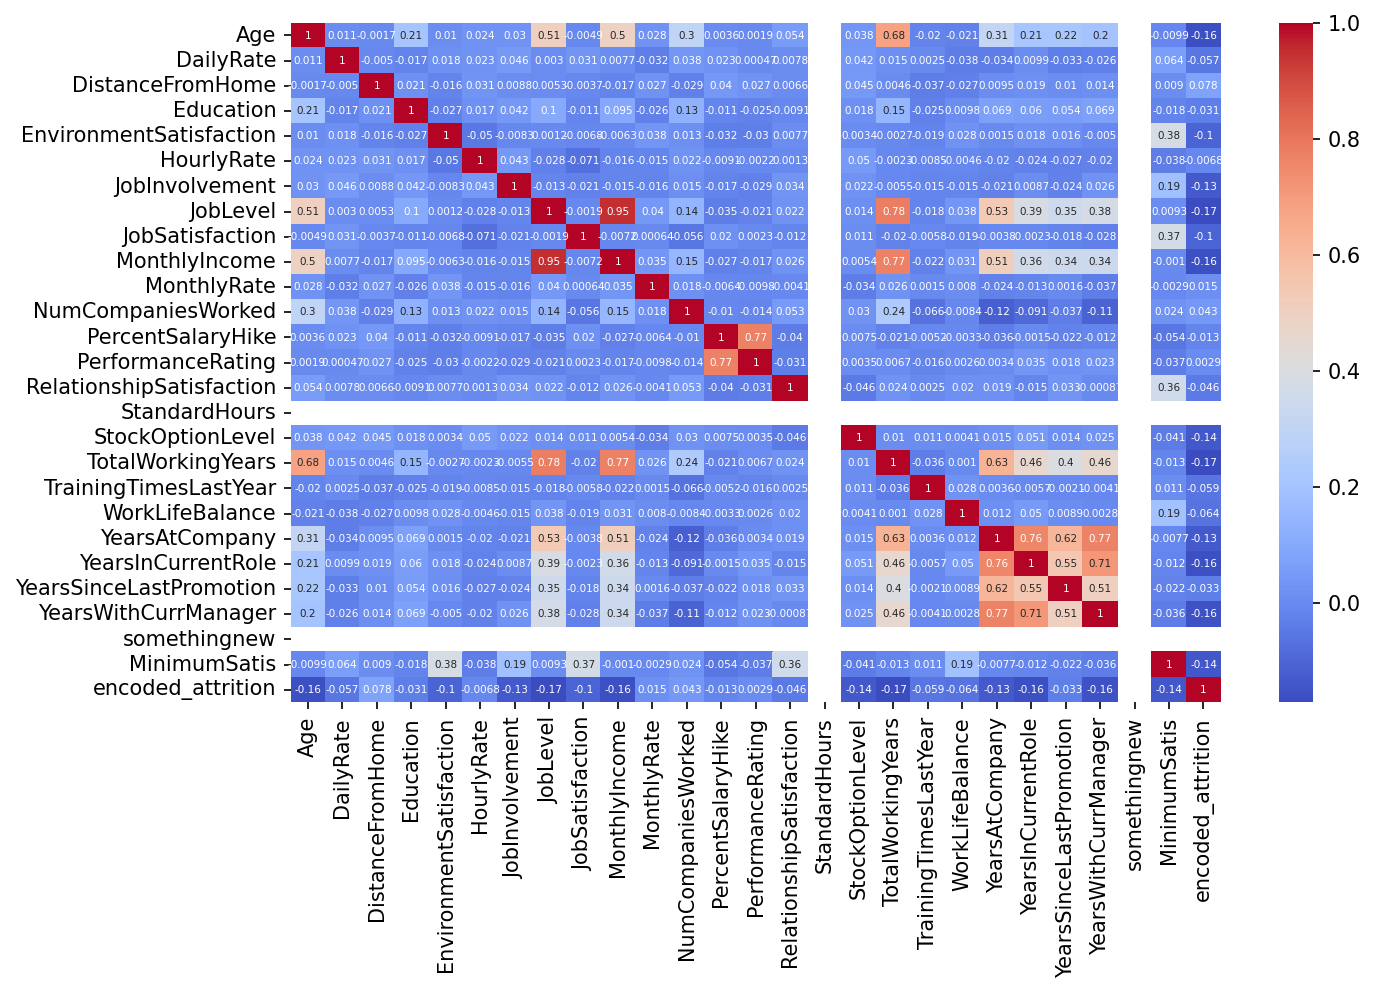

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

p = sns.heatmap(copy_data.select_dtypes(include = 'int64').corr(), cmap = 'coolwarm', 
                annot_kws={'fontsize':5}, ax = ax, annot = True)

# Preprocessing

## Encoding categorical columns

### Binary Categorical Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

In [ ]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
lb = LabelBinarizer()
lb.fit(data['Gender'].to_numpy().reshape(-1, 1) )

LabelBinarizer()

In [ ]:
lb.classes_

array(['Female', 'Male'], dtype='<U6')

In [ ]:
lb.transform(['Female'])

array([[0]])

In [ ]:
categorical_var

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'EngagementType',
       'TalentStatus'],
      dtype='object')

In [ ]:
copy_data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  YearsSinceLastPromotion  YearsWithCurrManager  somethingnew  \
0  Female  ...                        0                     5             0   
1    Male  ...                        1                     7             0   
2    Male  ...                        0                     0             0   
3  Female  ...                        3                     0             0   
4    Male  ...                        2                     2             0   

  OverallSatisfaction  MinimumSatis  EngagementType  %SalOver18  TalentStatus  \
0                 2.2             1      Disengaged       False             N   
1                 2.8             2         Neutral        True             Y   
2                 2.8             2         Neutral       False             N   
3                 3.2             3  Highly Engaged       False             N   
4                 2.6             1         Neutral       False             N   

       Hours encoded_attrition  
0  63.755319                 1  
1  84.098361                 0  
2  22.717391                 1  
3  51.946429                 0  
4  86.700000                 0  

[5 rows x 41 columns]

In [ ]:
binary_cols = ['Gender', 'OverTime']
binarized_cols = []
binary_dict = {}
for col in binary_cols:
    lb = LabelBinarizer()
    lb.fit_transform(data[col].to_numpy().reshape(-1, 1) )
    binary_dict[col] = lb.classes_
    col_name = "binarized_" + col
    binarized_cols.append(col_name)
    copy_data[col_name] = lb.transform(copy_data[col].to_numpy().reshape(-1,1))

In [ ]:
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [ ]:
binarized_cols

['binarized_Gender', 'binarized_OverTime']

In [ ]:
binary_dict

{'Gender': array(['Female', 'Male'], dtype='<U6'),
 'OverTime': array(['No', 'Yes'], dtype='<U3')}

In [ ]:
copy_data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  somethingnew  OverallSatisfaction  MinimumSatis  \
0  Female  ...             0                  2.2             1   
1    Male  ...             0                  2.8             2   
2    Male  ...             0                  2.8             2   
3  Female  ...             0                  3.2             3   
4    Male  ...             0                  2.6             1   

   EngagementType  %SalOver18 TalentStatus      Hours  encoded_attrition  \
0      Disengaged       False            N  63.755319                  1   
1         Neutral        True            Y  84.098361                  0   
2         Neutral       False            N  22.717391                  1   
3  Highly Engaged       False            N  51.946429                  0   
4         Neutral       False            N  86.700000                  0   

   binarized_Gender binarized_OverTime  
0                 0                  1  
1                 1                  0  
2                 1                  1  
3                 0                  1  
4                 1                  0  

[5 rows x 43 columns]

In [ ]:
copy_data[binarized_cols].head()

binarized_Gender  binarized_OverTime
0                 0                   1
1                 1                   0
2                 1                   1
3                 0                   1
4                 1                   0

### Multi-class Categorical Encoding (One-hot encoder)

In [ ]:
categorical_var

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'EngagementType',
       'TalentStatus'],
      dtype='object')

In [ ]:
ohe_col = ['BusinessTravel', 'Department', 'MaritalStatus']

In [ ]:
oh_encoded_col= []


for col in ohe_col:
    print(col)
    ohe = OneHotEncoder(dtype = int)
    ohe.fit(copy_data[col].to_numpy().reshape(-1, 1) )
    col_name = ohe.get_feature_names_out([col]).tolist()
    oh_encoded_col.extend(col_name) #must use extend instead of .append
    copy_data[col_name] = ohe.transform(copy_data[col].to_numpy().reshape(-1,1) ).toarray() #must put toarray() to make it work!

BusinessTravel
Department
MaritalStatus


In [ ]:
result = ohe.transform(copy_data[col].to_numpy().reshape(-1,1) ).toarray()

In [ ]:
result

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [ ]:
ohe.get_feature_names_out(['BusinessTravel']).tolist()

['BusinessTravel_Divorced', 'BusinessTravel_Married', 'BusinessTravel_Single']

In [ ]:
oh_encoded_col

['BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

In [ ]:
copy_data[oh_encoded_col].head(5)

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                          0                                 0   
1                          0                                 1   
2                          0                                 0   
3                          0                                 1   
4                          0                                 0   

   BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                             1                           0   
1                             0                           0   
2                             1                           0   
3                             0                           0   
4                             1                           0   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   
3                                  1                 0   
4                                  1                 0   

   MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  
0                       0                      0                     1  
1                       0                      1                     0  
2                       0                      0                     1  
3                       0                      1                     0  
4                       0                      1                     0

In [ ]:
print(binarized_cols)
print(oh_encoded_col)

['binarized_Gender', 'binarized_OverTime']
['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']


In [ ]:

copy_data[binarized_cols + oh_encoded_col].head()

binarized_Gender  binarized_OverTime  BusinessTravel_Non-Travel  \
0                 0                   1                          0   
1                 1                   0                          0   
2                 1                   1                          0   
3                 0                   1                          0   
4                 1                   0                          0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 0                             1   
3                                 1                             0   
4                                 0                             1   

   Department_Human Resources  Department_Research & Development  \
0                           0                                  0   
1                           0                                  1   
2                           0                                  1   
3                           0                                  1   
4                           0                                  1   

   Department_Sales  MaritalStatus_Divorced  MaritalStatus_Married  \
0                 1                       0                      0   
1                 0                       0                      1   
2                 0                       0                      0   
3                 0                       0                      1   
4                 0                       0                      1   

   MaritalStatus_Single  
0                     1  
1                     0  
2                     1  
3                     0  
4                     0

In [ ]:

copy_data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  binarized_OverTime  BusinessTravel_Non-Travel  \
0  Female  ...                   1                          0   
1    Male  ...                   0                          0   
2    Male  ...                   1                          0   
3  Female  ...                   1                          0   
4    Male  ...                   0                          0   

   BusinessTravel_Travel_Frequently BusinessTravel_Travel_Rarely  \
0                                 0                            1   
1                                 1                            0   
2                                 0                            1   
3                                 1                            0   
4                                 0                            1   

   Department_Human Resources Department_Research & Development  \
0                           0                                 0   
1                           0                                 1   
2                           0                                 1   
3                           0                                 1   
4                           0                                 1   

   Department_Sales  MaritalStatus_Divorced  MaritalStatus_Married  \
0                 1                       0                      0   
1                 0                       0                      1   
2                 0                       0                      0   
3                 0                       0                      1   
4                 0                       0                      1   

  MaritalStatus_Single  
0                    1  
1                    0  
2                    1  
3                    0  
4                    0  

[5 rows x 52 columns]

## Split the train, test dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
numerical_col_with_scale = ['Age', 'MonthlyRate', 'DistanceFromHome', 'PercentSalaryHike',
            'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
               'YearsWithCurrManager' ]

numerical_col_without_scale = ['EnvironmentSatisfaction','JobInvolvement', "JobSatisfaction", 'RelationshipSatisfaction',
               'WorkLifeBalance' ]

In [ ]:
X = copy_data[binarized_cols+ oh_encoded_col + numerical_col_with_scale +  numerical_col_without_scale]
y = copy_data['encoded_attrition']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (1470, 24)
y shape: (1470,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,
                                                    test_size=0.2, 
                                                    shuffle= True,
                                                    random_state=42,
                                                    stratify = y)





In [ ]:
print(f"X_train shape = {X_train.shape}")
print(f"y_train shape = {y_train.shape}")

print(f"X_test shape = {X_test.shape}")
print(f"y_test shape = {y_test.shape}")

X_train shape = (1176, 24)
y_train shape = (1176,)
X_test shape = (294, 24)
y_test shape = (294,)


In [ ]:
print(len(y_train[y_train == 0] ))
print(len(y_train[y_train == 1] ))

986
190


In [ ]:
print(len(y_test[y_test == 0] ))
print(len(y_test[y_test == 1] ))

247
47


In [ ]:
X_train.head()

binarized_Gender  binarized_OverTime  BusinessTravel_Non-Travel  \
1194                 0                   0                          0   
128                  1                   0                          0   
810                  1                   0                          0   
478                  1                   0                          0   
491                  1                   1                          0   

      BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
1194                                 0                             1   
128                                  0                             1   
810                                  0                             1   
478                                  0                             1   
491                                  1                             0   

      Department_Human Resources  Department_Research & Development  \
1194                           0                                  0   
128                            0                                  1   
810                            0                                  0   
478                            0                                  0   
491                            0                                  1   

      Department_Sales  MaritalStatus_Divorced  MaritalStatus_Married  ...  \
1194                 1                       1                      0  ...   
128                  0                       0                      1  ...   
810                  1                       0                      1  ...   
478                  1                       0                      1  ...   
491                  0                       1                      0  ...   

      PercentSalaryHike  TrainingTimesLastYear  YearsAtCompany  \
1194                 14                      2               3   
128                  14                      2               2   
810                  12                      3              12   
478                  11                      1               7   
491                  13                      3               8   

      YearsInCurrentRole  YearsWithCurrManager  EnvironmentSatisfaction  \
1194                   2                     2                        2   
128                    1                     1                        3   
810                    9                     9                        1   
478                    4                     6                        2   
491                    7                     7                        4   

      JobInvolvement  JobSatisfaction  RelationshipSatisfaction  \
1194               4                2                         3   
128                3                4                         3   
810                3                3                         4   
478                3                3                         3   
491                3                3                         2   

      WorkLifeBalance  
1194                3  
128                 3  
810                 3  
478                 3  
491                 3  

[5 rows x 24 columns]

##Scale the numerical columns data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numerical_col_with_scale

['Age',
 'MonthlyRate',
 'DistanceFromHome',
 'PercentSalaryHike',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [ ]:
X_train['Age'].head()

1194    47
128     22
810     46
478     25
491     43
Name: Age, dtype: int64

In [ ]:
for col in numerical_col_with_scale:
    scaler = StandardScaler().fit(X_train[col].to_numpy().reshape(-1,1))
    X_train[col] = scaler.transform(X_train[col].to_numpy().reshape(-1,1))
    X_test[col] = scaler.transform(X_test[col].to_numpy().reshape(-1,1))
    print(X_train[col].mean(), X_train[col].std())
    print(X_test[col].mean(), X_test[col].std())

-5.614839658977992e-17 1.000425441414695
-0.04059726086930336 0.9778994868557849
1.1045586214382935e-17 1.000425441414695
-0.05364311712867364 0.9475187079784299
-5.626640498950623e-17 1.0004254414146938
-0.10119228363993993 0.9523430529301801
-2.481008595846013e-16 1.0004254414146945
-0.04115835445956382 0.9751012408057311
3.776268791242029e-17 1.0004254414146991
0.1557489382010583 1.1189079552229309
4.248302390147283e-18 1.0004254414146974
-0.034522223464418994 1.0340874170662233
5.475589747300942e-18 1.0004254414146954
-0.002859900326266339 1.075261819123176
3.0021336890374133e-17 1.000425441414694
-0.10285373617873435 1.0025888831989058


In [ ]:
X_train[numerical_col_with_scale].head()

Age  MonthlyRate  DistanceFromHome  PercentSalaryHike  \
1194  1.090194     0.931289         -0.899915          -0.337129   
128  -1.634828     0.682742         -0.899915          -0.337129   
810   0.981193     0.167705         -0.777610          -0.880974   
478  -1.307825     1.667056          0.445433          -1.152896   
491   0.654191     0.728362         -0.043784          -0.609051   

      TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
1194              -0.605389       -0.665706           -0.625365   
128               -0.605389       -0.830071           -0.905635   
810                0.190962        0.813578            1.336527   
478               -1.401740       -0.008246           -0.064824   
491                0.190962        0.156119            0.775986   

      YearsWithCurrManager  
1194             -0.616406  
128              -0.897047  
810               1.348076  
478               0.506155  
491               0.786795

In [ ]:
X_test[numerical_col_with_scale].head()

Age  MonthlyRate  DistanceFromHome  PercentSalaryHike  \
1061 -1.416826    -1.013556          0.445433          -0.609051   
891   0.763191     0.777738         -0.899915          -0.609051   
456  -0.653820     1.516147         -0.288393           1.566330   
922   0.763191     0.429326         -0.655306          -0.337129   
69   -0.108815     1.027398         -0.043784           0.478639   

      TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
1061              -0.605389       -0.994436           -1.185905   
891                1.783664        0.484849            0.215446   
456                0.190962       -0.336976           -0.064824   
922                0.987313        2.950322            1.336527   
69                -2.198092       -0.994436           -1.185905   

      YearsWithCurrManager  
1061             -1.177687  
891               0.786795  
456              -0.897047  
922               2.470637  
69               -1.177687

# Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


## Logistic Regression

In [ ]:
logit_model = LogisticRegression(fit_intercept = True, class_weight= 'balanced')
logit_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
logit_yhat= logit_model.predict(X_test)

In [ ]:
print(classification_report(y_true= y_test, y_pred = logit_yhat))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       247
           1       0.38      0.74      0.50        47

    accuracy                           0.77       294
   macro avg       0.66      0.76      0.67       294
weighted avg       0.85      0.77      0.79       294



In [ ]:
logit_model.coef_

array([[ 0.38281709,  1.41695103, -0.90191967,  0.82581696,  0.08259606,
         0.12342662, -0.40199937,  0.28506611, -0.49028264, -0.13263501,
         0.629411  , -0.40052231,  0.02685434,  0.24651633, -0.13082345,
        -0.15831078,  0.07821425, -0.16098966, -0.38920104, -0.34193433,
        -0.47880891, -0.34617407, -0.14397855, -0.34150588]])

In [ ]:
pd.DataFrame(
    zip(X_train.columns, abs(logit_model.coef_[0])),
    columns=["feature", "weight"],
).sort_values("weight", ascending = False).reset_index(drop=True)

feature    weight
0                  binarized_OverTime  1.416951
1           BusinessTravel_Non-Travel  0.901920
2    BusinessTravel_Travel_Frequently  0.825817
3                MaritalStatus_Single  0.629411
4              MaritalStatus_Divorced  0.490283
5                      JobInvolvement  0.478809
6   Department_Research & Development  0.401999
7                                 Age  0.400522
8                YearsWithCurrManager  0.389201
9                    binarized_Gender  0.382817
10                    JobSatisfaction  0.346174
11            EnvironmentSatisfaction  0.341934
12                    WorkLifeBalance  0.341506
13                   Department_Sales  0.285066
14                   DistanceFromHome  0.246516
15                 YearsInCurrentRole  0.160990
16              TrainingTimesLastYear  0.158311
17           RelationshipSatisfaction  0.143979
18              MaritalStatus_Married  0.132635
19                  PercentSalaryHike  0.130823
20         Department_Human Resources  0.123427
21       BusinessTravel_Travel_Rarely  0.082596
22                     YearsAtCompany  0.078214
23                        MonthlyRate  0.026854

In [ ]:
logit_model.decision_function(X_train)

array([-1.79054436, -1.06637086, -1.68583233, ...,  1.80950977,
       -0.57908053, -1.09340345])

In [ ]:
logit_model.predict_proba(X_train)

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, logit_model.decision_function(X_train))
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, logit_model.decision_function(X_test))

In [ ]:
print(auc(train_fpr, train_tpr))
print(auc(test_fpr, test_tpr))

In [ ]:
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
def plot_result(model, model_pred):
    fig, axes = plt.subplots(1,2, figsize = (10,4), dpi = 100)

    print(classification_report(model_pred, y_test))


    cf_matrix = confusion_matrix(y_pred = model_pred, y_true = y_test )
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten() /np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)


    sns.heatmap(cf_matrix, ax = axes[0],
                cmap = 'coolwarm', annot =labels, fmt = '')
    
    axes[0].set_title('Confunsion Matrix')
    axes[0].set_xlabel("Predicted class")
    axes[0].set_label("Actual class")

    
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, model.decision_function(X_train))
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, model.decision_function(X_test))


    axes[1].plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
    axes[1].plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
    axes[1].plot([0,1],[0,1],'g--')
    axes[1].set_title('Area Under the Curve')
    axes[1].set_xlabel("False Positive Rate")
    axes[1].set_ylabel("True Positive Rate")
    plt.legend()
    plt.show()

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       202
           1       0.74      0.38      0.50        92

    accuracy                           0.77       294
   macro avg       0.76      0.66      0.67       294
weighted avg       0.76      0.77      0.74       294



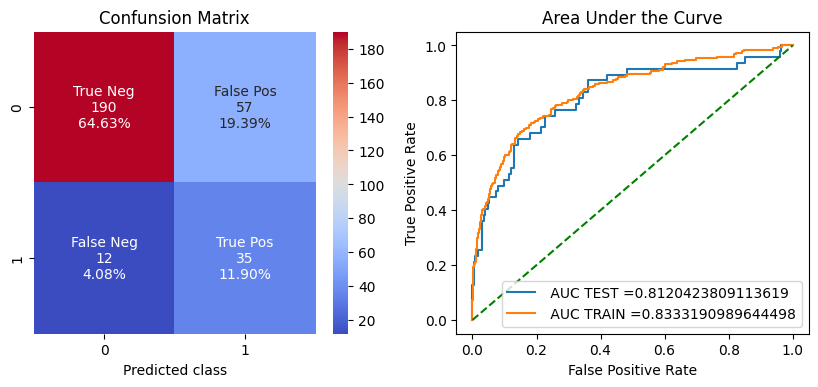

In [ ]:
plot_result(logit_model, logit_yhat)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [ ]:
logit_cv_score = cross_val_score(logit_model, X_train, y_train, cv = 5)

In [ ]:
[f'cv_{i}' for i in range(1, 6)]

['cv_1', 'cv_2', 'cv_3', 'cv_4', 'cv_5']

In [ ]:
def cross_validate_report(model, fold):
    k_fold = [f'cv_{fold}' for fold in range(1, fold +1)]
    result = cross_validate(model, X_train, y_train, cv = fold, return_train_score = True, 
                scoring = ['accuracy', 'recall', 'roc_auc'])
    
    needed_col = ['train_accuracy']

    report = pd.DataFrame(zip(k_fold, result['train_accuracy'],result['test_accuracy'],
                     result['train_roc_auc'], result['test_roc_auc']
                     ),
                    columns = ['f-fold', 'train_accuracy', 'test_accuracy',
                               'train_auc', 'test_auc']
    )
    
    avg_report = pd.DataFrame( np.round(report.iloc[:, 1:].mean(axis =0).to_numpy().reshape(1,4), 6),
                    columns = [ 'avg_train_accuracy', 'avg_test_accuracy',
                               'avg_train_auc', 'avg_test_auc']
    )

    print(report)
    print()
    print(avg_report)

    return result, report, avg_report

In [ ]:
logit_result, logit_report, logit_avg_report = cross_validate_report(logit_model, 5)

  f-fold  train_accuracy  test_accuracy  train_auc  test_auc
0   cv_1        0.768085       0.682203   0.862042  0.685008
1   cv_2        0.750266       0.680851   0.823469  0.861208
2   cv_3        0.748140       0.791489   0.830582  0.829415
3   cv_4        0.756642       0.723404   0.839128  0.795752
4   cv_5        0.747078       0.778723   0.826938  0.844109

   avg_train_accuracy  avg_test_accuracy  avg_train_auc  avg_test_auc
0            0.754042           0.731334       0.836432      0.803098


In [ ]:
logit_report

f-fold  train_accuracy  test_accuracy  train_auc  test_auc
0   cv_1        0.768085       0.682203   0.862042  0.685008
1   cv_2        0.750266       0.680851   0.823469  0.861208
2   cv_3        0.748140       0.791489   0.830582  0.829415
3   cv_4        0.756642       0.723404   0.839128  0.795752
4   cv_5        0.747078       0.778723   0.826938  0.844109

In [ ]:
logit_avg_report

avg_train_accuracy  avg_test_accuracy  avg_train_auc  avg_test_auc
0            0.754042           0.731334       0.836432      0.803098

## SVM

In [ ]:
svm_clf = SVC(C = 10, kernel ='rbf', degree = 3)
svm_clf.fit(X_train, y_train)

SVC(C=10)

In [ ]:
svm_yhat = svm_clf.predict(X_test)

In [ ]:
print(classification_report(y_true= y_test, y_pred = svm_yhat))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.59      0.34      0.43        47

    accuracy                           0.86       294
   macro avg       0.74      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



              precision    recall  f1-score   support

           0       0.96      0.88      0.92       267
           1       0.34      0.59      0.43        27

    accuracy                           0.86       294
   macro avg       0.65      0.74      0.68       294
weighted avg       0.90      0.86      0.87       294



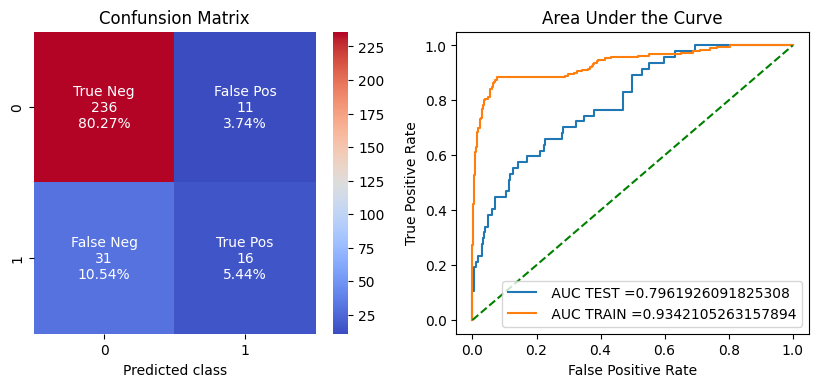

In [ ]:
plot_result(svm_clf, svm_yhat)

In [ ]:
svm_result, svm_report, svm_avg_report = cross_validate_report(svm_clf, 5)

  f-fold  train_accuracy  test_accuracy  train_auc  test_auc
0   cv_1        0.939362       0.830508   0.945682  0.703482
1   cv_2        0.921360       0.876596   0.935295  0.843441
2   cv_3        0.929862       0.855319   0.950329  0.777318
3   cv_4        0.928799       0.829787   0.939989  0.775715
4   cv_5        0.921360       0.872340   0.932710  0.838098

   avg_train_accuracy  avg_test_accuracy  avg_train_auc  avg_test_auc
0            0.928149            0.85291       0.940801      0.787611


In [ ]:
svm_report

f-fold  train_accuracy  test_accuracy  train_auc  test_auc
0   cv_1        0.939362       0.830508   0.945682  0.703482
1   cv_2        0.921360       0.876596   0.935295  0.843441
2   cv_3        0.929862       0.855319   0.950329  0.777318
3   cv_4        0.928799       0.829787   0.939989  0.775715
4   cv_5        0.921360       0.872340   0.932710  0.838098

In [ ]:
svm_avg_report

avg_train_accuracy  avg_test_accuracy  avg_train_auc  avg_test_auc
0            0.928149            0.85291       0.940801      0.787611

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = { 'C':[0.1,1,100],'kernel':['rbf','poly','sigmoid'],'degree':[1,2,3],'gamma': [1, 0.1, 0.01]}
grid = GridSearchCV(SVC(),param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100], 'degree': [1, 2, 3],
                         'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [ ]:
grid.best_params_

{'C': 100, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}

In [ ]:
pd.DataFrame(grid.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.073107      0.024792         0.021942        0.005353     0.1   
1        0.029516      0.001483         0.006856        0.000186     0.1   
2        0.024172      0.007557         0.007715        0.000942     0.1   
3        0.051689      0.002125         0.016144        0.000373     0.1   
4        0.025674      0.001308         0.006940        0.000421     0.1   
5        0.040644      0.004031         0.010199        0.000242     0.1   
6        0.039877      0.002046         0.011947        0.000616     0.1   
7        0.022836      0.000064         0.006892        0.000138     0.1   
8        0.039627      0.001111         0.010460        0.001453     0.1   
9        0.098803      0.001887         0.027843        0.000853     0.1   
10       0.264824      0.036151         0.006749        0.000157     0.1   
11       0.020706      0.000533         0.010598        0.006680     0.1   
12       0.053050      0.001974         0.015823        0.000302     0.1   
13       0.029044      0.000770         0.007051        0.000086     0.1   
14       0.036600      0.002401         0.011418        0.001181     0.1   
15       0.037380      0.000845         0.011904        0.000177     0.1   
16       0.026381      0.002945         0.007347        0.000209     0.1   
17       0.038577      0.001688         0.009923        0.000272     0.1   
18       0.102387      0.002666         0.028342        0.002064     0.1   
19       0.157159      0.011929         0.004291        0.000071     0.1   
20       0.011490      0.000135         0.004263        0.000064     0.1   
21       0.027473      0.000683         0.010954        0.001712     0.1   
22       0.027808      0.002279         0.004265        0.000107     0.1   
23       0.021175      0.000567         0.006373        0.000080     0.1   
24       0.019459      0.000488         0.007346        0.000119     0.1   
25       0.013229      0.000392         0.004091        0.000115     0.1   
26       0.023058      0.000866         0.006009        0.000217     0.1   
27       0.054717      0.000625         0.018243        0.001403       1   
28       0.029013      0.002236         0.003833        0.000108       1   
29       0.011247      0.000184         0.004185        0.000076       1   
30       0.029823      0.001729         0.010333        0.000419       1   
31       0.017719      0.001720         0.004102        0.000106       1   
32       0.021398      0.000658         0.006462        0.000075       1   
33       0.021294      0.000827         0.007916        0.000422       1   
34       0.016391      0.002216         0.004229        0.000326       1   
35       0.022206      0.001037         0.005780        0.000071       1   
36       0.054834      0.000634         0.018822        0.001976       1   
37       2.085461      0.862639         0.003851        0.000155       1   
38       0.012030      0.001387         0.004549        0.000666       1   
39       0.029928      0.001985         0.010053        0.000228       1   
40       0.030615      0.002656         0.003972        0.000084       1   
41       0.021395      0.000437         0.006349        0.000048       1   
42       0.021489      0.000822         0.007833        0.000665       1   
43       0.014908      0.001018         0.004135        0.000039       1   
44       0.022236      0.000994         0.005767        0.000072       1   
45       0.059007      0.006720         0.017577        0.000255       1   
46       0.146844      0.015116         0.004296        0.000064       1   
47       0.011387      0.000983         0.004415        0.000935       1   
48       0.029388      0.001605         0.010111        0.000196       1   
49       0.080628      0.007240         0.004228        0.000092       1   
50       0.021137      0.000414         0.006370        0.000100       1   
51       0.023129      0.003215         0.007814    

### SVM2

In [ ]:
svm_clf2 = SVC(C= 100, degree= 1, gamma = 1, kernel= 'linear', probability = True)
svm_clf2.fit(X_train, y_train)

SVC(C=100, degree=1, gamma=1, kernel='linear', probability=True)

In [ ]:
svm_yhat2 = svm_clf2.predict(X_test)

In [ ]:
X_test.shape

(294, 24)

In [ ]:
np.array(X_test.iloc[0, :]).reshape(1,-1).shape

(1, 24)

In [ ]:
np.array(X_test.iloc[0, :]).reshape(1,-1)

array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        , -1.41682587, -1.01355595,  0.44543325, -0.60905116,
        -0.60538935, -0.99443571, -1.18590534, -1.17768721,  4.        ,
         3.        ,  2.        ,  3.        ,  3.        ]])

In [ ]:
X_train.columns

Index(['binarized_Gender', 'binarized_OverTime', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Age', 'MonthlyRate', 'DistanceFromHome',
       'PercentSalaryHike', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction',
       'WorkLifeBalance'],
      dtype='object')

In [ ]:
np.max(svm_clf2.predict_proba(np.array(X_test.iloc[0, :]).reshape(1,-1)))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


0.8930142373315527

In [ ]:
print(classification_report(y_true= y_test, y_pred = svm_yhat2))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.71      0.21      0.33        47

    accuracy                           0.86       294
   macro avg       0.79      0.60      0.63       294
weighted avg       0.84      0.86      0.83       294



In [ ]:
svm_result2, svm_report2, svm_avg_report2 = cross_validate_report(svm_clf2, 5)

KeyboardInterrupt: ignored

In [ ]:
svm_report2

f-fold  train_accuracy  test_accuracy  train_auc  test_auc
0   cv_1        0.879787       0.855932   0.858210  0.683679
1   cv_2        0.838470       0.838298   0.814255  0.878974
2   cv_3        0.872476       0.872340   0.821843  0.831285
3   cv_4        0.878852       0.855319   0.832950  0.783329
4   cv_5        0.862912       0.868085   0.819125  0.860940

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       280
           1       0.21      0.71      0.33        14

    accuracy                           0.86       294
   macro avg       0.60      0.79      0.63       294
weighted avg       0.95      0.86      0.89       294



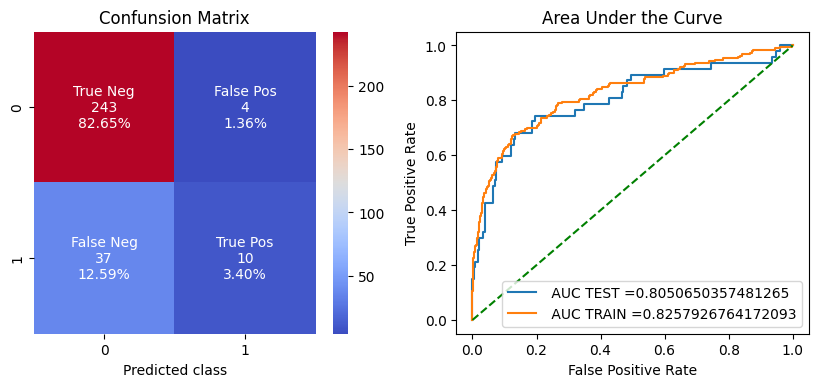

In [ ]:
plot_result(svm_clf2, svm_yhat2)

In [ ]:
pd.DataFrame(
    zip(X_train.columns, abs(svm_clf2.coef_[0])),
    columns=["feature", "weight"],
).sort_values("weight", ascending= False).reset_index(drop=True)

feature    weight
0                  binarized_OverTime  0.907541
1    BusinessTravel_Travel_Frequently  0.512076
2           BusinessTravel_Non-Travel  0.399739
3                MaritalStatus_Single  0.384927
4                                 Age  0.315905
5                      JobInvolvement  0.281919
6                YearsWithCurrManager  0.256953
7   Department_Research & Development  0.213134
8             EnvironmentSatisfaction  0.207661
9               MaritalStatus_Married  0.197113
10                    JobSatisfaction  0.194364
11             MaritalStatus_Divorced  0.187814
12                 YearsInCurrentRole  0.183350
13                   DistanceFromHome  0.167835
14                    WorkLifeBalance  0.146883
15           RelationshipSatisfaction  0.134093
16       BusinessTravel_Travel_Rarely  0.112337
17                   Department_Sales  0.108642
18         Department_Human Resources  0.104491
19                     YearsAtCompany  0.100583
20              TrainingTimesLastYear  0.098866
21                   binarized_Gender  0.098312
22                        MonthlyRate  0.019683
23                  PercentSalaryHike  0.012575

### SAVE MODEL

In [ ]:
import joblib

In [ ]:
# Save RL_Model to file in the current working directory

svm2_model_file = "svm2.pkl"  
joblib.dump(svm_clf2, svm2_model_file)

['svm2.pkl']

In [ ]:
download_svm = joblib.load('/content/svm2.pkl')

In [ ]:
download_svm.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
X_train.to_csv('X_train.csv')

# New Section

In [ ]:
X_train.shape

(1176, 24)

In [ ]:
X_train.columns

Index(['binarized_Gender', 'binarized_OverTime', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Age', 'MonthlyRate', 'DistanceFromHome',
       'PercentSalaryHike', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction',
       'WorkLifeBalance'],
      dtype='object')

In [ ]:
X_train.head()

binarized_Gender  binarized_OverTime  BusinessTravel_Non-Travel  \
1194                 0                   0                          0   
128                  1                   0                          0   
810                  1                   0                          0   
478                  1                   0                          0   
491                  1                   1                          0   

      BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
1194                                 0                             1   
128                                  0                             1   
810                                  0                             1   
478                                  0                             1   
491                                  1                             0   

      Department_Human Resources  Department_Research & Development  \
1194                           0                                  0   
128                            0                                  1   
810                            0                                  0   
478                            0                                  0   
491                            0                                  1   

      Department_Sales  MaritalStatus_Divorced  MaritalStatus_Married  ...  \
1194                 1                       1                      0  ...   
128                  0                       0                      1  ...   
810                  1                       0                      1  ...   
478                  1                       0                      1  ...   
491                  0                       1                      0  ...   

      PercentSalaryHike  TrainingTimesLastYear  YearsAtCompany  \
1194          -0.337129              -0.605389       -0.665706   
128           -0.337129              -0.605389       -0.830071   
810           -0.880974               0.190962        0.813578   
478           -1.152896              -1.401740       -0.008246   
491           -0.609051               0.190962        0.156119   

      YearsInCurrentRole  YearsWithCurrManager  EnvironmentSatisfaction  \
1194           -0.625365             -0.616406                        2   
128            -0.905635             -0.897047                        3   
810             1.336527              1.348076                        1   
478            -0.064824              0.506155                        2   
491             0.775986              0.786795                        4   

      JobInvolvement  JobSatisfaction  RelationshipSatisfaction  \
1194               4                2                         3   
128                3                4                         3   
810                3                3                         4   
478                3                3                         3   
491                3                3                         2   

      WorkLifeBalance  
1194                3  
128                 3  
810                 3  
478                 3  
491                 3  

[5 rows x 24 columns]

In [ ]:
np.zeros((1,24))

(1, 24)

In [ ]:
empty_list = np.zeros((1,24))

In [ ]:
#female - 0, male =1
#ot no - 0, y =1
def input_gender(gender):
    if gender == "Male":
        empty_list[:, 0] = 1
    else:
        empty_list[:, 0] = 0

In [ ]:
empty_list

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
input_gender('Female')
print(empty_list)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### RFE

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe = RFE(estimator= svm_clf2, n_features_to_select=5)
rfe.fit(X_train, y_train)

RFE(estimator=SVC(C=100, degree=1, gamma=1, kernel='linear'),
    n_features_to_select=5)

In [ ]:
five_col_matter = X_train.columns[rfe.support_]

In [ ]:
rfe.support_

array([False,  True, False,  True, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False])

In [ ]:
new_X_train = X_train[five_col_matter]
new_X_test = X_test[five_col_matter]

In [ ]:
svm_clf3 = SVC(C= 100, degree= 1, gamma = 1, kernel= 'linear')
svm_clf3.fit(new_X_train, y_train)

SVC(C=100, degree=1, gamma=1, kernel='linear')

In [ ]:
svm_yhat3 = svm_clf3.predict(new_X_test)

In [ ]:
print(classification_report(y_true= y_test, y_pred = svm_yhat3))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm_result3, svm_report3, svm_avg_report3 = cross_validate_report(svm_clf3, 5)

  f-fold  train_accuracy  test_accuracy  train_auc  test_auc
0   cv_1        0.879787       0.855932   0.858210  0.683679
1   cv_2        0.838470       0.838298   0.814255  0.878974
2   cv_3        0.872476       0.872340   0.821843  0.831285
3   cv_4        0.878852       0.855319   0.832950  0.783329
4   cv_5        0.862912       0.868085   0.819125  0.860940

   avg_train_accuracy  avg_test_accuracy  avg_train_auc  avg_test_auc
0            0.866499           0.857995       0.829277      0.807641


In [ ]:
svm_clf3.support_vectors_.shape

(395, 5)

### Feature Importance for SVM2

In [ ]:
pip install eli5

     |████████████████████████████████| 106 kB 5.1 MB/s 


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
eli5.explain_weights(svm_clf2 , feature_names =X_test.columns.tolist(), top = (6,5))

Explanation(estimator="SVC(C=100, degree=1, gamma=1, kernel='linear')", description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.9195148411034567, std=None, value=None), FeatureWeight(feature='binarized_OverTime', weight=0.9075407202512906, std=None, value=None), FeatureWeight(feature='BusinessTravel_Travel_Frequently', weight=0.5120762397968974, std=None, value=None), FeatureWeight(feature='MaritalStatus_Single', weight=0.384926725301284, std=None, value=None), FeatureWeight(feature='DistanceFromHome', weight=0.1678346291298638, std=None, value=None), FeatureWeight(feature='Department_Sales', weight=0.10864229331218667, std=None, value=None)], neg=[FeatureWeight(feature='BusinessTravel_Non-Travel', weight=-0.39973940003460484, std=None, value=None), FeatureWeight(feature='Age', weight=-0.31590462757012006, std=None, value=None), FeatureWeight(feature='JobInvolvement', weight=-0.28191917826370627, std=None, value=None), FeatureWeight(feature='YearsWithCurrManager', weight=-0.2569529051111843, std=None, value=None), FeatureWeight(feature='Department_Research & Development', weight=-0.21313373523616974, std=None, value=None)], pos_remaining=5, neg_remaining=9), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [ ]:
eli5.show_weights(svm_clf2, feature_names =X_test.columns.tolist())

In [ ]:
perm = PermutationImportance(svm_clf2, random_state = 0,
                             n_iter = 20, scoring = 'roc_auc'
                             , cv = "prefit").fit(X_train, y_train)
eli5.show_weights(perm, feature_names =X_test.columns.tolist() )

### Model Prediction

In [ ]:
svm_yhat2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
X_train.index

Int64Index([1194,  128,  810,  478,  491,  323,  258,  812, 1132,  996,
            ...
            1087,  411, 1001, 1380,  365, 1213,  963,  734, 1315, 1292],
           dtype='int64', length=1176)

In [ ]:
traisvm_clf2.predict(X_train) 

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
new_df = pd.concat((X_train, X_test))
new_df.head()

binarized_Gender  binarized_OverTime  BusinessTravel_Non-Travel  \
1194                 0                   0                          0   
128                  1                   0                          0   
810                  1                   0                          0   
478                  1                   0                          0   
491                  1                   1                          0   

      BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
1194                                 0                             1   
128                                  0                             1   
810                                  0                             1   
478                                  0                             1   
491                                  1                             0   

      Department_Human Resources  Department_Research & Development  \
1194                           0                                  0   
128                            0                                  1   
810                            0                                  0   
478                            0                                  0   
491                            0                                  1   

      Department_Sales  MaritalStatus_Divorced  MaritalStatus_Married  ...  \
1194                 1                       1                      0  ...   
128                  0                       0                      1  ...   
810                  1                       0                      1  ...   
478                  1                       0                      1  ...   
491                  0                       1                      0  ...   

      PercentSalaryHike  TrainingTimesLastYear  YearsAtCompany  \
1194          -0.337129              -0.605389       -0.665706   
128           -0.337129              -0.605389       -0.830071   
810           -0.880974               0.190962        0.813578   
478           -1.152896              -1.401740       -0.008246   
491           -0.609051               0.190962        0.156119   

      YearsInCurrentRole  YearsWithCurrManager  EnvironmentSatisfaction  \
1194           -0.625365             -0.616406                        2   
128            -0.905635             -0.897047                        3   
810             1.336527              1.348076                        1   
478            -0.064824              0.506155                        2   
491             0.775986              0.786795                        4   

      JobInvolvement  JobSatisfaction  RelationshipSatisfaction  \
1194               4                2                         3   
128                3                4                         3   
810                3                3                         4   
478                3                3                         3   
491                3                3                         2   

      WorkLifeBalance  
1194                3  
128                 3  
810                 3  
478                 3  
491                 3  

[5 rows x 24 columns]

In [ ]:
new_df['Attrition_prediction'] = svm_clf2.predict(new_df)
new_df.head()

binarized_Gender  binarized_OverTime  BusinessTravel_Non-Travel  \
1194                 0                   0                          0   
128                  1                   0                          0   
810                  1                   0                          0   
478                  1                   0                          0   
491                  1                   1                          0   

      BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
1194                                 0                             1   
128                                  0                             1   
810                                  0                             1   
478                                  0                             1   
491                                  1                             0   

      Department_Human Resources  Department_Research & Development  \
1194                           0                                  0   
128                            0                                  1   
810                            0                                  0   
478                            0                                  0   
491                            0                                  1   

      Department_Sales  MaritalStatus_Divorced  MaritalStatus_Married  ...  \
1194                 1                       1                      0  ...   
128                  0                       0                      1  ...   
810                  1                       0                      1  ...   
478                  1                       0                      1  ...   
491                  0                       1                      0  ...   

      TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
1194              -0.605389       -0.665706           -0.625365   
128               -0.605389       -0.830071           -0.905635   
810                0.190962        0.813578            1.336527   
478               -1.401740       -0.008246           -0.064824   
491                0.190962        0.156119            0.775986   

      YearsWithCurrManager  EnvironmentSatisfaction  JobInvolvement  \
1194             -0.616406                        2               4   
128              -0.897047                        3               3   
810               1.348076                        1               3   
478               0.506155                        2               3   
491               0.786795                        4               3   

      JobSatisfaction  RelationshipSatisfaction  WorkLifeBalance  \
1194                2                         3                3   
128                 4                         3                3   
810                 3                         4                3   
478                 3                         3                3   
491                 3                         2                3   

      Attrition_prediction  
1194                     0  
128                      0  
810                      0  
478                      0  
491                      0  

[5 rows x 25 columns]

In [ ]:
new_df['logit_Attrition_prediction']= logit_model.predict(new_df.iloc[:, :-1])

In [ ]:
np.sum(newlogitresult)

486

In [ ]:
np.where(newlogitresult == 1)

(array([   3,    5,    7,    9,   10,   13,   15,   19,   24,   25,   30,
          32,   33,   36,   40,   44,   45,   53,   61,   62,   63,   64,
          66,   69,   71,   74,   75,   78,   83,   89,   90,   96,   99,
         100,  102,  103,  104,  115,  120,  121,  122,  128,  129,  131,
         136,  138,  141,  143,  152,  153,  163,  168,  169,  170,  171,
         173,  179,  182,  184,  187,  188,  192,  193,  194,  198,  200,
         201,  205,  207,  209,  210,  216,  218,  228,  229,  238,  242,
         248,  249,  251,  252,  253,  258,  269,  270,  272,  274,  275,
         276,  279,  285,  287,  288,  290,  291,  292,  294,  295,  297,
         299,  300,  304,  306,  307,  308,  311,  312,  314,  316,  317,
         318,  321,  328,  330,  336,  339,  342,  344,  345,  347,  349,
         351,  352,  358,  359,  360,  361,  362,  365,  366,  367,  369,
         373,  375,  380,  381,  383,  385,  388,  389,  391,  392,  393,
         394,  395,  397,  398,  399, 

In [ ]:
np.where(new_df['Attrition_prediction']  == 1)

(array([  36,   71,  100,  122,  163,  171,  188,  198,  201,  209,  218,
         269,  274,  279,  287,  304,  330,  345,  362,  381,  391,  392,
         393,  450,  487,  501,  503,  512,  568,  606,  608,  629,  639,
         642,  676,  691,  718,  816,  844,  880,  903,  938,  951,  983,
         996, 1014, 1040, 1051, 1052, 1055, 1076, 1079, 1088, 1101, 1129,
        1130, 1136, 1201, 1211, 1215, 1223, 1233, 1257, 1268, 1272, 1280,
        1376, 1390, 1432, 1463, 1467]),)

In [ ]:
new_df.iloc[160:200, -1]

544     0
1192    0
1374    0
414     1
1072    0
508     0
125     0
595     0
936     0
307     0
383     0
798     1
423     0
642     0
848     0
941     0
521     0
1408    0
1277    0
554     0
436     0
1103    0
1261    0
606     0
576     0
501     0
1198    0
800     0
1438    1
707     0
87      0
1130    0
214     0
605     0
405     0
719     0
1331    0
647     0
453     1
531     0
Name: Attrition_prediction, dtype: int64

In [ ]:
complete_df = data.join(new_df, how = 'left', lsuffix ='_left', rsuffix = '_right')
complete_df.head()

Age_left Attrition     BusinessTravel  DailyRate              Department  \
0        41       Yes      Travel_Rarely       1102                   Sales   
1        49        No  Travel_Frequently        279  Research & Development   
2        37       Yes      Travel_Rarely       1373  Research & Development   
3        33        No  Travel_Frequently       1392  Research & Development   
4        27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome_left  Education EducationField  EmployeeCount  \
0                      1          2  Life Sciences              1   
1                      8          1  Life Sciences              1   
2                      2          2          Other              1   
3                      3          4  Life Sciences              1   
4                      2          1        Medical              1   

   EmployeeNumber  ...  YearsAtCompany_right YearsInCurrentRole_right  \
0               1  ...             -0.172611                -0.064824   
1               2  ...              0.484849                 0.775986   
2               4  ...             -1.158801                -1.185905   
3               5  ...              0.156119                 0.775986   
4               7  ...             -0.830071                -0.625365   

   YearsWithCurrManager_right  EnvironmentSatisfaction_right  \
0                    0.225515                              2   
1                    0.786795                              3   
2                   -1.177687                              4   
3                   -1.177687                              4   
4                   -0.616406                              1   

   JobInvolvement_right JobSatisfaction_right  RelationshipSatisfaction_right  \
0                     3                     4                               1   
1                     2                     2                               4   
2                     2                     3                               2   
3                     3                     3                               3   
4                     3                     2                               4   

  WorkLifeBalance_right  Attrition_prediction  logit_Attrition_prediction  
0                     1                     0                           1  
1                     3                     0                           0  
2                     3                     0                           1  
3                     3                     0                           1  
4                     3                     0                           0  

[5 rows x 68 columns]

In [ ]:
complete_df[complete_df['Attrition_prediction'] == 1]

Age_left Attrition     BusinessTravel  DailyRate  \
14          28       Yes      Travel_Rarely        103   
26          32       Yes  Travel_Frequently       1125   
42          26       Yes      Travel_Rarely       1357   
54          26        No      Travel_Rarely       1443   
102         20       Yes  Travel_Frequently        871   
107         25       Yes      Travel_Rarely        240   
111         34       Yes  Travel_Frequently        658   
127         19       Yes      Travel_Rarely        528   
132         31       Yes      Travel_Rarely        542   
171         19       Yes  Travel_Frequently        602   
192         35       Yes      Travel_Rarely        556   
204         38       Yes      Travel_Rarely       1180   
216         30       Yes  Travel_Frequently        334   
284         26        No  Travel_Frequently        496   
357         21       Yes  Travel_Frequently        756   
397         25        No      Travel_Rarely        891   
414         24       Yes      Travel_Rarely       1448   
440         34       Yes  Travel_Frequently        988   
453         26       Yes  Travel_Frequently        426   
457         18       Yes  Travel_Frequently       1306   
463         26       Yes      Travel_Rarely        471   
480         30       Yes  Travel_Frequently        448   
514         33       Yes  Travel_Frequently       1076   
656         32       Yes      Travel_Rarely        374   
673         33        No      Travel_Rarely       1198   
683         25       Yes      Travel_Rarely        867   
688         19       Yes      Travel_Rarely        419   
689         20       Yes      Travel_Rarely        129   
709         31       Yes         Non-Travel        335   
731         20       Yes      Travel_Rarely       1097   
762         26       Yes  Travel_Frequently        342   
776         20       Yes  Travel_Frequently        769   
798         33       Yes      Travel_Rarely       1017   
829         33       Yes      Travel_Rarely        603   
887         42        No  Travel_Frequently        458   
892         19       Yes         Non-Travel        504   
911         25       Yes  Travel_Frequently        599   
915         21       Yes  Travel_Frequently        251   
921         28        No  Travel_Frequently        791   
946         40       Yes      Travel_Rarely        299   
952         31       Yes  Travel_Frequently       1060   
974         27        No  Travel_Frequently        793   
981         35       Yes  Travel_Frequently        662   
1006        49       Yes  Travel_Frequently       1475   
1012        31       Yes  Travel_Frequently        667   
1032        39       Yes         Non-Travel        592   
1057        29       Yes  Travel_Frequently        115   
1060        24       Yes  Travel_Frequently        381   
1062        44        No  Travel_Frequently       1193   
1068        28       Yes  Travel_Frequently        289   
1153        18       Yes  Travel_Frequently        544   
1167        35       Yes      Travel_Rarely        763   
1168        24        No  Travel_Frequently        567   
1171        40       Yes      Travel_Rarely       1329   
1188        29        No      Travel_Rarely        991   
1201        23       Yes      Travel_Rarely       1320   
1215        35        No  Travel_Frequently        146   
1236        36       Yes      Travel_Rarely       1456   
1237        32       Yes      Travel_Rarely        964   
1255        33       Yes      Travel_Rarely        211   
1313        29       Yes      Travel_Rarely        350   
1326        32       Yes      Travel_Rarely        414   
1332        29       Yes  Travel_Frequently        459   
1339        22       Yes      Travel_Rarely        391   
1365        29       Yes  Travel_Frequently        746   
1375        32       Yes  Travel_Frequently        238   
1379        27       Yes  Travel_Frequently       1337   
1391        38        No      Travel_Rarely       1404   
1396

# COMPLETE THE WHOLE PREDICTION FILE

In [ ]:
from google.colab import files
complete_df.to_csv('complete_df.csv') 
files.download('complete_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
complete_df[['Attrition', 'Attrition_prediction']].iloc[:20]

Attrition  Attrition_prediction
0        Yes                     0
1         No                     0
2        Yes                     0
3         No                     0
4         No                     0
5         No                     0
6         No                     0
7         No                     0
8         No                     0
9         No                     0
10        No                     0
11        No                     0
12        No                     0
13        No                     0
14       Yes                     1
15        No                     0
16        No                     0
17        No                     0
18        No                     0
19        No                     0

In [ ]:
still_working = (complete_df['Attrition'] == 'No')
predicted_to_quit = (complete_df['Attrition_prediction'] == 1)
leaving_pop = complete_df[still_working & predicted_to_quit]

In [ ]:
data[still_working]

Age Attrition     BusinessTravel  DailyRate              Department  \
1      49        No  Travel_Frequently        279  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
10     35        No      Travel_Rarely        809  Research & Development   
11     29        No      Travel_Rarely        153  Research & Development   
12     31        No      Travel_Rarely        670  Research & Development   
13     34        No      Travel_Rarely       1346  Research & Development   
15     29        No      Travel_Rarely       1389  Research & Development   
16     32        No      Travel_Rarely        334  Research & Development   
17     22        No         Non-Travel       1123  Research & Development   
18     53        No      Travel_Rarely       1219                   Sales   
19     38        No      Travel_Rarely        371  Research & Development   
20     24        No         Non-Travel        673  Research & Development   
22     34        No      Travel_Rarely        419  Research & Development   
23     21        No      Travel_Rarely        391  Research & Development   
25     53        No      Travel_Rarely       1282  Research & Development   
27     42        No      Travel_Rarely        691                   Sales   
28     44        No      Travel_Rarely        477  Research & Development   
29     46        No      Travel_Rarely        705                   Sales   
30     33        No      Travel_Rarely        924  Research & Development   
31     44        No      Travel_Rarely       1459  Research & Development   
32     30        No      Travel_Rarely        125  Research & Development   
35     43        No      Travel_Rarely       1273  Research & Development   
37     35        No      Travel_Rarely        890                   Sales   
38     36        No      Travel_Rarely        852  Research & Development   
39     33        No  Travel_Frequently       1141                   Sales   
40     35        No      Travel_Rarely        464  Research & Development   
41     27        No      Travel_Rarely       1240  Research & Development   
43     27        No  Travel_Frequently        994                   Sales   
44     30        No  Travel_Frequently        721  Research & Development   
46     34        No         Non-Travel       1065                   Sales   
47     37        No      Travel_Rarely        408  Research & Development   
48     46        No  Travel_Frequently       1211                   Sales   
49     35        No      Travel_Rarely       1229  Research & Development   
52     44        No      Travel_Rarely       1488                   Sales   
53     35        No         Non-Travel       1097  Research & Development   
54     26        No      Travel_Rarely       1443                   Sales   
55     33        No  Travel_Frequently        515  Research & Development   
56     35        No  Travel_Frequently        853                   Sales   
57     35        No      Travel_Rarely       1142  Research & Development   
58     31        No      Travel_Rarely        655  Research & Development   
59     37        No      Travel_Rarely       1115  Research & Development   
60     32        No      Travel_Rarely        427  Research & Development   
61     38        No  Travel_Frequently        653  Research & Development   
62     50        No      Travel_Rarely        989  Research & Development   
63     59        No      Travel_Rarely       1435                   Sales   
64

### Leaving population

In [ ]:
leaving_pop['TalentStatus']

54      N
284     N
397     N
673     N
887     N
921     N
974     Y
1062    N
1168    N
1188    N
1215    N
1391    N
1436    N
Name: TalentStatus, dtype: object

In [ ]:
leaving_pop['Gender'].value_counts()

Male      9
Female    4
Name: Gender, dtype: int64

In [ ]:
leaving_pop['Department'].value_counts()

Research & Development    7
Sales                     6
Name: Department, dtype: int64

In [ ]:
leaving_pop['EngagementType'].value_counts()

Neutral               6
Disengaged            6
Moderately Engaged    1
Name: EngagementType, dtype: int64

In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'somethingnew', 'OverallSatisfaction',
       'MinimumSatis', 'EngagementType', '%SalOver18', 'TalentStatus',
       'Hours'],
      dtype='object')

## Random Forest

In [ ]:
rdm_forest = RandomForestClassifier( random_state=5, criterion = 'entropy')
rdm_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=5)

In [ ]:
rdm_forest_yhat= rdm_forest.predict(X_test)

In [ ]:
print(classification_report(y_true= y_test, y_pred = rdm_forest_yhat))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       247
           1       0.64      0.15      0.24        47

    accuracy                           0.85       294
   macro avg       0.75      0.57      0.58       294
weighted avg       0.82      0.85      0.81       294



              precision    recall  f1-score   support

           0       0.98      0.86      0.92       283
           1       0.15      0.64      0.24        11

    accuracy                           0.85       294
   macro avg       0.57      0.75      0.58       294
weighted avg       0.95      0.85      0.89       294



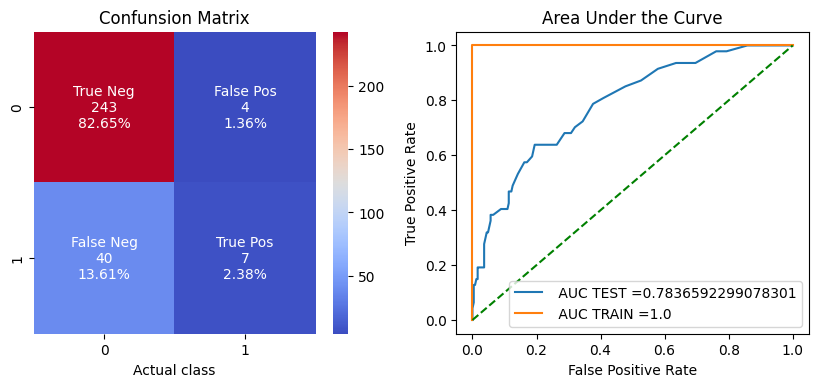

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,4), dpi = 100)

print(classification_report(rdm_forest_yhat, y_test))


cf_matrix = confusion_matrix(y_pred = rdm_forest_yhat, y_true = y_test )
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten() /np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


sns.heatmap(confusion_matrix(y_pred = rdm_forest_yhat, y_true = y_test ), ax = axes[0],
        cmap = 'coolwarm', annot = labels, fmt = '')

axes[0].set_title('Confunsion Matrix')
axes[0].set_xlabel("Predicted class")
axes[0].set_xlabel("Actual class")


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, rdm_forest.predict_proba(X_train)[: , 1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, rdm_forest.predict_proba(X_test)[: , 1])


axes[1].plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
axes[1].plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
axes[1].plot([0,1],[0,1],'g--')
axes[1].set_title('Area Under the Curve')
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
rf_result, rf_report, avg_rf_report = cross_validate_report(rdm_forest, 5)

  f-fold  train_accuracy  test_accuracy  train_auc  test_auc
0   cv_1             1.0       0.851695        1.0  0.676834
1   cv_2             1.0       0.868085        1.0  0.854261
2   cv_3             1.0       0.855319        1.0  0.756880
3   cv_4             1.0       0.846809        1.0  0.726690
4   cv_5             1.0       0.855319        1.0  0.857935

   avg_train_accuracy  avg_test_accuracy  avg_train_auc  avg_test_auc
0                 1.0           0.855445            1.0       0.77452


In [ ]:
rf_report

f-fold  train_accuracy  test_accuracy  train_auc  test_auc
0   cv_1             1.0       0.851695        1.0  0.676834
1   cv_2             1.0       0.868085        1.0  0.854261
2   cv_3             1.0       0.855319        1.0  0.756880
3   cv_4             1.0       0.846809        1.0  0.726690
4   cv_5             1.0       0.855319        1.0  0.857935

In [ ]:
avg_rf_report

avg_train_accuracy  avg_test_accuracy  avg_train_auc  avg_test_auc
0                 1.0           0.855445            1.0       0.77452

https://towardsdatascience.com/20x-times-faster-grid-search-cross-validation-19ef01409b7c

In [ ]:
pd.DataFrame(
    zip(X_train.columns, abs(rdm_forest.feature_importances_)),
    columns=["feature", "weight"],
).sort_values("weight", ascending= False).reset_index(drop=True)

feature    weight
0                                 Age  0.114952
1                         MonthlyRate  0.090788
2                    DistanceFromHome  0.078019
3                      YearsAtCompany  0.075335
4                   PercentSalaryHike  0.064787
5                YearsWithCurrManager  0.062787
6                  YearsInCurrentRole  0.056809
7                     JobSatisfaction  0.047024
8                  binarized_OverTime  0.047001
9             EnvironmentSatisfaction  0.045474
10              TrainingTimesLastYear  0.044960
11                    WorkLifeBalance  0.043889
12           RelationshipSatisfaction  0.041510
13                     JobInvolvement  0.037119
14               MaritalStatus_Single  0.025048
15                   binarized_Gender  0.018462
16   BusinessTravel_Travel_Frequently  0.018157
17                   Department_Sales  0.017653
18  Department_Research & Development  0.015889
19             MaritalStatus_Divorced  0.014754
20              MaritalStatus_Married  0.014664
21       BusinessTravel_Travel_Rarely  0.013131
22          BusinessTravel_Non-Travel  0.008177
23         Department_Human Resources  0.003612

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gradboost_model = GradientBoostingClassifier(n_estimators = 200)
gradboost_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [ ]:
gradboost_yhat =  gradboost_model.predict(X_test)

In [ ]:
print(classification_report(y_true= y_test, y_pred = gradboost_yhat))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       247
           1       0.54      0.30      0.38        47

    accuracy                           0.85       294
   macro avg       0.71      0.62      0.65       294
weighted avg       0.82      0.85      0.83       294



In [ ]:
(zip(X_train.columns.tolist(), abs(logit_model.coef_)))

In [ ]:
X_train.columns.tolist()

['binarized_Gender',
 'binarized_OverTime',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'Age',
 'MonthlyRate',
 'DistanceFromHome',
 'PercentSalaryHike',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

In [ ]:
pd.DataFrame

In [ ]:
copy_data.select_dtypes(include = 'int64').columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'somethingnew',
       'MinimumSatis', 'encoded_attrition'],
      dtype='object')

In [ ]:
StandardScaler().fit_transform(copy_data[["Age"]])

array([[ 0.4463504 ],
       [ 1.32236521],
       [ 0.008343  ],
       ...,
       [-1.08667552],
       [ 1.32236521],
       [-0.32016256]])

In [ ]:
scaled_df = copy_data.copy(deep = True)

In [ ]:
scaled_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0  0.446350       Yes      Travel_Rarely   0.742527                   Sales   
1  1.322365        No  Travel_Frequently  -1.297775  Research & Development   
2  0.008343       Yes      Travel_Rarely   1.414363  Research & Development   
3 -0.429664        No  Travel_Frequently   1.461466  Research & Development   
4 -1.086676        No      Travel_Rarely  -0.524295  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0         -1.010909          2  Life Sciences                        2   
1         -0.147150          1  Life Sciences                        3   
2         -0.887515          2          Other                        4   
3         -0.764121          4  Life Sciences                        4   
4         -0.887515          1        Medical                        1   

   Gender  ...  YearsSinceLastPromotion  YearsWithCurrManager  somethingnew  \
0  Female  ...                        0                     5             0   
1    Male  ...                        1                     7             0   
2    Male  ...                        0                     0             0   
3  Female  ...                        3                     0             0   
4    Male  ...                        2                     2             0   

  OverallSatisfaction  MinimumSatis  EngagementType  %SalOver18  TalentStatus  \
0                 2.2             1      Disengaged       False             N   
1                 2.8             2         Neutral        True             Y   
2                 2.8             2         Neutral       False             N   
3                 3.2             3  Highly Engaged       False             N   
4                 2.6             1         Neutral       False             N   

       Hours encoded_attrition  
0  63.755319                 1  
1  84.098361                 0  
2  22.717391                 1  
3  51.946429                 0  
4  86.700000                 0  

[5 rows x 41 columns]

In [ ]:
numerical_var

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'somethingnew',
       'MinimumSatis'],
      dtype='object')

In [ ]:
categorical_var

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'EngagementType',
       'TalentStatus'],
      dtype='object')

In [ ]:
selected_col= ['Age', 'MonthlyRate', 'DistanceFromHome', 'PercentSalaryHike',
            'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
               'YearsWithCurrManager' ]

for col in selected_col:
    scaled_df[col] = StandardScaler().fit_transform(scaled_df[[col]])

In [ ]:
for col in selected_col:
    print(f"in {col}, mean = {round(scaled_df[col].mean(),0)}, std = {round(scaled_df[col].std(),0)}")

in Age, mean = -0.0, std = 1.0
in MonthlyRate, mean = 0.0, std = 1.0
in DistanceFromHome, mean = 0.0, std = 1.0
in PercentSalaryHike, mean = 0.0, std = 1.0
in TrainingTimesLastYear, mean = -0.0, std = 1.0
in YearsAtCompany, mean = 0.0, std = 1.0
in YearsInCurrentRole, mean = -0.0, std = 1.0
in YearsWithCurrManager, mean = -0.0, std = 1.0


In [ ]:
#adding string to list without .append()
scaled_df[selected_col + ["encoded_attrition"]].corr()['encoded_attrition']

Age                     -0.159205
MonthlyRate              0.015170
DistanceFromHome         0.077924
PercentSalaryHike       -0.013478
TrainingTimesLastYear   -0.059478
YearsAtCompany          -0.134392
YearsInCurrentRole      -0.160545
YearsWithCurrManager    -0.156199
encoded_attrition        1.000000
Name: encoded_attrition, dtype: float64

In [ ]:
scaled_df[selected_col + ["encoded_attrition"]].corr(method = 'spearman')['encoded_attrition']

Age                     -0.171214
MonthlyRate              0.015258
DistanceFromHome         0.079248
PercentSalaryHike       -0.023612
TrainingTimesLastYear   -0.051757
YearsAtCompany          -0.190419
YearsInCurrentRole      -0.180623
YearsWithCurrManager    -0.175355
encoded_attrition        1.000000
Name: encoded_attrition, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

###Logistic Regression on ONLY numerical features

In [ ]:
numerical_selected_col = ['Age', 'MonthlyRate', 'DistanceFromHome', 'PercentSalaryHike',
            'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
               'YearsWithCurrManager', 
               'EnvironmentSatisfaction','JobInvolvement', "JobSatisfaction", 'RelationshipSatisfaction',
               'WorkLifeBalance' ]

In [ ]:
X = scaled_df[numerical_selected_col]
y = scaled_df['encoded_attrition']

assert X.shape[0] == len(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,
                                                    test_size=0.2, 
                                                    shuffle= True,
                                                    random_state=42)

In [ ]:
linear_model = LogisticRegression(fit_intercept = True, class_weight= 'balanced')
linear_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
linear_model.coef_

array([[-0.31205464,  0.0457621 ,  0.19345773, -0.1048014 , -0.20754999,
         0.38256797, -0.52577149, -0.33413451, -0.19555916, -0.44317414,
        -0.26855816, -0.00933003]])

In [ ]:
yhat = linear_model.predict(X_test)

In [ ]:
accuracy_score(y_true= y_test, y_pred = yhat)

0.6870748299319728

In [ ]:
print(classification_report(y_true= y_test, y_pred = yhat))

              precision    recall  f1-score   support

           0       0.94      0.69      0.79       255
           1       0.25      0.69      0.37        39

    accuracy                           0.69       294
   macro avg       0.59      0.69      0.58       294
weighted avg       0.85      0.69      0.74       294



Text(77.77777777777779, 0.5, 'True label')

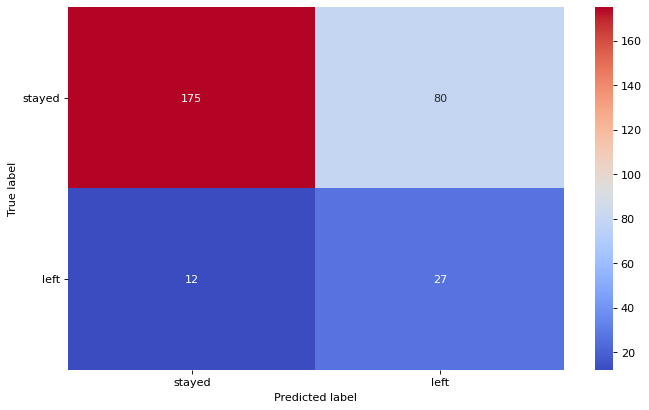

In [ ]:
fig,ax = plt.subplots(figsize=(10, 6), dpi=80)

sns.heatmap(confusion_matrix(y_true= y_test, y_pred = yhat), 
            annot = True,annot_kws={'fontsize':10}, fmt = 'g', ax = ax, cmap = 'coolwarm' )
ax.set_xticklabels(labels= ["stayed", "left"])
ax.set_yticklabels(labels= ["stayed", "left"], rotation = 0)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

In [ ]:
selected_col= ['Age', 'MonthlyRate', 'DistanceFromHome', 'PercentSalaryHike',
            'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
               'YearsWithCurrManager', 
               'EnvironmentSatisfaction','JobInvolvement', "JobSatisfaction", 'RelationshipSatisfaction',
               'WorkLifeBalance' ]


In [ ]:
len(selected_col)

13

In [ ]:
acc_list = []

for iter in range(0, len(selected_col)):
    
    selected_col= ['Age', 'MonthlyRate', 'DistanceFromHome', 'PercentSalaryHike',
            'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
               'YearsWithCurrManager', 
               'EnvironmentSatisfaction','JobInvolvement', "JobSatisfaction", 'RelationshipSatisfaction',
               'WorkLifeBalance' ]

    drop_col = selected_col.pop(iter)
    print(f"the dropped colomn: {drop_col}")
    print(f'the num of remain variable: {len(selected_col)}')
    X = scaled_df[selected_col]
    y = scaled_df['encoded_attrition']

    X_train, X_test, y_train, y_test = train_test_split(X, y ,
                                                    test_size=0.2, 
                                                    shuffle= True,
                                                    random_state=42)

    linear_model = LogisticRegression(fit_intercept = True, class_weight= 'balanced')
    linear_model.fit(X_train, y_train)

    yhat = linear_model.predict(X_test)
    acc = accuracy_score(y_true= y_test, y_pred = yhat)
    acc_list.append(acc)


    print(f'the accuracy score without {drop_col}: {acc}')
    print()


selected_col= ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
               'NumCompaniesWorked', 'TrainingTimesLastYear', 'YearsAtCompany']


the dropped colomn: Age
the num of remain variable: 12
the accuracy score without Age: 0.673469387755102

the dropped colomn: MonthlyRate
the num of remain variable: 12
the accuracy score without MonthlyRate: 0.6972789115646258

the dropped colomn: DistanceFromHome
the num of remain variable: 12
the accuracy score without DistanceFromHome: 0.6870748299319728

the dropped colomn: PercentSalaryHike
the num of remain variable: 12
the accuracy score without PercentSalaryHike: 0.6972789115646258

the dropped colomn: TrainingTimesLastYear
the num of remain variable: 12
the accuracy score without TrainingTimesLastYear: 0.6836734693877551

the dropped colomn: YearsAtCompany
the num of remain variable: 12
the accuracy score without YearsAtCompany: 0.7040816326530612

the dropped colomn: YearsInCurrentRole
the num of remain variable: 12
the accuracy score without YearsInCurrentRole: 0.6904761904761905

the dropped colomn: YearsWithCurrManager
the num of remain variable: 12
the accuracy score wit

In [ ]:
from sklearn.svm import SVC

###SVC on ONLY numerical features

In [ ]:
len(X_test)

294

In [ ]:
yhat

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
print(len(y_train[y_train == 0]))
print(len(y_train[y_train == 1]))

978
198


In [ ]:
selected_col= ['Age', 'MonthlyRate', 'DistanceFromHome', 'PercentSalaryHike',
            'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
               'YearsWithCurrManager', 
               'EnvironmentSatisfaction','JobInvolvement', "JobSatisfaction", 'RelationshipSatisfaction',
               'WorkLifeBalance' ]

In [ ]:
selected_col

['Age',
 'MonthlyRate',
 'DistanceFromHome',
 'PercentSalaryHike',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

In [ ]:
svm_clf = SVC(C = 10, kernel ='rbf', degree = 3)

X = scaled_df[selected_col]
y = scaled_df['encoded_attrition']


X_train, X_test, y_train, y_test = train_test_split(X, y ,
                                                test_size=0.25, 
                                                shuffle= True,
                                                random_state=42, stratify = y)

svm_clf.fit(X_train, y_train)

yhat = svm_clf.predict(X_test)

print(classification_report(y_true = y_test, y_pred = yhat))
print(confusion_matrix(y_true = y_test, y_pred = yhat))


              precision    recall  f1-score   support

           0       0.86      0.96      0.91       309
           1       0.45      0.15      0.23        59

    accuracy                           0.83       368
   macro avg       0.65      0.56      0.57       368
weighted avg       0.79      0.83      0.80       368

[[298  11]
 [ 50   9]]


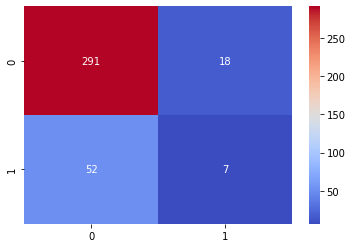

In [ ]:
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = yhat), annot = True, cmap = 'coolwarm', fmt = "g")

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [ ]:
svm_clf = SVC(C = 10, kernel ='rbf', degree = 3)

X = scaled_df[selected_col]
y = scaled_df['encoded_attrition']


X_train, X_test, y_train, y_test = train_test_split(X, y ,
                                                test_size=0.25, 
                                                shuffle= True,
                                                random_state=42, stratify = y)

svm_clf.fit(X_train, y_train)

y_train_pred = svm_clf.decision_function(X_train)    
y_test_pred = svm_clf.decision_function(X_test)


print(y_test_pred[: 5])

[-1.02170916 -1.19120787 -1.03637123 -1.08606446 -1.36157099]


In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

print(len(roc_curve(y_test, y_test_pred)))

3


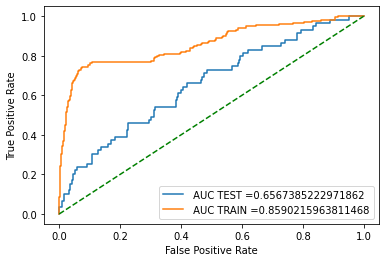

In [ ]:
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### RandomForestClassfier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rdm_forest = RandomForestClassifier( random_state=5, criterion = 'entropy')
rdm_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=5)

In [ ]:
rdm_forest_yhat= rdm_forest.predict(X_test)

In [ ]:
print(classification_report(rdm_forest_yhat, y_test))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       350
           1       0.14      0.44      0.21        18

    accuracy                           0.83       368
   macro avg       0.55      0.65      0.56       368
weighted avg       0.93      0.83      0.87       368



In [ ]:
rdm_forest.score(X_test, y_test)

0.8369565217391305

In [ ]:
pd.DataFrame(
    zip(X_train.columns, abs(rdm_forest.feature_importances_)),
    columns=["feature", "weight"],
).sort_values("weight").reset_index(drop=True)

feature    weight
0            WorkLifeBalance  0.050673
1   RelationshipSatisfaction  0.051627
2             JobInvolvement  0.053438
3      TrainingTimesLastYear  0.053856
4         YearsInCurrentRole  0.054186
5            JobSatisfaction  0.054843
6    EnvironmentSatisfaction  0.055658
7       YearsWithCurrManager  0.076681
8          PercentSalaryHike  0.078976
9             YearsAtCompany  0.085685
10          DistanceFromHome  0.097787
11               MonthlyRate  0.136430
12                       Age  0.150162

### Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe = RFE(estimator= svm_clf2, n_features_to_select=5)
rfe.fit(X_train, y_train)

RFE(estimator=SVC(C=100, degree=1, gamma=1, kernel='linear'),
    n_features_to_select=5)

In [ ]:
rfe.support_

array([False,  True, False,  True, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False])

In [ ]:
X_train.columns

Index(['binarized_Gender', 'binarized_OverTime', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Age', 'MonthlyRate', 'DistanceFromHome',
       'PercentSalaryHike', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction',
       'WorkLifeBalance'],
      dtype='object')

In [ ]:
X_train.columns[rfe.support_]

Index(['binarized_OverTime', 'BusinessTravel_Travel_Frequently',
       'Department_Research & Development', 'MaritalStatus_Single',
       'JobInvolvement'],
      dtype='object')

In [ ]:
rfe.ranking_

array([16,  1,  5,  1, 14, 17,  1, 18, 11, 12,  1,  3, 19,  8, 20, 15, 10,
        9,  2,  4,  1,  6, 13,  7])

#### Retrain with randomforest

In [ ]:
new_rdm_forest = RandomForestClassifier(random_state=5 )
new_rdm_forest.fit(X_train.iloc[:, rfe.support_], y_train )

RandomForestClassifier(random_state=5)

In [ ]:
pd.DataFrame(
    zip(X_train.columns[rfe.support_], abs(new_rdm_forest.feature_importances_)),
    columns=["feature", "weight"],
).sort_values("weight").reset_index(drop=True)

feature    weight
0  PercentSalaryHike  0.137285
1   DistanceFromHome  0.172596
2     YearsAtCompany  0.182917
3                Age  0.234532
4        MonthlyRate  0.272670

In [ ]:
X_train.iloc[:, rfe.support_]

(1102, 5)

In [ ]:
new_rdm_forest.score(X_test.iloc[:, rfe.support_], y_test)

0.8260869565217391

In [ ]:
perm = PermutationImportance(new_rdm_forest, random_state = 1,
                             n_iter = 30, cv = "prefit").fit(X_train.iloc[:, rfe.support_], y_train)


eli5.show_weights(perm, feature_names =X_test.columns[ rfe.support_].tolist() )

In [ ]:
data.groupby('Attrition')['YearsAtCompany'].describe()

count      mean       std  min  25%  50%   75%   max
Attrition                                                       
No         1233.0  7.369019  6.096298  0.0  3.0  6.0  10.0  37.0
Yes         237.0  5.130802  5.949984  0.0  1.0  3.0   7.0  40.0

In [ ]:
data.groupby('Attrition')['Age'].describe()

count       mean      std   min   25%   50%   75%   max
Attrition                                                          
No         1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0
Yes         237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


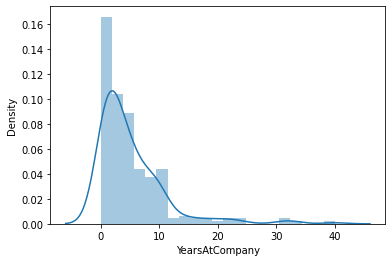

In [ ]:
sns.distplot(data[data['Attrition'] == 'Yes']['YearsAtCompany'])

In [ ]:
data[data['Attrition'] == 'Yes']['YearsAtCompany']

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
2      37       Yes      Travel_Rarely       1373  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
21     36       Yes      Travel_Rarely       1218                   Sales   
24     34       Yes      Travel_Rarely        699  Research & Development   
26     32       Yes  Travel_Frequently       1125  Research & Development   
33     39       Yes      Travel_Rarely        895                   Sales   
34     24       Yes      Travel_Rarely        813  Research & Development   
36     50       Yes      Travel_Rarely        869                   Sales   
42     26       Yes      Travel_Rarely       1357  Research & Development   
45     41       Yes      Travel_Rarely       1360  Research & Development   
50     48       Yes      Travel_Rarely        626  Research & Development   
51     28       Yes      Travel_Rarely       1434  Research & Development   
69     36       Yes      Travel_Rarely        318  Research & Development   
89     46       Yes      Travel_Rarely        669                   Sales   
100    37       Yes      Travel_Rarely        807         Human Resources   
102    20       Yes  Travel_Frequently        871  Research & Development   
107    25       Yes      Travel_Rarely        240                   Sales   
111    34       Yes  Travel_Frequently        658  Research & Development   
122    56       Yes      Travel_Rarely        441  Research & Development   
124    31       Yes      Travel_Rarely        249                   Sales   
126    58       Yes      Travel_Rarely        147  Research & Development   
127    19       Yes      Travel_Rarely        528                   Sales   
132    31       Yes      Travel_Rarely        542                   Sales   
136    51       Yes  Travel_Frequently       1150  Research & Development   
140    32       Yes      Travel_Rarely       1033  Research & Development   
171    19       Yes  Travel_Frequently        602                   Sales   
177    19       Yes      Travel_Rarely        303  Research & Development   
182    41       Yes      Travel_Rarely       1356                   Sales   
192    35       Yes      Travel_Rarely        556  Research & Development   
204    38       Yes      Travel_Rarely       1180  Research & Development   
205    29       Yes      Travel_Rarely        121                   Sales   
210    32       Yes      Travel_Rarely       1045                   Sales   
214    30       Yes      Travel_Rarely       1005  Research & Development   
216    30       Yes  Travel_Frequently        334                   Sales   
217    29       Yes      Travel_Rarely        992  Research & Development   
229    29       Yes      Travel_Rarely        896  Research & Development   
234    33       Yes      Travel_Rarely        813  Research & Development   
236    33       Yes      Travel_Rarely        465  Research & Development   
239    32       Yes      Travel_Rarely        515  Research & Development   
250    37       Yes  Travel_Frequently        504  Research & Development   
259    31       Yes  Travel_Frequently        307  Research & Development   
264    28       Yes      Travel_Rarely        529  Research & Development   
271    47       Yes         Non-Travel        666  Research & Development   
286    44       Yes  Travel_Frequently        920  Research & Development   
288    26       Yes      Travel_Rarely       1449  Research & Development   
293    26       Yes      Travel_Rarely        950                   Sales   
296    18       Yes      Travel_Rarely        230  Research & Development   
317    52       Yes      Travel_Rarely        723  Research & Development   
323    28       Yes      Travel_Rarely       1157  Research & Development   
327    39       Yes      Travel_Rarely       1162                   Sales   
33

##Eli5

In [ ]:
pip install eli5

     |████████████████████████████████| 106 kB 4.1 MB/s 


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
eli5.explain_weights(svm_clf)

Explanation(estimator='SVC(C=10)', description=None, error="only kernel='linear' is currently supported for libsvm-based classifiers", method=None, is_regression=False, targets=None, feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

https://medium.com/geekculture/explainable-ai-xai-methods-part-4-permutation-feature-importance-72b8a5d9be05

In [ ]:
perm = PermutationImportance(svm_clf, random_state = 1,
                             n_iter = 1, cv = "prefit").fit(X_test, y_test)
eli5.show_weights(perm, feature_names =X_test.columns.tolist() )

In [ ]:
perm = PermutationImportance(svm_clf, random_state = 15,
                             n_iter = 5, cv = "prefit").fit(X_test, y_test)
eli5.show_weights(perm, feature_names =X_test.columns.tolist() )

In [ ]:
perm = PermutationImportance(svm_clf, random_state = 50,
                             n_iter = 10, cv = "prefit").fit(X_test, y_test)
eli5.show_weights(perm, feature_names =X_test.columns.tolist() )

# Salary Distribution

In [ ]:
dir(svm_clf)

['C',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_proba',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_intercept_',
 '_more_tags',
 '_n_support',
 '_pairwise',
 '_probA',
 '_probB',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predict',
 '_sparse_pr

In [ ]:
svm_clf.support_vectors_.shape

(447, 13)

In [ ]:
from scipy import stats

In [ ]:
data.columns.unique

<bound method Index.unique of Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'somethingnew', 'OverallSatisfaction',
       'MinimumSatis', 'EngagementType', '%SalOver18', 'TalentStatus',
       'Hours'],
      dtype='object')>

## MonthlyIncome

### MonthlyIncome - Gender

In [ ]:
data.groupby('Gender').describe()['MonthlyIncome'].T

Gender        Female          Male
count     588.000000    882.000000
mean     6686.566327   6380.507937
std      4695.608507   4714.856577
min      1129.000000   1009.000000
25%      3037.000000   2819.500000
50%      5081.500000   4837.500000
75%      8711.750000   8113.750000
max     19973.000000  19999.000000

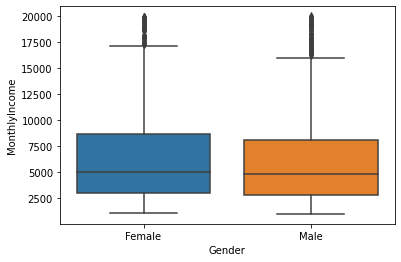

In [ ]:
sns.boxplot( x = 'Gender', y = 'MonthlyIncome', data = data)

In [ ]:
m_mthincome = data[ data['Gender'] == "Male"]["MonthlyIncome"]
f_mthincome = data[ data['Gender'] == "Female"]["MonthlyIncome"]

mthincome_ttest = daily_ttest = stats.ttest_ind(m_mthincome, f_mthincome, equal_var=False,
                               alternative = 'two-sided')

Text(0.5, 1.0, 't-test: -1.222, p-value: 0.222')

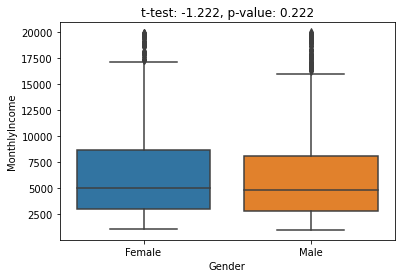

In [ ]:
sns.boxplot( x = 'Gender', y = 'MonthlyIncome', data = data)
plt.title(f"t-test: {round(mthincome_ttest[0],3)}, p-value: {round(mthincome_ttest[1], 3)}")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


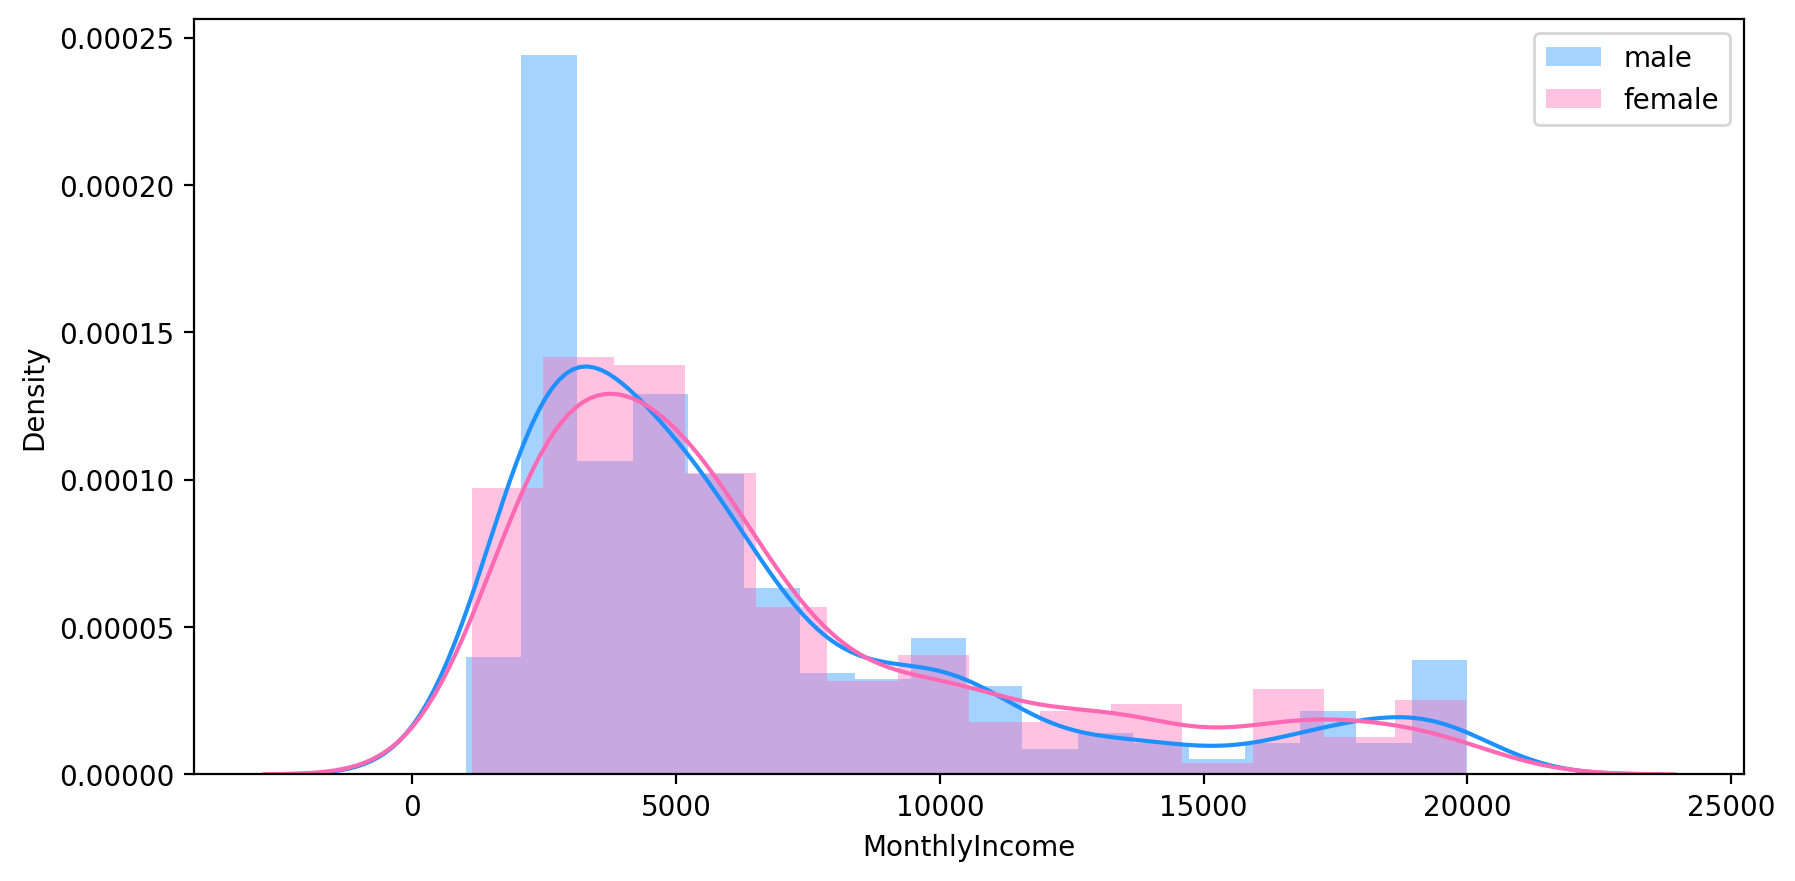

In [ ]:
fig , axes = plt.subplots(1,1, figsize = (10,5), dpi = 200 )

sns.distplot(data[data["Gender"] == 'Male']["MonthlyIncome"], color = 'dodgerblue', label = 'male', ax = axes)
sns.distplot(data[data["Gender"] == 'Female']["MonthlyIncome"], color = 'hotpink', label = "female", ax = axes)
plt.legend()
plt.show()

In [ ]:
pg.pairwise_ttests(data = data, dv  = 'MonthlyIncome', between= ['Gender'])

Contrast       A     B  Paired  Parametric         T          dof  \
0   Gender  Female  Male   False        True  1.222262  1261.546661   

        Tail     p-unc   BF10    hedges  
0  two-sided  0.221837  0.125  0.064986

### MonthlyIncome - Department

In [ ]:
data.groupby('Department').describe()['MonthlyIncome']

count         mean          std     min      25%  \
Department                                                                 
Human Resources          63.0  6654.507937  5788.732921  1555.0  2644.00   
Research & Development  961.0  6281.252862  4895.835087  1009.0  2741.00   
Sales                   446.0  6959.172646  4058.739322  1052.0  4446.25   

                           50%      75%      max  
Department                                        
Human Resources         3886.0  8412.50  19717.0  
Research & Development  4374.0  7655.00  19999.0  
Sales                   5754.5  8776.75  19847.0

No handles with labels found to put in legend.


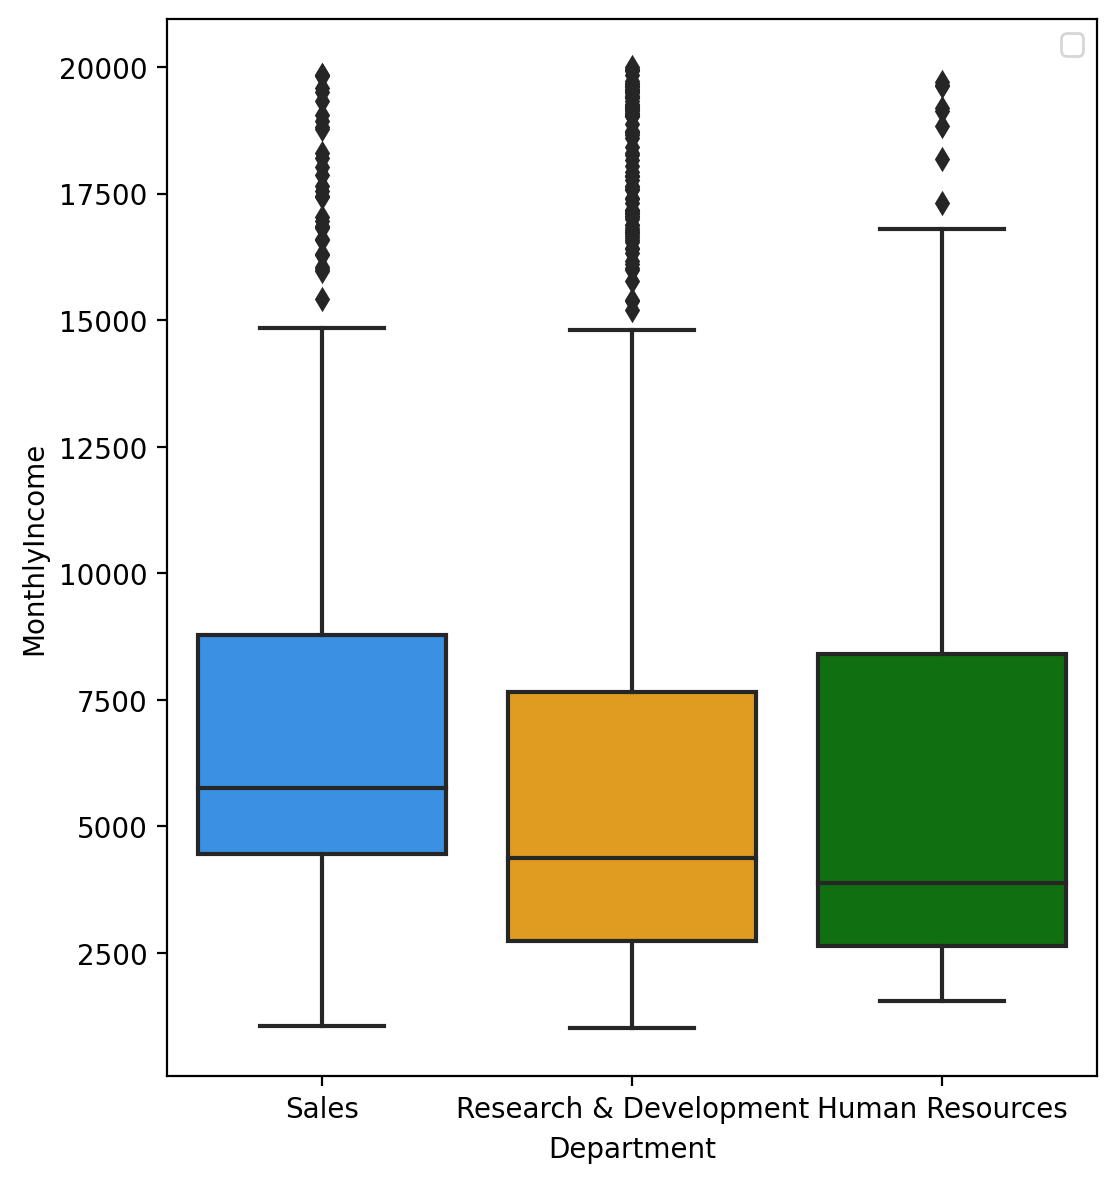

In [ ]:
fig , axes = plt.subplots(1,1, figsize = (6,7), dpi = 200 )

sns.boxplot( data= data, x = 'Department', y = "MonthlyIncome",
            palette = ['dodgerblue', 'orange', 'green'],
            ax= axes)
plt.legend()
plt.show()

In [ ]:
pg.anova(data = data, dv  = 'MonthlyIncome', between= ['Department'])

Source  ddof1  ddof2         F     p-unc       np2
0  Department      2   1467  3.201783  0.040974  0.004346

In [ ]:
pg.pairwise_ttests(data = data, dv  = 'MonthlyIncome', between= ['Department'])

Contrast                       A                       B  Paired  \
0  Department         Human Resources  Research & Development   False   
1  Department         Human Resources                   Sales   False   
2  Department  Research & Development                   Sales   False   

   Parametric         T          dof       Tail     p-unc   BF10    hedges  
0        True  0.500197    67.941358  two-sided  0.618552   0.16  0.075280  
1        True -0.403953    70.862149  two-sided  0.687464  0.159 -0.070620  
2        True -2.725280  1030.991688  two-sided  0.006533  2.497 -0.145804

In [ ]:
stats.ttest_ind(data[data["Department"] == "Research & Development"]["MonthlyIncome"],
            data[data["Department"] == "Sales"]["MonthlyIncome"],
            equal_var = False, alternative = 'two-sided')

Ttest_indResult(statistic=-2.7252799008606683, pvalue=0.006533491859678079)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

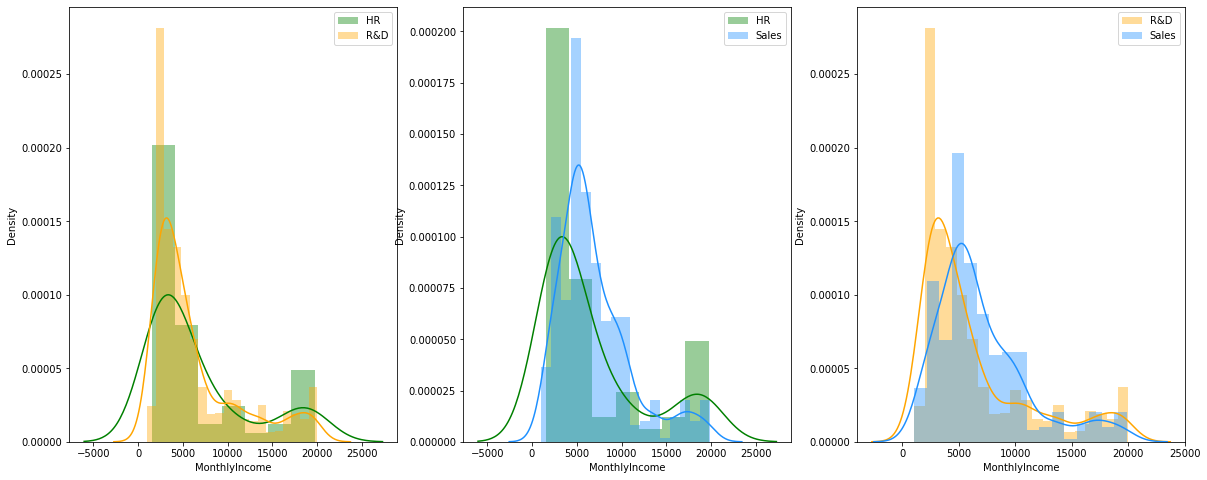

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (20,8))

sns.distplot(data[data["Department"] == "Human Resources"]["MonthlyIncome"], ax =axes[0], label = 'HR', color = 'green')
sns.distplot(data[data["Department"] == "Research & Development"]["MonthlyIncome"], ax =axes[0], label = 'R&D', color = 'orange')

sns.distplot(data[data["Department"] == "Human Resources"]["MonthlyIncome"], ax =axes[1], label = 'HR',  color = 'green')
sns.distplot(data[data["Department"] == "Sales"]["MonthlyIncome"], ax =axes[1], label = 'Sales', color = 'dodgerblue')

sns.distplot(data[data["Department"] == "Research & Development"]["MonthlyIncome"], ax =axes[2], label = 'R&D', color = 'orange')
sns.distplot(data[data["Department"] == "Sales"]["MonthlyIncome"], ax =axes[2], label = 'Sales',  color = 'dodgerblue')

axes[0].legend()
axes[1].legend()
axes[2].legend()

In [ ]:
condition = (data["Department"] == 'Research & Development')  |  (data["Department"] == 'Sales')
data[condition].groupby(['Department', 'Gender']).aggregate({"MonthlyIncome" : ["count", "mean"]})["MonthlyIncome"]

count         mean
Department             Gender                    
Research & Development Female    379  6513.691293
                       Male      582  6129.888316
Sales                  Female    189  6972.126984
                       Male      257  6949.645914

In [ ]:
pg.pairwise_ttests(data = data[condition], dv  = 'MonthlyIncome', between= ['Gender', 'Department'])

Contrast  Gender                       A      B Paired  \
0               Gender       -                  Female   Male  False   
1           Department       -  Research & Development  Sales  False   
2  Gender * Department  Female  Research & Development  Sales  False   
3  Gender * Department    Male  Research & Development  Sales  False   

   Parametric         T          dof       Tail     p-unc   BF10    hedges  
0        True  1.128612  1221.082595  two-sided  0.259283  0.114  0.061235  
1        True -2.725280  1030.991688  two-sided  0.006533  2.497 -0.145804  
2        True -1.152687   416.504544  two-sided  0.249700  0.189 -0.098644  
3        True -2.578842   614.257487  two-sided  0.010145  2.151 -0.176051

In [ ]:
pg.pairwise_ttests(data = data[condition], dv  = 'MonthlyIncome', between= ['JobLevel', 'Department'])

/usr/local/lib/python3.7/dist-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


Contrast JobLevel                       A      B Paired  \
0                JobLevel        -                       1      2  False   
1                JobLevel        -                       1      3  False   
2                JobLevel        -                       1      4  False   
3                JobLevel        -                       1      5  False   
4                JobLevel        -                       2      3  False   
5                JobLevel        -                       2      4  False   
6                JobLevel        -                       2      5  False   
7                JobLevel        -                       3      4  False   
8                JobLevel        -                       3      5  False   
9                JobLevel        -                       4      5  False   
10             Department        -  Research & Development  Sales  False   
11  JobLevel * Department        1  Research & Development  Sales  False   
12  JobLevel * Department        2  Research & Development  Sales  False   
13  JobLevel * Department        3  Research & Development  Sales  False   
14  JobLevel * Department        4  Research & Development  Sales  False   
15  JobLevel * Department        5  Research & Development  Sales  False   

    Parametric           T          dof       Tail          p-unc        BF10  \
0         True  -38.403462   793.689751  two-sided  3.530263e-183  4.366e+196   
1         True  -54.247401   241.336346  two-sided  3.424500e-137  1.111e+252   
2         True  -68.871511   107.906759  two-sided   5.188834e-91  1.631e+285   
3         True -224.165391    96.209229  two-sided  1.333939e-132         inf   
4         True  -30.894738   320.061177  two-sided   4.713748e-98  4.138e+130   
5         True  -52.079634   125.894101  two-sided   4.911476e-87  1.737e+224   
6         True -151.945586   203.241995  two-sided  3.122197e-211         inf   
7         True  -25.673704   198.900696  two-sided   4.683145e-65   1.015e+75   
8         True  -66.340179   271.796979  two-sided  6.565929e-170  3.382e+165   
9         True  -19.280713   125.336563  two-sided   2.608407e-39   1.445e+40   
10        True   -2.725280  1030.991688  two-sided   6.533492e-03       2.497   
11        True    4.096289   116.233747  two-sided   7.795914e-05     362.985   
12        True   -3.663418   491.318717  two-sided   2.759201e-04      62.435   
13        True    3.825690   208.248511  two-sided   1.723554e-04     123.886   
14        True    1.210698    64.560222  two-sided   2.304248e-01       0.419   
15        True    0.689813    15.800091  two-sided   5.003190e-01       0.369   

       hedges  
0   -2.376130  
1   -5.991671  
2  -12.511195  
3  -22.441068  
4   -2.789306  
5   -6.667035  
6  -10.097095  
7   -3.089735  
8   -5.749341  
9   -2.498820  
10  -0.145804  
11   0.448006  
12  -0.323560  
13   0.498341  
14   0.254656  
15   0.250503

In [ ]:
data["Dept-Level"] = data["Department"].map(str) + "-" +  data["JobLevel"].map(str)

In [ ]:
pg.pairwise_ttests(data = data[condition], dv  = 'MonthlyIncome', between= ['Gender', 'Dept-Level'])

/usr/local/lib/python3.7/dist-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


Contrast  Gender                         A  \
0                 Gender       -                    Female   
1             Dept-Level       -  Research & Development-1   
2             Dept-Level       -  Research & Development-1   
3             Dept-Level       -  Research & Development-1   
4             Dept-Level       -  Research & Development-1   
5             Dept-Level       -  Research & Development-1   
6             Dept-Level       -  Research & Development-1   
7             Dept-Level       -  Research & Development-1   
8             Dept-Level       -  Research & Development-1   
9             Dept-Level       -  Research & Development-1   
10            Dept-Level       -  Research & Development-2   
11            Dept-Level       -  Research & Development-2   
12            Dept-Level       -  Research & Development-2   
13            Dept-Level       -  Research & Development-2   
14            Dept-Level       -  Research & Development-2   
15            Dept-Level       -  Research & Development-2   
16            Dept-Level       -  Research & Development-2   
17            Dept-Level       -  Research & Development-2   
18            Dept-Level       -  Research & Development-3   
19            Dept-Level       -  Research & Development-3   
20            Dept-Level       -  Research & Development-3   
21            Dept-Level       -  Research & Development-3   
22            Dept-Level       -  Research & Development-3   
23            Dept-Level       -  Research & Development-3   
24            Dept-Level       -  Research & Development-3   
25            Dept-Level       -  Research & Development-4   
26            Dept-Level       -  Research & Development-4   
27            Dept-Level       -  Research & Development-4   
28            Dept-Level       -  Research & Development-4   
29            Dept-Level       -  Research & Development-4   
30            Dept-Level       -  Research & Development-4   
31            Dept-Level       -  Research & Development-5   
32            Dept-Level       -  Research & Development-5   
33            Dept-Level       -  Research & Development-5   
34            Dept-Level       -  Research & Development-5   
35            Dept-Level       -  Research & Development-5   
36            Dept-Level       -                   Sales-1   
37            Dept-Level       -                   Sales-1   
38            Dept-Level       -                   Sales-1   
39            Dept-Level       -                   Sales-1   
40            Dept-Level       -                   Sales-2   
41            Dept-Level       -                   Sales-2   
42            Dept-Level       -                   Sales-2   
43            Dept-Level       -                   Sales-3   
44            Dept-Level       -                   Sales-3   
45            Dept-Level       -                   Sales-4   
46   Gender * Dept-Level  Female  Research & Development-1   
47   Gender * Dept-Level  Female  Research & Development-1   
48   Gender * Dept-Level  Female  Research & Development-1   
49   Gender * Dept-Level  Female  Research & Development-1   
50   Gender * Dept-Level  Female  Research & Development-1   
51   Gender * Dept-Level  Female  Research & Development-1   
52   Gender * Dept-Level  Female  Research & Development-1   
53   Gender * Dept-Level  Female  Research & Development-1   
54   Gender * Dept-Level  Female  Research & Development-1   
55   Gender * Dept-Level  Female  Research & Development-2   
56   Gender * Dept-Level  Female  Research & Development-2   
57   Gender * Dept-Level  Female  Research & Development-2   
58   Gender * Dept-Level  Female  Research & Development-2   
59   Gender * Dept-Level  Female  Research & Development-2   
60   Gender * Dept-Level  Female  Research & Development-2   
61   Gender * Dept-Level  Female  Research & Development-2   
62   Gender * Dept-Level  Female  Research & Development-2   
63   Gender * Dept-Level  Female  Research & Dev

In [ ]:
type(8.165250e-80)

float

In [ ]:
data[ (data["Gender"] == "Male")    & (data["Department"] == "Research & Development") |    (data["Department"] == "Sales")        ].groupby(
    ["Department", "JobLevel"]).aggregate( {"MonthlyIncome": ["count", "mean"]})

MonthlyIncome              
                                        count          mean
Department             JobLevel                            
Research & Development 1                  280   2835.314286
                       2                  165   5319.193939
                       3                   67  10077.208955
                       4                   37  15832.783784
                       5                   33  19244.060606
Sales                  1                   76   2506.723684
                       2                  240   5746.054167
                       3                   83   9282.289157
                       4                   34  15166.264706
                       5                   13  19088.000000

In [ ]:
result = data[ (data["Gender"] == "Male")    & (data["Department"] == "Research & Development") |    (data["Department"] == "Sales")        ].groupby(
    ["Department", "JobLevel"]).aggregate( {"MonthlyIncome": ["count", "mean"]}).reset_index()

In [ ]:
result

Department JobLevel MonthlyIncome              
                                           count          mean
0  Research & Development        1           280   2835.314286
1  Research & Development        2           165   5319.193939
2  Research & Development        3            67  10077.208955
3  Research & Development        4            37  15832.783784
4  Research & Development        5            33  19244.060606
5                   Sales        1            76   2506.723684
6                   Sales        2           240   5746.054167
7                   Sales        3            83   9282.289157
8                   Sales        4            34  15166.264706
9                   Sales        5            13  19088.000000

In [ ]:
result = result.droplevel(level= 1, axis =1)
result

Department  JobLevel  MonthlyIncome  MonthlyIncome
0  Research & Development         1            280    2835.314286
1  Research & Development         2            165    5319.193939
2  Research & Development         3             67   10077.208955
3  Research & Development         4             37   15832.783784
4  Research & Development         5             33   19244.060606
5                   Sales         1             76    2506.723684
6                   Sales         2            240    5746.054167
7                   Sales         3             83    9282.289157
8                   Sales         4             34   15166.264706
9                   Sales         5             13   19088.000000

In [ ]:
result.columns = ['Department', "JobLevel", "Headcount", "AvgMonthlyIncome"]

In [ ]:
result

Department  JobLevel  Headcount  AvgMonthlyIncome
0  Research & Development         1        280       2835.314286
1  Research & Development         2        165       5319.193939
2  Research & Development         3         67      10077.208955
3  Research & Development         4         37      15832.783784
4  Research & Development         5         33      19244.060606
5                   Sales         1         76       2506.723684
6                   Sales         2        240       5746.054167
7                   Sales         3         83       9282.289157
8                   Sales         4         34      15166.264706
9                   Sales         5         13      19088.000000

In [ ]:
result.pivot(index='JobLevel', columns='Department', values=['Headcount', 'AvgMonthlyIncome'])

Headcount              AvgMonthlyIncome              
Department Research & Development  Sales Research & Development         Sales
JobLevel                                                                     
1                           280.0   76.0            2835.314286   2506.723684
2                           165.0  240.0            5319.193939   5746.054167
3                            67.0   83.0           10077.208955   9282.289157
4                            37.0   34.0           15832.783784  15166.264706
5                            33.0   13.0           19244.060606  19088.000000

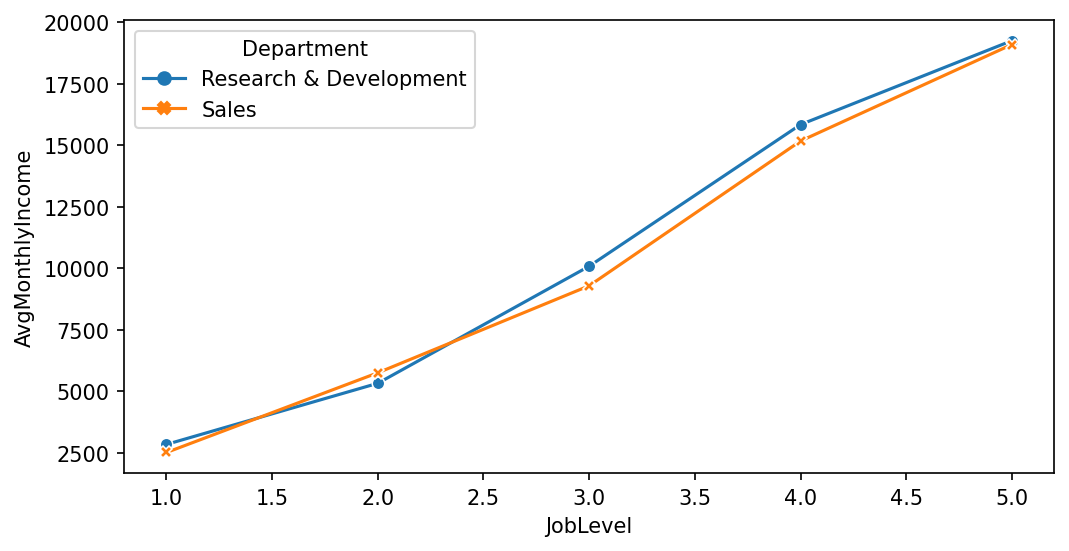

In [ ]:
fig, axes = plt.subplots(1,1, figsize = (8,4), dpi = 150)

plt.plot
sns.lineplot( data= result, x = "JobLevel", y ="AvgMonthlyIncome", hue = "Department", style= "Department",
    markers=True, dashes=False
)

In [ ]:



for level in range(1,6):
    print(stats.ttest_ind(
        data[ (data["Gender"] == "Male")    & (data["Department"] == "Research & Development") & (data["JobLevel"] == level) ]["MonthlyIncome"],
        data[ (data["Gender"] == "Male")    & (data["Department"] == "Sales") & (data["JobLevel"] == level) ]["MonthlyIncome"],
         equal_var=False,alternative = 'two-sided'
    ))

Ttest_indResult(statistic=2.8032138665950184, pvalue=0.006986758499883214)
Ttest_indResult(statistic=-2.9168022366641275, pvalue=0.0038246310305760506)
Ttest_indResult(statistic=2.7744774304557143, pvalue=0.006447920483305958)
Ttest_indResult(statistic=1.4381906945963403, pvalue=0.1610635834288027)
Ttest_indResult(statistic=0.2822320012130527, pvalue=0.7859572539563578)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

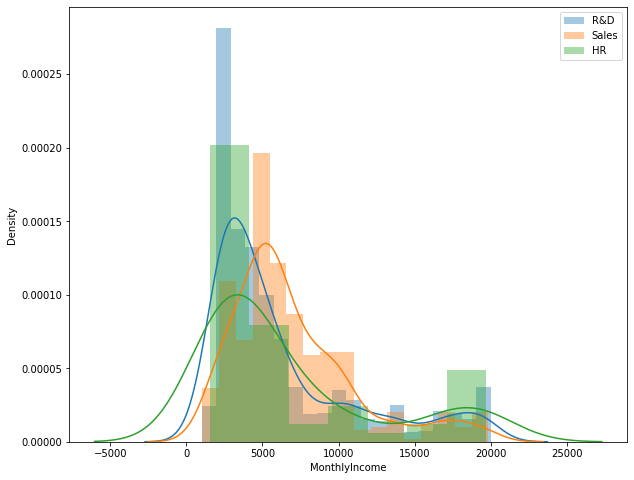

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (10,8))

sns.distplot(data[data["Department"] == "Research & Development"]["MonthlyIncome"], ax =ax, label = 'R&D')
sns.distplot(data[data["Department"] == "Sales"]["MonthlyIncome"], ax =ax, label = "Sales")
sns.distplot(data[data["Department"] == "Human Resources"]["MonthlyIncome"], ax =ax, label = "HR")
ax.legend()

Let's continue on level 12 3 overall satisfacation score

In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'somethingnew', 'OverallSatisfaction',
       'MinimumSatis', 'EngagementType', '%SalOver18', 'TalentStatus', 'Hours',
       'Dept-Level'],
      dtype='object')

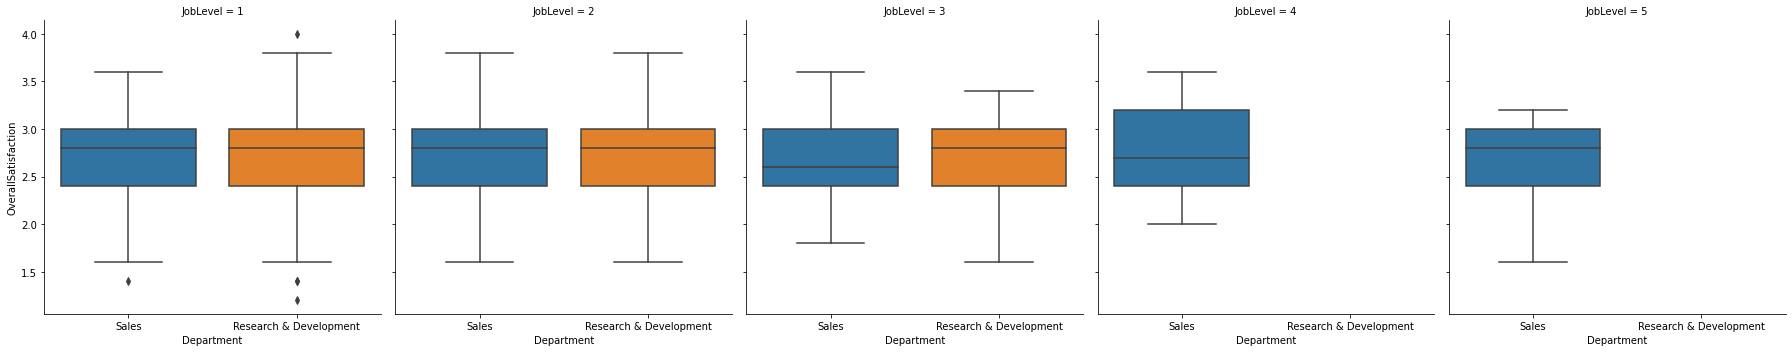

In [ ]:
condition = (data["Department"] == "Sales") | (data["Department"] == "Research & Development") & (data["Gender"] == "Male") & (data["JobLevel"] <= 3)

sns.catplot( data =data[condition] , col= "JobLevel", x = "Department", y = 'OverallSatisfaction',
            kind = 'box' )

KeyboardInterrupt: ignored

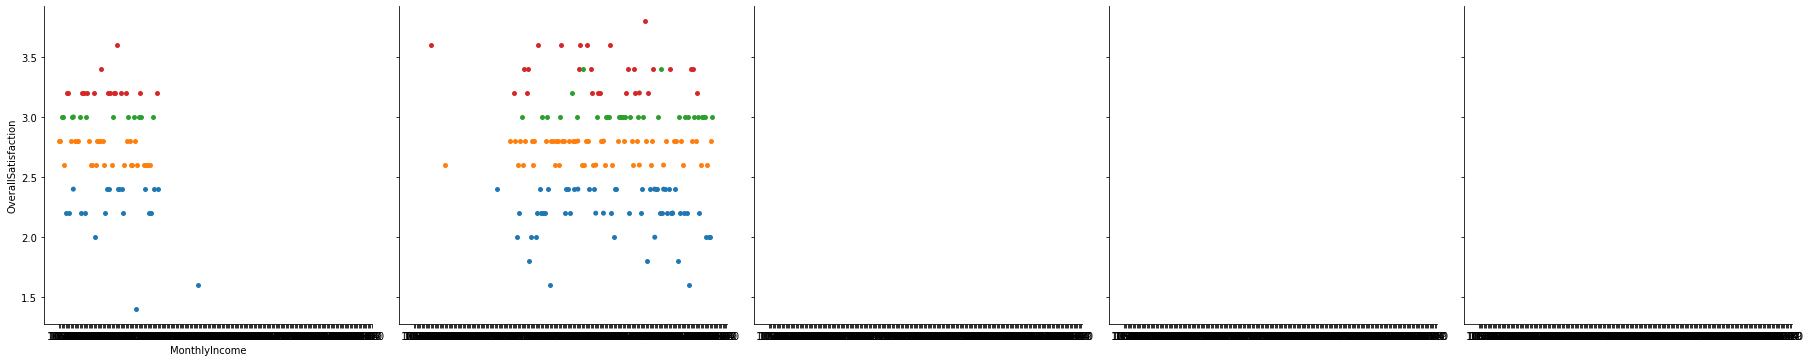

In [ ]:
sns.catplot( data= data[data["Department"] == "Sales"], x = 'MonthlyIncome', y = 'OverallSatisfaction', col = 'JobLevel', hue = "EngagementType")

### MonthlyIncome - Talent

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


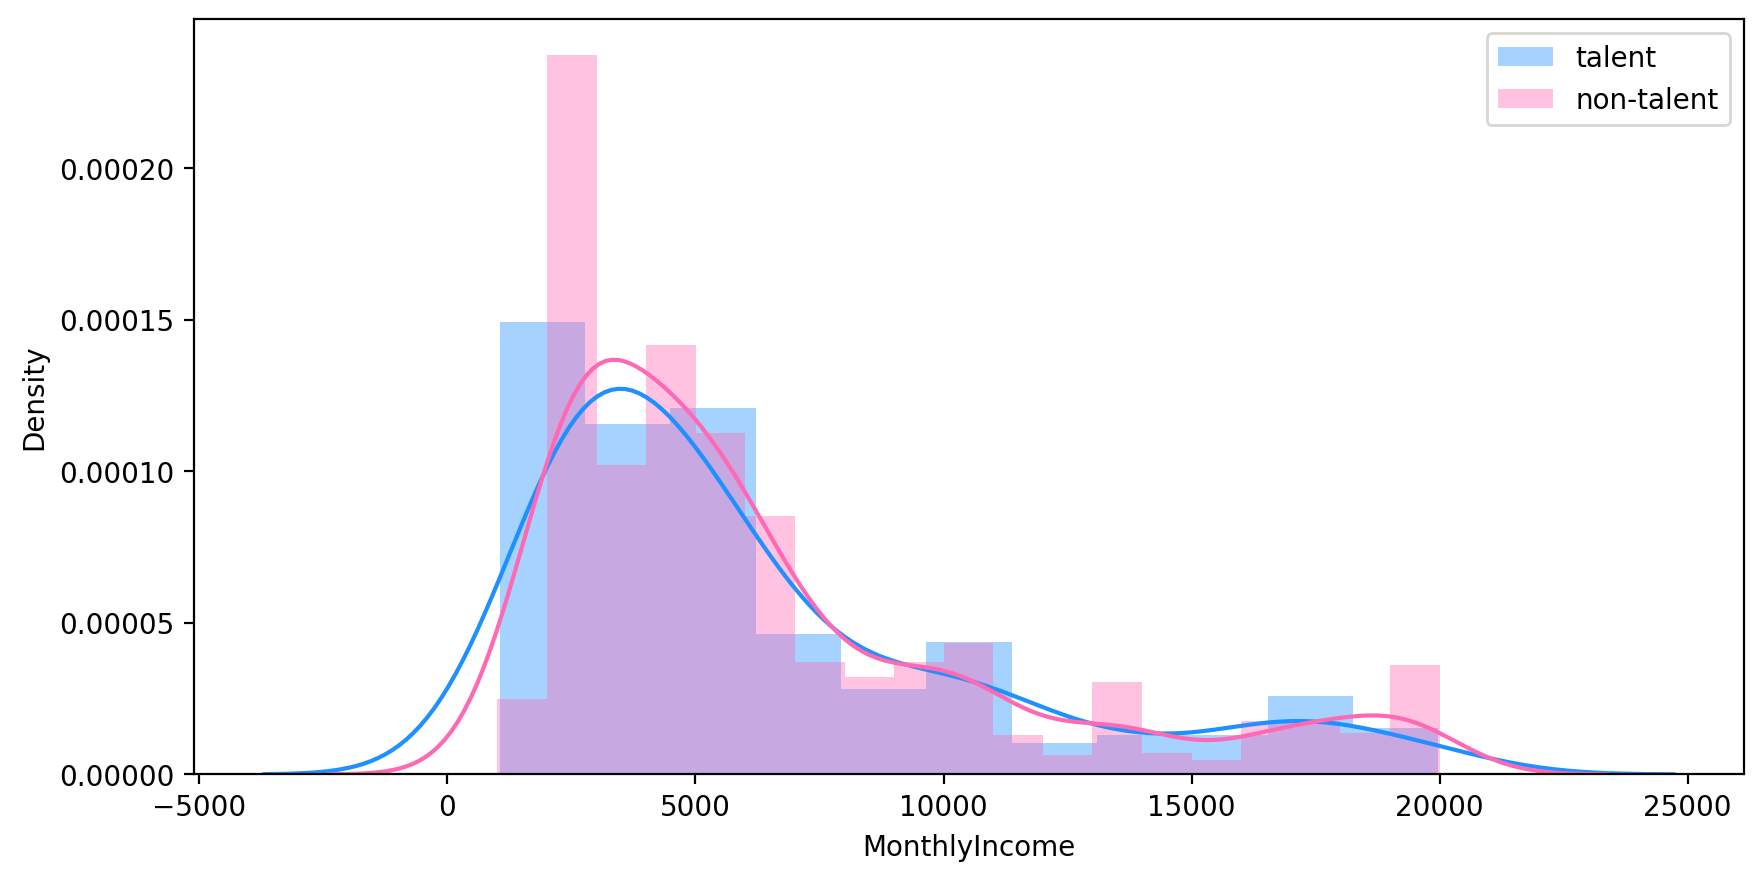

In [ ]:
fig , axes = plt.subplots(1,1, figsize = (10,5), dpi = 200 )

sns.distplot(data[data["TalentStatus"] == 'Y']["MonthlyIncome"], color = 'dodgerblue', label = 'talent', ax = axes)
sns.distplot(data[data["TalentStatus"] == 'N']["MonthlyIncome"], color = 'hotpink', label = "non-talent", ax = axes)
plt.legend()
plt.show()

In [ ]:
stats.ttest_ind(data[data["TalentStatus"] == 'Y']["MonthlyIncome"], 
                  data[data["TalentStatus"] == 'N']["MonthlyIncome"], 
                  equal_var = False, alternative = 'two-sided'
                  )

Ttest_indResult(statistic=-0.660068807089149, pvalue=0.5096936226249329)

In [ ]:
pg.pairwise_ttests(data = data, dv  = 'MonthlyIncome', between= ['TalentStatus', "Gender"])

Contrast TalentStatus       A     B Paired  Parametric  \
0           TalentStatus            -       N     Y  False        True   
1                 Gender            -  Female  Male  False        True   
2  TalentStatus * Gender            N  Female  Male  False        True   
3  TalentStatus * Gender            Y  Female  Male  False        True   

          T          dof alternative     p-unc   BF10    hedges  
0  0.660069   313.957538   two-sided  0.509694    0.1  0.047414  
1  1.222262  1261.546661   two-sided  0.221837  0.125  0.064986  
2  0.743313  1066.779244   two-sided  0.457456  0.085  0.042904  
3  1.386959   191.883231   two-sided  0.167063  0.363  0.188713

In [ ]:
pg.pairwise_ttests(data = data, dv  = 'MonthlyIncome', between= ['TalentStatus', "Gender"], alternative = "less")

Contrast TalentStatus       A     B Paired  Parametric  \
0           TalentStatus            -       N     Y  False        True   
1                 Gender            -  Female  Male  False        True   
2  TalentStatus * Gender            N  Female  Male  False        True   
3  TalentStatus * Gender            Y  Female  Male  False        True   

          T          dof alternative     p-unc   BF10    hedges  
0  0.660069   313.957538        less  0.745153    0.2  0.047414  
1  1.222262  1261.546661        less  0.889082   0.25  0.064986  
2  0.743313  1066.779244        less  0.771272  0.171  0.042904  
3  1.386959   191.883231        less  0.916468  0.727  0.188713

In [ ]:
data[(data["Gender"] == "Female") &  (data["TalentStatus"] == "Y") ]['MonthlyIncome'].describe()

count       94.000000
mean      6829.670213
std       4847.956152
min       1859.000000
25%       3371.500000
50%       4833.000000
75%       8866.000000
max      19973.000000
Name: MonthlyIncome, dtype: float64

In [ ]:
data[(data["Gender"] == "Male") &  (data["TalentStatus"] == "Y") ]['MonthlyIncome'].describe()

count      132.000000
mean      5946.598485
std       4528.433038
min       1052.000000
25%       2612.250000
50%       4574.500000
75%       7524.000000
max      19847.000000
Name: MonthlyIncome, dtype: float64

In [ ]:
pg.pairwise_ttests(data = data, dv  = 'MonthlyIncome', between= ['Department', "TalentStatus"])

Contrast              Department                       A  \
0                 Department                       -         Human Resources   
1                 Department                       -         Human Resources   
2                 Department                       -  Research & Development   
3               TalentStatus                       -                       N   
4  Department * TalentStatus         Human Resources                       N   
5  Department * TalentStatus  Research & Development                       N   
6  Department * TalentStatus                   Sales                       N   

                        B Paired  Parametric         T          dof  \
0  Research & Development  False        True  0.500197    67.941358   
1                   Sales  False        True -0.403953    70.862149   
2                   Sales  False        True -2.725280  1030.991688   
3                       Y  False        True  0.660069   313.957538   
4                       Y  False        True -0.195771    10.183297   
5                       Y  False        True  0.636551   226.345870   
6                       Y  False        True  0.203682    77.323618   

        Tail     p-unc   BF10    hedges  
0  two-sided  0.618552   0.16  0.075280  
1  two-sided  0.687464  0.159 -0.070620  
2  two-sided  0.006533  2.497 -0.145804  
3  two-sided  0.509694    0.1  0.047414  
4  two-sided  0.848641  0.346 -0.076250  
5  two-sided  0.525061  0.118  0.053829  
6  two-sided  0.839137  0.153  0.029553

In [ ]:
pg.pairwise_ttests(data = data, dv  = 'MonthlyIncome', between= ['JobLevel', "TalentStatus"])

/usr/local/lib/python3.7/dist-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


Contrast JobLevel  A  B Paired  Parametric           T  \
0                  JobLevel        -  1  2  False        True  -39.376508   
1                  JobLevel        -  1  3  False        True  -55.590528   
2                  JobLevel        -  1  4  False        True  -70.921012   
3                  JobLevel        -  1  5  False        True -235.876638   
4                  JobLevel        -  2  3  False        True  -31.567046   
5                  JobLevel        -  2  4  False        True  -53.580430   
6                  JobLevel        -  2  5  False        True -157.778348   
7                  JobLevel        -  3  4  False        True  -26.490084   
8                  JobLevel        -  3  5  False        True  -68.432110   
9                  JobLevel        -  4  5  False        True  -19.734599   
10             TalentStatus        -  N  Y  False        True    0.660069   
11  JobLevel * TalentStatus        1  N  Y  False        True    2.060641   
12  JobLevel * TalentStatus        2  N  Y  False        True    0.492991   
13  JobLevel * TalentStatus        3  N  Y  False        True   -1.160898   
14  JobLevel * TalentStatus        4  N  Y  False        True   -1.573404   
15  JobLevel * TalentStatus        5  N  Y  False        True   -0.767803   

           dof       Tail          p-unc        BF10     hedges  
0   808.384745  two-sided  3.571653e-190  2.399e+206  -2.409386  
1   247.501097  two-sided  7.897902e-142  1.999e+265  -6.083814  
2   112.056593  two-sided   6.022227e-95  4.142e+302 -12.671487  
3   108.891118  two-sided  2.385120e-149         inf -22.564916  
4   330.115746  two-sided  9.935008e-102  4.609e+135  -2.808002  
5   131.257145  two-sided   4.388954e-91  6.333e+233  -6.729171  
6   237.213682  two-sided  3.375529e-242         inf -10.210905  
7   207.072303  two-sided   1.963293e-68   8.689e+78  -3.135542  
8   282.998121  two-sided  4.290443e-178  2.821e+174  -5.859653  
9   129.261485  two-sided   8.024479e-41   3.173e+42  -2.530745  
10  313.957538  two-sided   5.096936e-01         0.1   0.047414  
11  140.391242  two-sided   4.118328e-02       0.966   0.211640  
12  115.186845  two-sided   6.229576e-01       0.149   0.055928  
13   48.358521  two-sided   2.513821e-01       0.367  -0.198497  
14   27.726476  two-sided   1.269684e-01       0.739  -0.361048  
15    6.723477  two-sided   4.687057e-01       0.454  -0.393373

In [ ]:
a= data[(data["TalentStatus"] == "Y") & (data["JobLevel"] == 1)]["MonthlyIncome"]
b= data[(data["TalentStatus"] == "N") & (data["JobLevel"] == 1)]["MonthlyIncome"]
stats.ttest_ind(a, b, equal_var = False, alternative = 'two-sided' )

Ttest_indResult(statistic=-2.060641048695381, pvalue=0.041183284952096576)

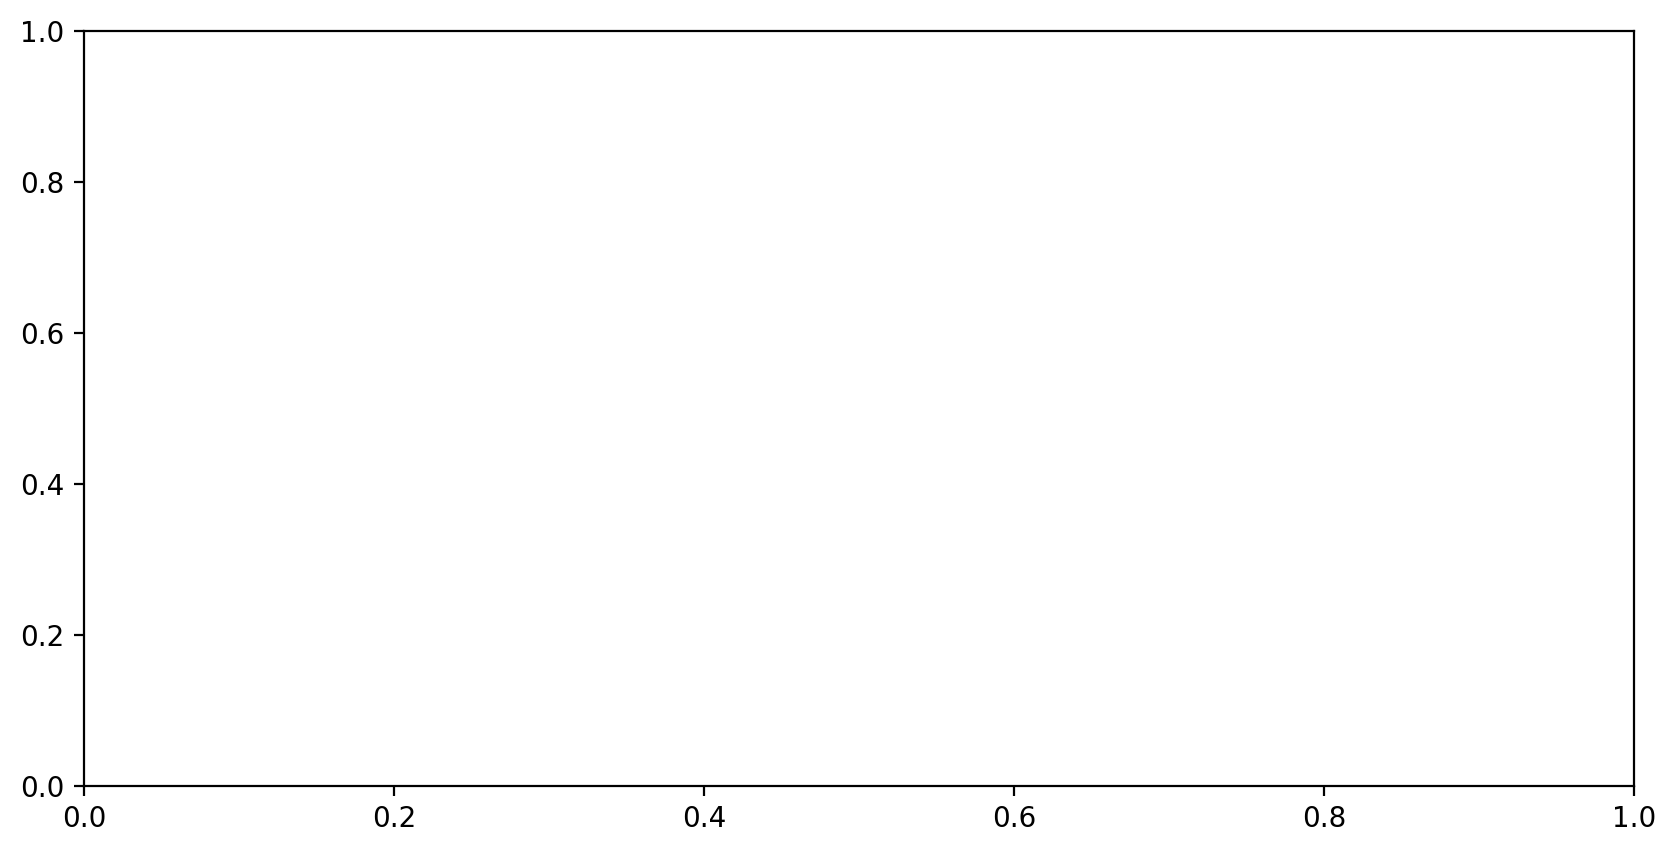

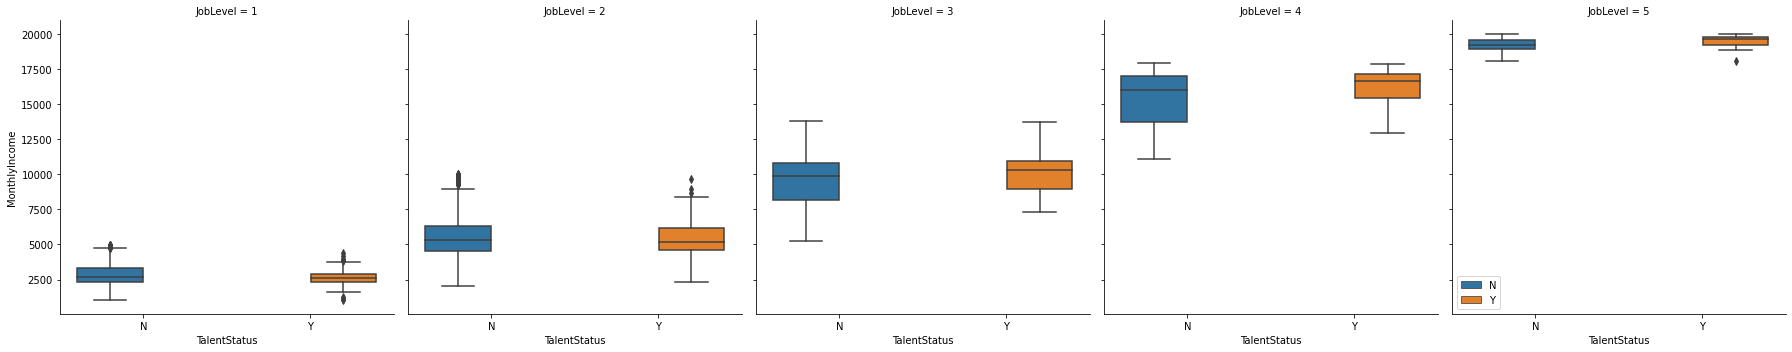

In [ ]:
fig , axes = plt.subplots(1,1, figsize = (10,5), dpi = 200 )

sns.catplot(data = data, x = 'TalentStatus', y = 'MonthlyIncome', col = 'JobLevel', hue ='TalentStatus', kind = 'box')


plt.legend()
plt.show()

In [ ]:
data.groupby(['TalentStatus', 'JobLevel']).aggregate({"OverallSatisfaction": ['count', 'mean', 'std']})

OverallSatisfaction                    
                                    count      mean       std
TalentStatus JobLevel                                        
N            1                        455  2.736703  0.426896
             2                        454  2.741850  0.437494
             3                        185  2.700541  0.432950
             4                         88  2.784091  0.421515
             5                         62  2.761290  0.425173
Y            1                         88  2.654545  0.418786
             2                         80  2.720000  0.439332
             3                         33  2.684848  0.370912
             4                         18  2.722222  0.357369
             5                          7  2.800000  0.432049

## SalaryHike

### SalaryHike - Gender

In [ ]:
data.groupby('Gender').describe()['PercentSalaryHike'].T

Gender      Female        Male
count   588.000000  882.000000
mean     15.197279   15.217687
std       3.700710    3.634587
min      11.000000   11.000000
25%      12.000000   12.000000
50%      14.000000   14.000000
75%      18.000000   18.000000
max      25.000000   25.000000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


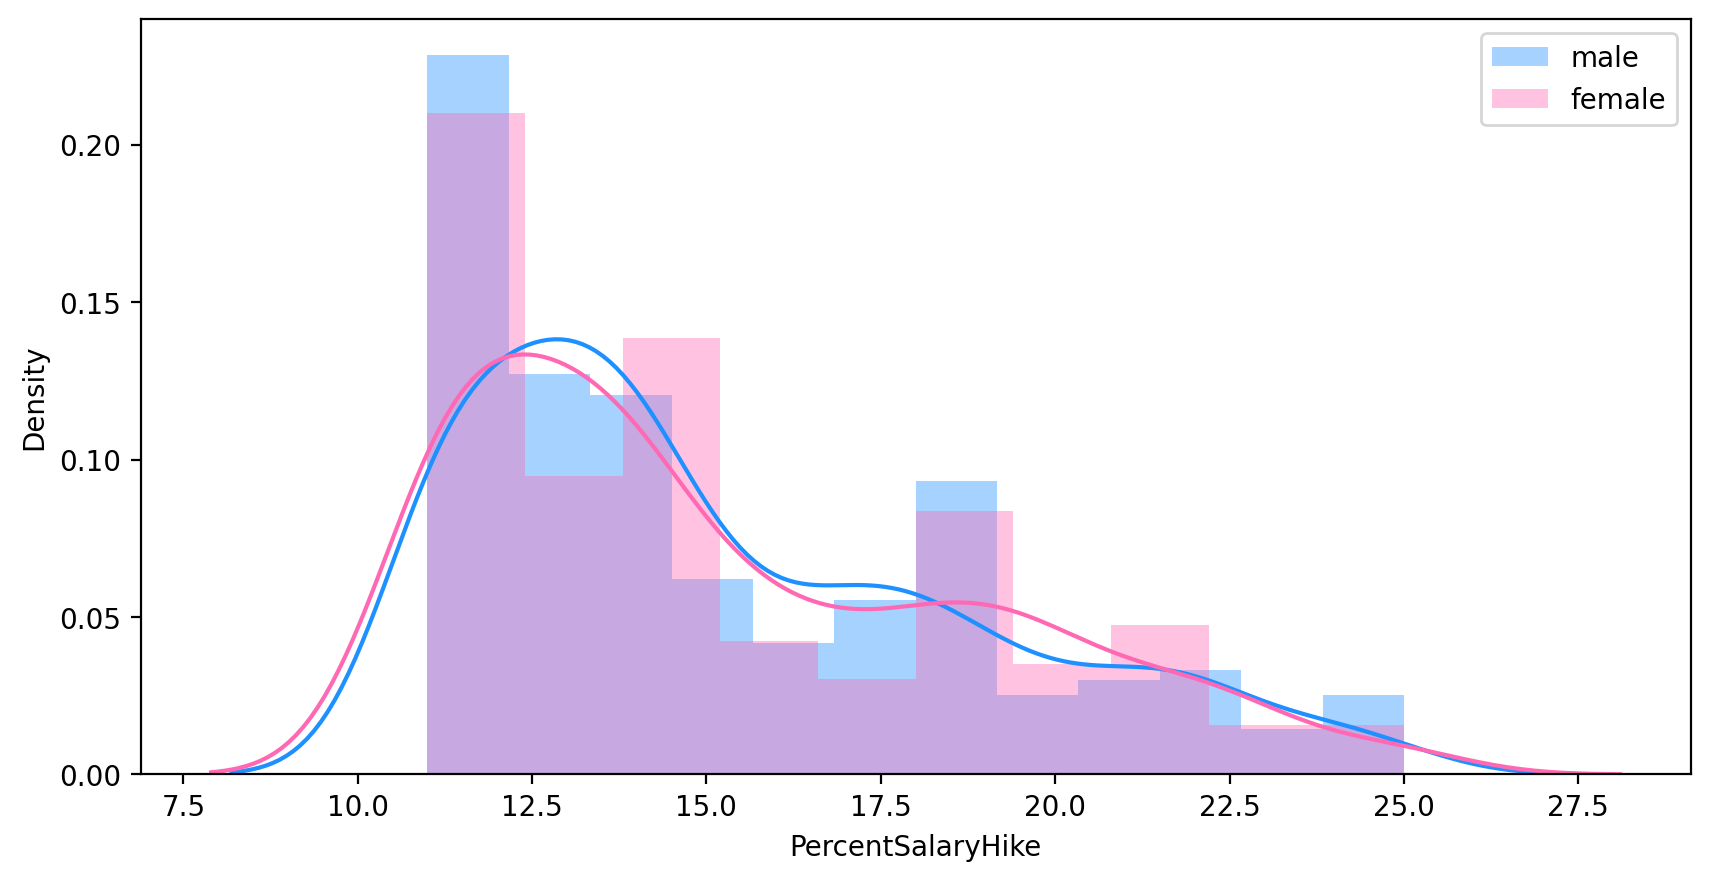

In [ ]:
fig , axes = plt.subplots(1,1, figsize = (10,5), dpi = 200 )

sns.distplot(data[data["Gender"] == 'Male']["PercentSalaryHike"], color = 'dodgerblue', label = 'male', ax = axes)
sns.distplot(data[data["Gender"] == 'Female']["PercentSalaryHike"], color = 'hotpink', label = "female", ax = axes)
plt.legend()

In [ ]:
pg.pairwise_ttests(data = data, dv  = 'PercentSalaryHike', between= ['Gender'])

Contrast       A     B  Paired  Parametric         T          dof  \
0   Gender  Female  Male   False        True -0.104323  1242.378891   

        Tail    p-unc  BF10    hedges  
0  two-sided  0.91693  0.06 -0.005571

### SalaryHike - Department

In [ ]:
data.groupby('Department').describe()['PercentSalaryHike']

count       mean       std   min   25%   50%   75%  \
Department                                                                   
Human Resources          63.0  14.761905  3.617673  11.0  11.5  14.0  17.0   
Research & Development  961.0  15.291363  3.701129  11.0  12.0  14.0  18.0   
Sales                   446.0  15.096413  3.576092  11.0  12.0  14.0  18.0   

                         max  
Department                    
Human Resources         23.0  
Research & Development  25.0  
Sales                   25.0

No handles with labels found to put in legend.


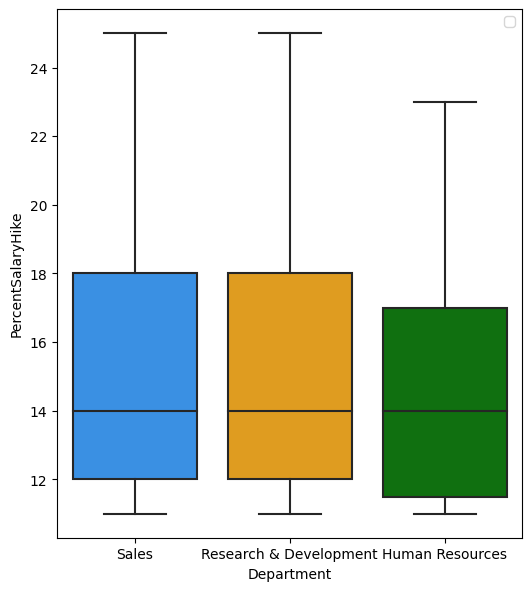

In [ ]:
fig , axes = plt.subplots(1,1, figsize = (6,7), dpi = 100 )

sns.boxplot( data= data, x = 'Department', y = "PercentSalaryHike",
            palette = ['dodgerblue', 'orange', 'green'],
            ax= axes)
plt.legend()
plt.show()

In [ ]:
pg.anova(data = data, dv  = 'PercentSalaryHike', between= ['Department'])

Source  ddof1  ddof2         F    p-unc       np2
0  Department      2   1467  0.924326  0.39703  0.001259

In [ ]:
pg.pairwise_ttests(data = data, dv  = 'PercentSalaryHike', between= ['Department'])

Contrast                       A                       B  Paired  \
0  Department         Human Resources  Research & Development   False   
1  Department         Human Resources                   Sales   False   
2  Department  Research & Development                   Sales   False   

   Parametric         T         dof       Tail     p-unc   BF10    hedges  
0        True -1.123730   70.778799  two-sided  0.264925  0.258 -0.143142  
1        True -0.687972   80.083988  two-sided  0.493458  0.183 -0.093268  
2        True  0.940925  894.895926  two-sided  0.346997  0.099  0.053208

In [ ]:
pg.pairwise_ttests(data = data, dv  = 'PercentSalaryHike', between= ['Department', 'Gender'])

Contrast              Department                       A  \
0           Department                       -         Human Resources   
1           Department                       -         Human Resources   
2           Department                       -  Research & Development   
3               Gender                       -                  Female   
4  Department * Gender         Human Resources                  Female   
5  Department * Gender  Research & Development                  Female   
6  Department * Gender                   Sales                  Female   

                        B Paired  Parametric         T          dof  \
0  Research & Development  False        True -1.123730    70.778799   
1                   Sales  False        True -0.687972    80.083988   
2                   Sales  False        True  0.940925   894.895926   
3                    Male  False        True -0.104323  1242.378891   
4                    Male  False        True -0.234410    34.946443   
5                    Male  False        True -0.720045   804.952979   
6                    Male  False        True  0.951398   393.637442   

        Tail     p-unc   BF10    hedges  
0  two-sided  0.264925  0.258 -0.143142  
1  two-sided  0.493458  0.183 -0.093268  
2  two-sided  0.346997  0.099  0.053208  
3  two-sided  0.916930   0.06 -0.005571  
4  two-sided  0.816035  0.279 -0.064266  
5  two-sided  0.471706  0.095 -0.047539  
6  two-sided  0.341986  0.165  0.091701

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

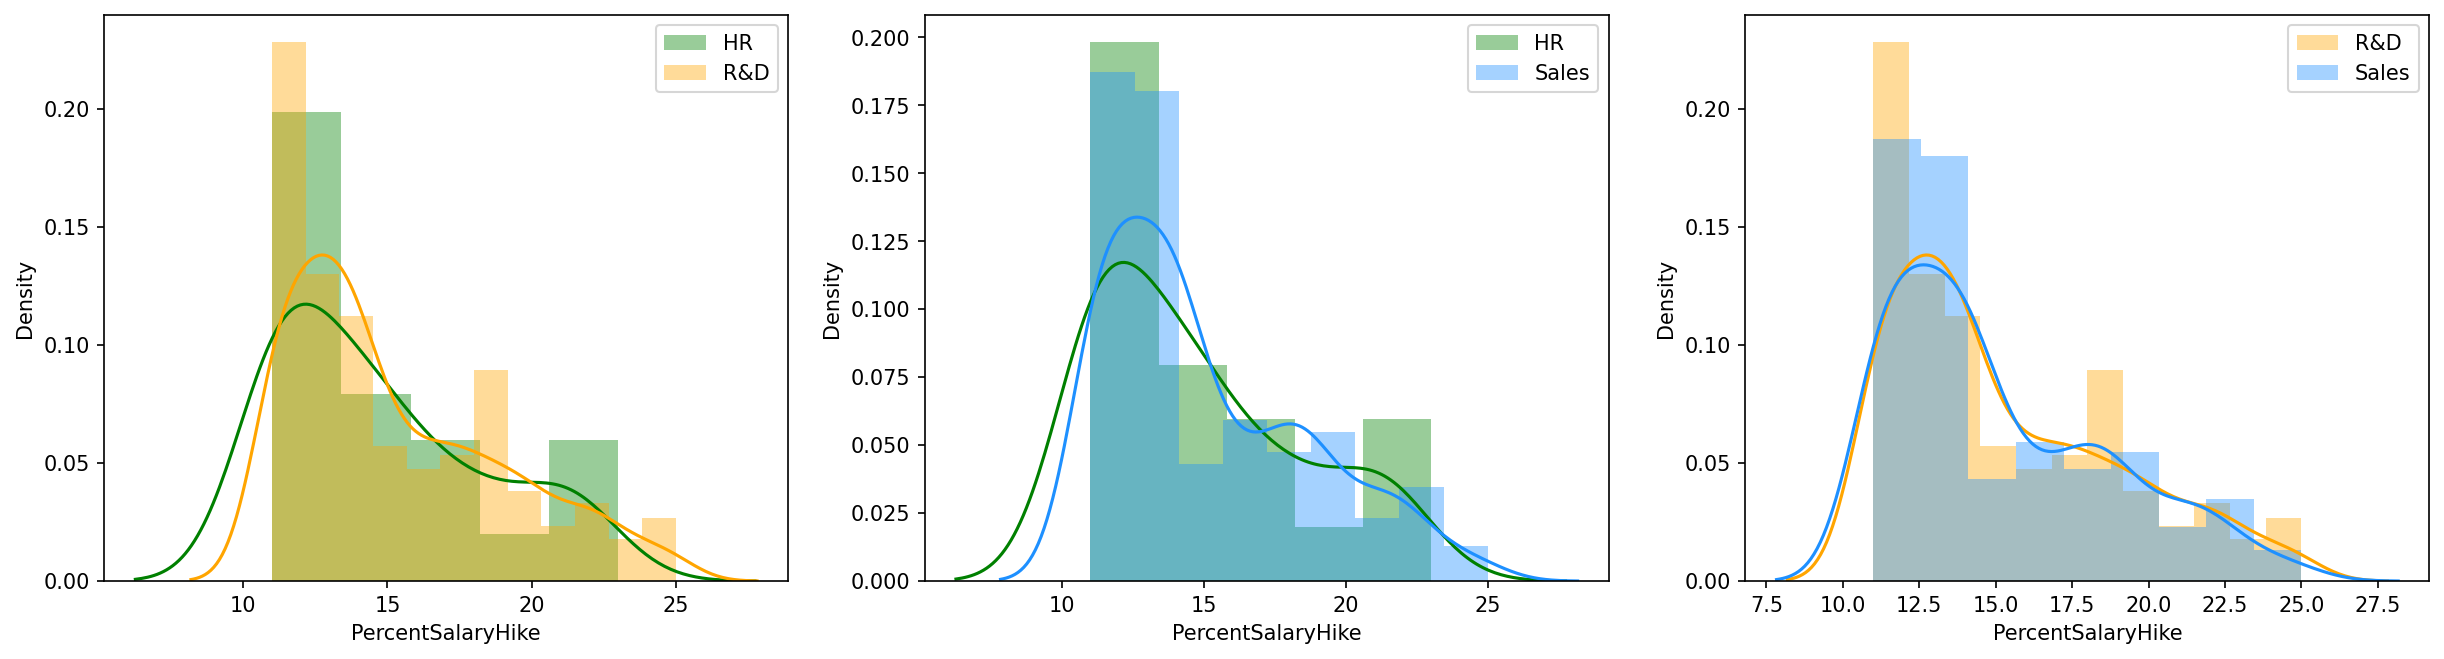

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (20,5), dpi =150)

sns.distplot(data[data["Department"] == "Human Resources"]["PercentSalaryHike"], ax =axes[0], label = 'HR', color = 'green')
sns.distplot(data[data["Department"] == "Research & Development"]["PercentSalaryHike"], ax =axes[0], label = 'R&D', color = 'orange')

sns.distplot(data[data["Department"] == "Human Resources"]["PercentSalaryHike"], ax =axes[1], label = 'HR',  color = 'green')
sns.distplot(data[data["Department"] == "Sales"]["PercentSalaryHike"], ax =axes[1], label = 'Sales', color = 'dodgerblue')

sns.distplot(data[data["Department"] == "Research & Development"]["PercentSalaryHike"], ax =axes[2], label = 'R&D', color = 'orange')
sns.distplot(data[data["Department"] == "Sales"]["PercentSalaryHike"], ax =axes[2], label = 'Sales',  color = 'dodgerblue')

axes[0].legend()
axes[1].legend()
axes[2].legend()

### SalaryHike - JobLevel|

In [ ]:
pg.pairwise_ttests(data = data, dv  = 'PercentSalaryHike', between= ['JobLevel'])

Contrast  A  B  Paired  Parametric         T          dof       Tail  \
0  JobLevel  1  2   False        True  0.450089  1074.991775  two-sided   
1  JobLevel  1  3   False        True  0.365382   396.112177  two-sided   
2  JobLevel  1  4   False        True  0.031734   141.945787  two-sided   
3  JobLevel  1  5   False        True  2.122469    90.338707  two-sided   
4  JobLevel  2  3   False        True  0.029551   391.835156  two-sided   
5  JobLevel  2  4   False        True -0.207304   141.078237  two-sided   
6  JobLevel  2  5   False        True  1.893803    89.814655  two-sided   
7  JobLevel  3  4   False        True -0.206296   195.658102  two-sided   
8  JobLevel  3  5   False        True  1.702514   125.962381  two-sided   
9  JobLevel  4  5   False        True  1.617281   162.392529  two-sided   

      p-unc   BF10    hedges  
0  0.652737  0.075  0.027407  
1  0.715021  0.095  0.029417  
2  0.974729  0.117  0.003556  
3  0.036534  1.173  0.251283  
4  0.976440   0.09  0.002404  
5  0.836072   0.12 -0.023558  
6  0.061470  0.761  0.227888  
7  0.836774  0.133 -0.024967  
8  0.091126  0.584  0.221629  
9  0.107758  0.559  0.239877

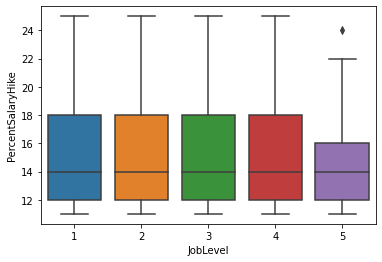

In [ ]:
sns.catplot( data= data, x= "JobLevel", y = 'PercentSalaryHike' , row = )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


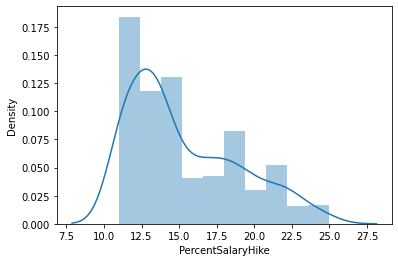

In [ ]:
sns.distplot(data[data["JobLevel"] == 1]["PercentSalaryHike"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

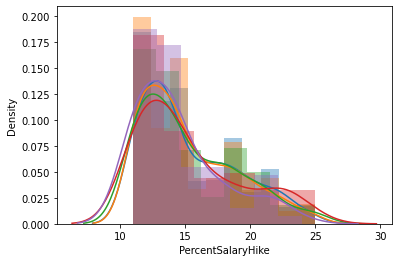

In [ ]:
for level in range(1, 6):
    sns.distplot(data[data["JobLevel"] == level]["PercentSalaryHike"])

### SalaryHike - Talent

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


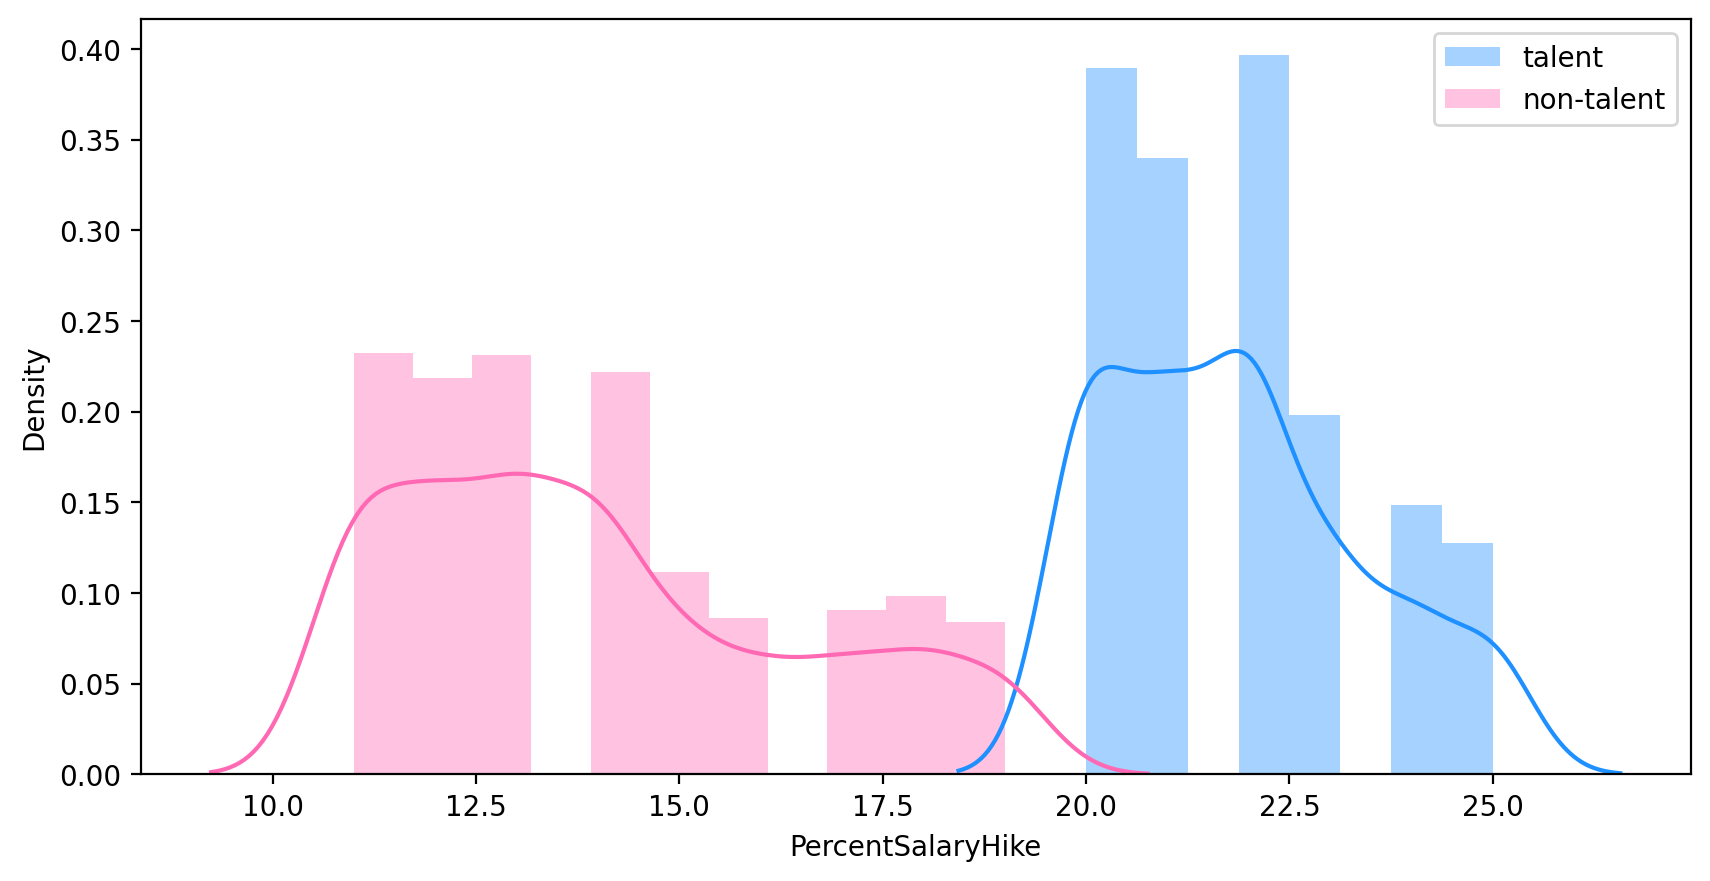

In [ ]:
fig , axes = plt.subplots(1,1, figsize = (10,5), dpi = 200 )

sns.distplot(data[data["TalentStatus"] == 'Y']["PercentSalaryHike"], color = 'dodgerblue', label = 'talent', ax = axes)
sns.distplot(data[data["TalentStatus"] == 'N']["PercentSalaryHike"], color = 'hotpink', label = "non-talent", ax = axes)
plt.legend()
plt.show()

In [ ]:
data.groupby('TalentStatus').describe()['PercentSalaryHike']

count       mean       std   min   25%   50%   75%   max
TalentStatus                                                           
N             1244.0  14.003215  2.434333  11.0  12.0  14.0  16.0  19.0
Y              226.0  21.849558  1.544719  20.0  21.0  22.0  23.0  25.0

In [ ]:
pg.pairwise_ttests(data = data, dv  = 'PercentSalaryHike', between= ['TalentStatus', 'Gender'])

/usr/local/lib/python3.7/dist-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


Contrast TalentStatus       A     B Paired  Parametric  \
0           TalentStatus            -       N     Y  False        True   
1                 Gender            -  Female  Male  False        True   
2  TalentStatus * Gender            N  Female  Male  False        True   
3  TalentStatus * Gender            Y  Female  Male  False        True   

           T          dof       Tail          p-unc   BF10    hedges  
0 -63.388659   456.993186  two-sided  1.510128e-228    inf -3.379993  
1  -0.104323  1242.378891  two-sided   9.169296e-01   0.06 -0.005571  
2  -0.533459  1027.624127  two-sided   5.938309e-01  0.075 -0.031128  
3  -1.114252   193.959715  two-sided   2.665498e-01  0.264 -0.151196

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


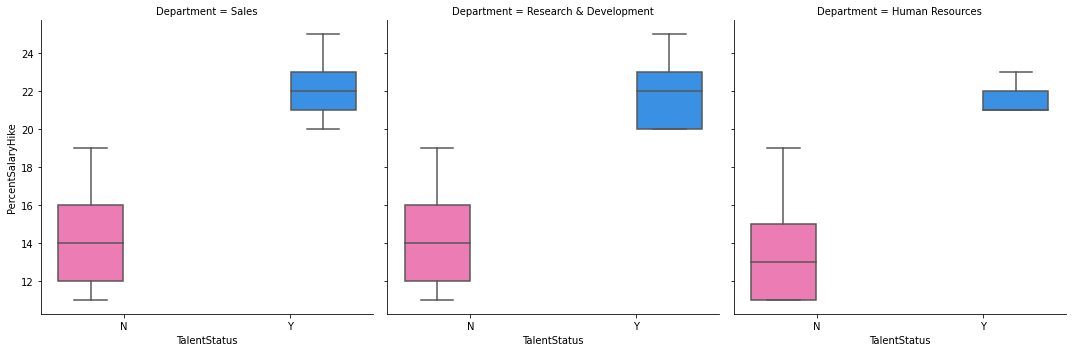

In [ ]:
sns.catplot( data= data, x = 'TalentStatus', y = 'PercentSalaryHike', col = 'Department',
            kind = 'box', hue = 'TalentStatus', ax = axes, hue_order = ['N', 'Y'],
            palette = ['hotpink','dodgerblue'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


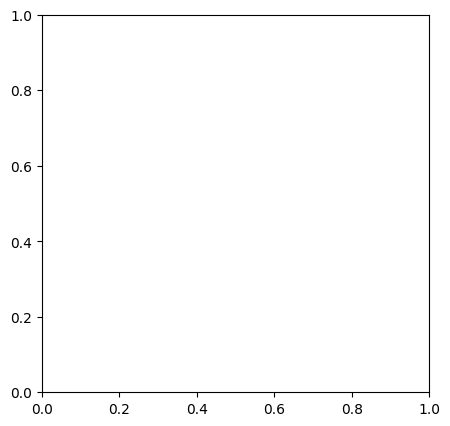

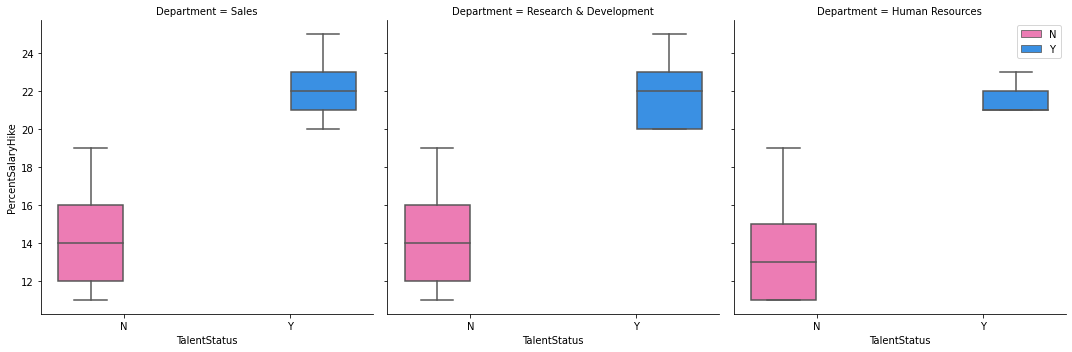

In [ ]:
fig , axes = plt.subplots(1,1, figsize = (5,5), dpi = 100 )

sns.catplot( data= data, x = 'TalentStatus', y = 'PercentSalaryHike', col = 'Department',
            kind = 'box', hue = 'TalentStatus', ax = axes, hue_order = ['N', 'Y'],
            palette = ['hotpink','dodgerblue'])
plt.legend()

In [ ]:
pg.pairwise_ttests(data = data, dv  = 'PercentSalaryHike', between= ['TalentStatus', 'Department'])

/usr/local/lib/python3.7/dist-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


Contrast TalentStatus                       A  \
0               TalentStatus            -                       N   
1                 Department            -         Human Resources   
2                 Department            -         Human Resources   
3                 Department            -  Research & Development   
4  TalentStatus * Department            N         Human Resources   
5  TalentStatus * Department            N         Human Resources   
6  TalentStatus * Department            N  Research & Development   
7  TalentStatus * Department            Y         Human Resources   
8  TalentStatus * Department            Y         Human Resources   
9  TalentStatus * Department            Y  Research & Development   

                        B Paired  Parametric          T         dof  \
0                       Y  False        True -63.388659  456.993186   
1  Research & Development  False        True  -1.123730   70.778799   
2                   Sales  False        True  -0.687972   80.083988   
3                   Sales  False        True   0.940925  894.895926   
4  Research & Development  False        True  -1.032219   59.622097   
5                   Sales  False        True  -1.045354   68.187710   
6                   Sales  False        True  -0.114860  734.527209   
7  Research & Development  False        True  -1.602694   13.180216   
8                   Sales  False        True  -1.231749   19.166771   
9                   Sales  False        True   0.287729  122.057244   

        Tail          p-unc   BF10    hedges  
0  two-sided  1.510128e-228    inf -3.379993  
1  two-sided   2.649246e-01  0.258 -0.143142  
2  two-sided   4.934582e-01  0.183 -0.093268  
3  two-sided   3.469974e-01  0.099  0.053208  
4  two-sided   3.061384e-01  0.252 -0.151388  
5  two-sided   2.995511e-01  0.262 -0.153545  
6  two-sided   9.085875e-01   0.07 -0.007196  
7  two-sided   1.326873e-01  0.883 -0.276211  
8  two-sided   2.329418e-01  0.601 -0.269165  
9  two-sided   7.740424e-01   0.17  0.041182

In [ ]:
pg.pairwise_ttests(data = data, dv  = 'PercentSalaryHike', between= ['Department', 'TalentStatus'])

/usr/local/lib/python3.7/dist-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


Contrast              Department                       A  \
0                 Department                       -         Human Resources   
1                 Department                       -         Human Resources   
2                 Department                       -  Research & Development   
3               TalentStatus                       -                       N   
4  Department * TalentStatus         Human Resources                       N   
5  Department * TalentStatus  Research & Development                       N   
6  Department * TalentStatus                   Sales                       N   

                        B Paired  Parametric          T         dof  \
0  Research & Development  False        True  -1.123730   70.778799   
1                   Sales  False        True  -0.687972   80.083988   
2                   Sales  False        True   0.940925  894.895926   
3                       Y  False        True -63.388659  456.993186   
4                       Y  False        True -18.538915   45.098651   
5                       Y  False        True -50.838180  305.240644   
6                       Y  False        True -34.762024  125.273783   

        Tail          p-unc        BF10    hedges  
0  two-sided   2.649246e-01       0.258 -0.143142  
1  two-sided   4.934582e-01       0.183 -0.093268  
2  two-sided   3.469974e-01       0.099  0.053208  
3  two-sided  1.510128e-228         inf -3.379993  
4  two-sided   1.004535e-22   1.382e+23 -3.249410  
5  two-sided  4.924801e-151  6.966e+269 -3.425672  
6  two-sided   3.414216e-66  3.238e+124 -3.278934

In [ ]:
2.665498e-01 *10

2.665498

## Hourly Rate

## Daily Rate

In [ ]:
m_dailyrate = data[data['Gender'] == 'Male']['DailyRate']
fm_dailyrate = data[data['Gender'] == 'Female']['DailyRate']

pd.DataFrame({'m_dailyrate': m_dailyrate.describe(),
              'fm_dailyrate': fm_dailyrate.describe()})

m_dailyrate  fm_dailyrate
count   882.000000     588.00000
mean    798.626984     808.27381
std     400.509021     408.24168
min     103.000000     102.00000
25%     465.000000     465.75000
50%     783.000000     825.50000
75%    1168.750000    1146.00000
max    1498.000000    1499.00000

Text(0.5, 1.0, 't-score: -0.447, p-value: 0.655')

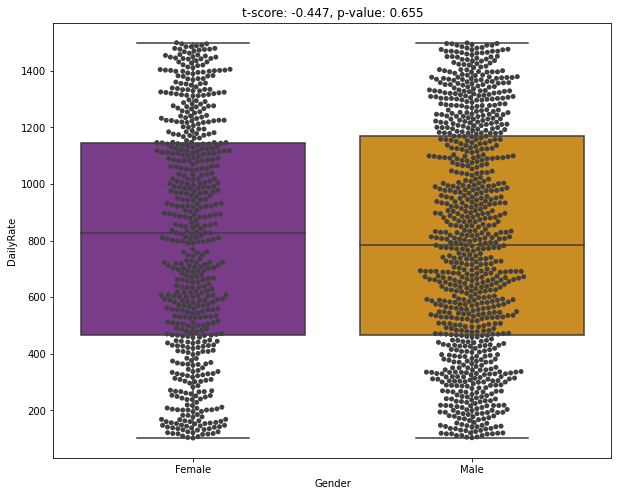

In [ ]:
daily_ttest = stats.ttest_ind(m_dailyrate, fm_dailyrate, equal_var=False,
                               alternative = 'two-sided')


fig, axes = plt.subplots(1,1, figsize = (10,8))
sns.boxplot( data= data, x = 'Gender', y = 'DailyRate', palette = 'CMRmap')
sns.swarmplot(data= data, x = 'Gender', y = 'DailyRate', color=".25")
plt.title(f't-score: {round(daily_ttest[0], 3)}, p-value: {round(daily_ttest[1], 3)}'   )


In [ ]:
m_hourlyrate = data[data['Gender'] == 'Male']['HourlyRate']
fm_hourlyrate = data[data['Gender'] == 'Female']['HourlyRate']

pd.DataFrame({'m_hourlyrate': m_hourlyrate.describe(),
              'fm_hourlyrate': fm_hourlyrate.describe()})

m_hourlyrate  fm_hourlyrate
count    882.000000     588.000000
mean      65.883220      65.903061
std       20.172327      20.580067
min       30.000000      30.000000
25%       48.000000      48.000000
50%       65.000000      67.000000
75%       84.000000      83.000000
max      100.000000     100.000000

Text(0.5, 1.0, 't-score: -0.018, p-value: 0.985')

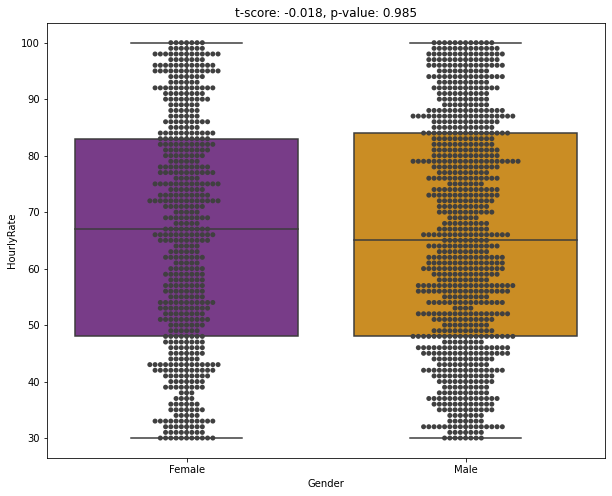

In [ ]:
hourly_ttest = stats.ttest_ind(m_hourlyrate, fm_hourlyrate, equal_var=False,
                               alternative = 'two-sided')


fig, axes = plt.subplots(1,1, figsize = (10,8))
sns.boxplot( data= data, x = 'Gender', y = 'HourlyRate', palette = 'CMRmap')
sns.swarmplot(data= data, x = 'Gender', y = 'HourlyRate', color=".25")
plt.title(f't-score: {round(hourly_ttest[0], 3)}, p-value: {round(hourly_ttest[1], 3)}'   )


## Monthly Rate

In [ ]:
m_monthlyrate = data[data['Gender'] == 'Male']['MonthlyRate']
fm_monthlyrate = data[data['Gender'] == 'Female']['MonthlyRate']

pd.DataFrame({'m_monthlyrate': m_monthlyrate.describe(),
              'fm_monthlyrate': fm_monthlyrate.describe()})

m_monthlyrate  fm_monthlyrate
count     882.000000      588.000000
mean    14072.105442    14674.600340
std      7125.073278     7097.551706
min      2097.000000     2094.000000
25%      7752.750000     8373.750000
50%     13954.000000    14927.500000
75%     20351.500000    20948.000000
max     26999.000000    26997.000000

In [ ]:
scipy.__version__

'1.7.3'

Text(0.5, 1.0, 't-score: -1.592, p-value: 0.112')

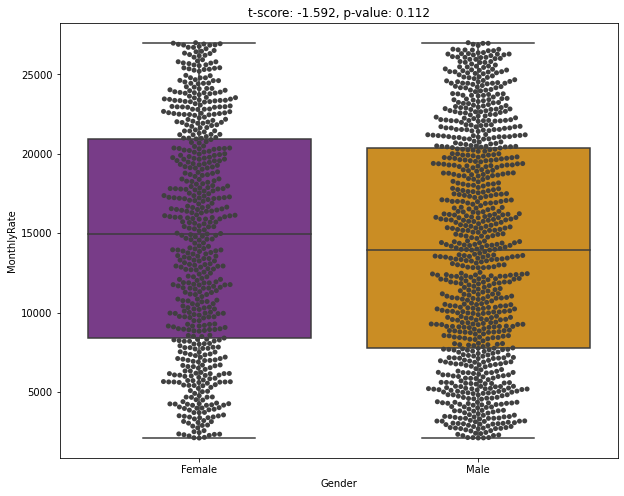

In [ ]:
monthly_ttest = stats.ttest_ind(m_monthlyrate, fm_monthlyrate, equal_var=False, 
                                alternative ='two-sided')


fig, axes = plt.subplots(1,1, figsize = (10,8))
sns.boxplot( data= data, x = 'Gender', y = 'MonthlyRate', palette = 'CMRmap')
sns.swarmplot(data= data, x = 'Gender', y = 'MonthlyRate', color=".25")
plt.title(f't-score: {round(monthly_ttest[0], 3)}, p-value: {round(monthly_ttest[1], 3)}'   )

In [ ]:
gender_list = ['m', 'fm']
output = { }
for gender in gender_list:
    output[f'{gender}_something'] = f'{gender} + something'

print(output)

{'m_something': 'm + something', 'fm_something': 'fm + something'}


## HourlyRate by level and gender

In [ ]:
data.columns.unique()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

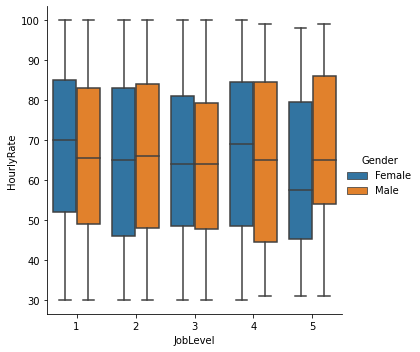

In [ ]:
sns.catplot(data = data, x ='JobLevel', y = 'HourlyRate', kind = 'box', hue ='Gender')

In [ ]:
gender = ["Male", "Female"]
level =[1,2,3,4,5]

test_df = pd.DataFrame(columns = [(x,y) for x in gender for y in level])
test_d = {}
for x, y in [(x,y) for x in gender for y in level]:
    # print(x, y)
    condition =  (data["Gender"] == x)  & (data["JobLevel"] == y) 
    test_df[(x,y)] = data[condition]['HourlyRate'].describe()
    test_d[(x,y)] = data[condition]['HourlyRate'].to_list()

test_df

(Male, 1)   (Male, 2)   (Male, 3)  (Male, 4)  (Male, 5)  (Female, 1)  \
count  344.000000  314.000000  124.000000  55.000000  45.000000   199.000000   
mean    66.133721   66.611465   62.983871  64.836364  68.155556    67.834171   
std     19.954602   20.360379   20.103385  21.508623  19.041767    20.173681   
min     30.000000   30.000000   30.000000  31.000000  31.000000    30.000000   
25%     49.000000   48.000000   47.750000  44.500000  54.000000    52.000000   
50%     65.500000   66.000000   64.000000  65.000000  65.000000    70.000000   
75%     83.000000   84.000000   79.250000  84.500000  86.000000    85.000000   
max    100.000000  100.000000  100.000000  99.000000  99.000000   100.000000   

       (Female, 2)  (Female, 3)  (Female, 4)  (Female, 5)  
count   220.000000    94.000000    51.000000    24.000000  
mean     64.568182    65.776596    66.588235    61.166667  
std      20.973998    20.001158    21.314949    20.931912  
min      30.000000    30.000000    30.000000    31.000000  
25%      46.000000    48.500000    48.500000    45.250000  
50%      65.000000    64.000000    69.000000    57.500000  
75%      83.000000    81.000000    84.500000    79.500000  
max     100.000000   100.000000   100.000000    98.000000

In [ ]:
len(test_d[("Male", 1)])
len(test_d[("Male", 5)])

45

In [ ]:
for level in range(1,6):
    test_score = stats.ttest_ind(test_d[("Male", level)], 
                                 test_d[("Female", level)], 
                                 equal_var=False, alternative ='two-sided')

    print(f'For {level}, the pvalue: {round(test_score[1],3)}')


For 1, the pvalue: 0.343
For 2, the pvalue: 0.263
For 3, the pvalue: 0.31
For 4, the pvalue: 0.675
For 5, the pvalue: 0.18


In [ ]:
pg.pairwise_ttests(data =data[data['JobLevel'] == 1], dv= 'HourlyRate',  between = ['Gender'])

Contrast       A     B  Paired  Parametric        T         dof       Tail  \
0   Gender  Female  Male   False        True  0.95019  409.783154  two-sided   

      p-unc   BF10    hedges  
0  0.342576  0.153  0.084756

In [ ]:
pg.anova(data = data, dv  = 'HourlyRate', between= ['Gender', 'JobLevel', 'Department'])

Source             SS      DF           MS  \
0                          Gender       0.953338     1.0     0.953338   
1                        JobLevel     784.665660     4.0   196.166415   
2                      Department     258.173219     2.0   129.086610   
3               Gender * JobLevel    3396.506908     4.0   849.126727   
4             Gender * Department    5416.164033     2.0  2708.082017   
5           JobLevel * Department    4401.274962     8.0   550.159370   
6  Gender * JobLevel * Department    1958.219814     8.0   244.777477   
7                        Residual  591508.475327  1440.0   410.769775   

          F     p-unc       np2  
0  0.002321  0.961583  0.000002  
1  0.477558  0.752254  0.001325  
2  0.314255  0.730383  0.000436  
3  2.067160  0.082814  0.005709  
4  6.592700  0.001412  0.009073  
5  1.339338  0.219451  0.007386  
6  0.595899  0.781932  0.003300  
7       NaN       NaN       NaN

In [ ]:
pg.pairwise_ttests(data = data, dv  = 'HourlyRate', between= ['Gender','Department'])

Contrast  Gender                       A  \
0               Gender       -                  Female   
1           Department       -         Human Resources   
2           Department       -         Human Resources   
3           Department       -  Research & Development   
4  Gender * Department  Female         Human Resources   
5  Gender * Department  Female         Human Resources   
6  Gender * Department  Female  Research & Development   
7  Gender * Department    Male         Human Resources   
8  Gender * Department    Male         Human Resources   
9  Gender * Department    Male  Research & Development   

                        B Paired  Parametric         T          dof  \
0                    Male  False        True  0.018252  1240.650941   
1  Research & Development  False        True -0.667841    69.361572   
2                   Sales  False        True -0.422759    78.417897   
3                   Sales  False        True  0.556001   863.252440   
4  Research & Development  False        True -2.425613    21.121159   
5                   Sales  False        True -2.864459    23.510215   
6                   Sales  False        True -1.298249   369.870219   
7  Research & Development  False        True  0.710986    47.990471   
8                   Sales  False        True  1.510373    55.595789   
9                   Sales  False        True  1.882058   495.453129   

        Tail     p-unc   BF10    hedges  
0  two-sided  0.985440   0.06  0.000975  
1  two-sided  0.506451  0.176 -0.091710  
2  two-sided  0.673628   0.16 -0.059338  
3  two-sided  0.578354  0.075  0.031900  
4  two-sided  0.024324  3.046 -0.547793  
5  two-sided  0.008649  8.244 -0.653228  
6  two-sided  0.195011  0.224 -0.116145  
7  two-sided  0.480534  0.215  0.115497  
8  two-sided  0.136611  0.503  0.256464  
9  two-sided  0.060414  0.473  0.140159

In [ ]:
pg.pairwise_ttests(data = data, dv  = 'HourlyRate', between= ['Department','Gender'])

Contrast              Department                       A  \
0           Department                       -         Human Resources   
1           Department                       -         Human Resources   
2           Department                       -  Research & Development   
3               Gender                       -                  Female   
4  Department * Gender         Human Resources                  Female   
5  Department * Gender  Research & Development                  Female   
6  Department * Gender                   Sales                  Female   

                        B Paired  Parametric         T          dof  \
0  Research & Development  False        True -0.667841    69.361572   
1                   Sales  False        True -0.422759    78.417897   
2                   Sales  False        True  0.556001   863.252440   
3                    Male  False        True  0.018252  1240.650941   
4                    Male  False        True -2.652007    38.536844   
5                    Male  False        True -0.801832   802.625571   
6                    Male  False        True  2.112707   396.133027   

        Tail     p-unc   BF10    hedges  
0  two-sided  0.506451  0.176 -0.091710  
1  two-sided  0.673628   0.16 -0.059338  
2  two-sided  0.578354  0.075  0.031900  
3  two-sided  0.985440   0.06  0.000975  
4  two-sided  0.011554  4.672 -0.698536  
5  two-sided  0.422888  0.101 -0.052983  
6  two-sided  0.035251  0.915  0.203313

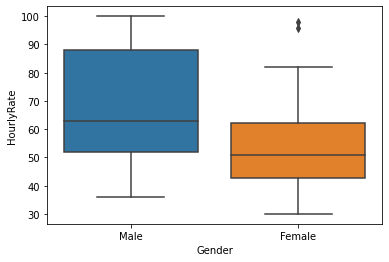

In [ ]:
sns.boxplot(data = data[data["Department"] == 'Human Resources'], x = "Gender" , y ='HourlyRate')

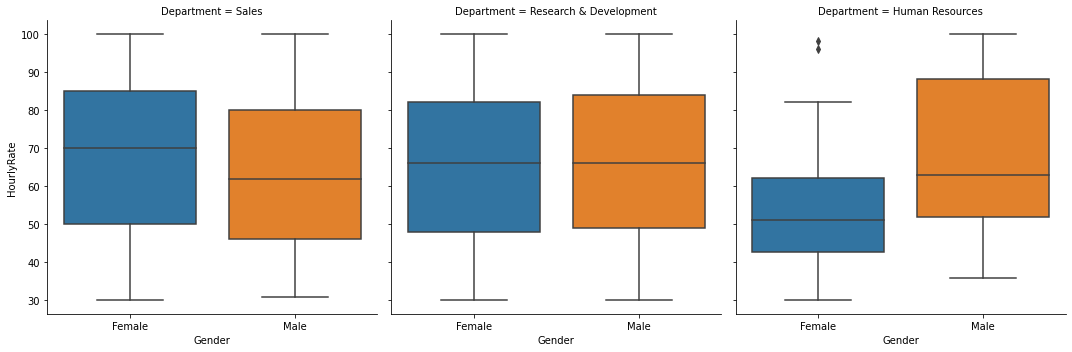

In [ ]:
sns.catplot(data = data, col ='Department', x = "Gender" , y ='HourlyRate' , kind= 'box')

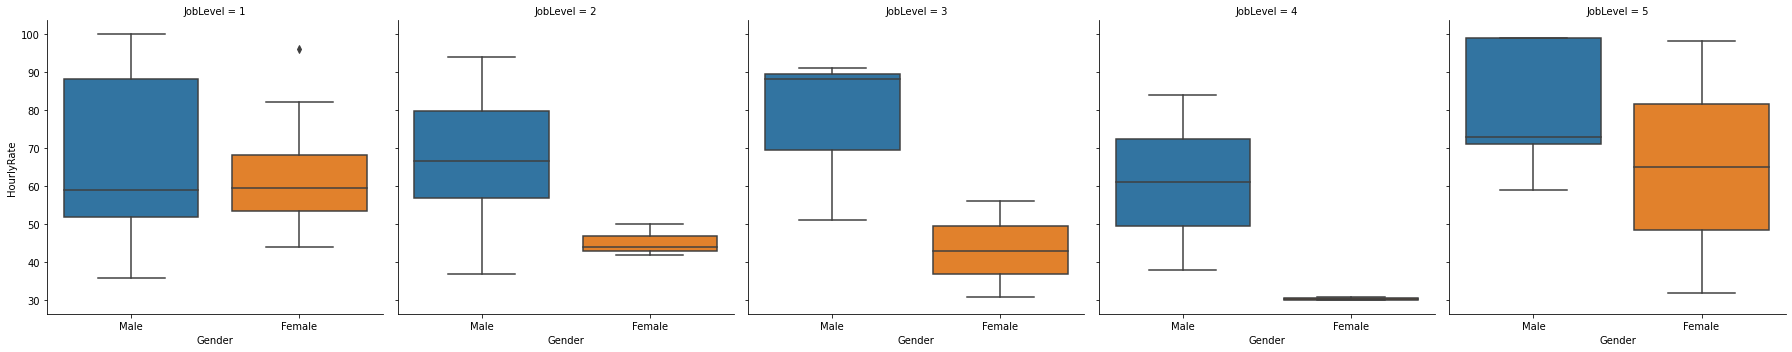

In [ ]:
sns.catplot(data = data[data['Department']== 'Human Resources'], col ='JobLevel',
            x = "Gender" , y ='HourlyRate' , kind= 'box')

In [ ]:
pg.pairwise_ttests(data = data[data["Department"] == "Human Resources"], 
                   parametric = True, marginal = True, correction = 'auto',
                   dv  = 'HourlyRate', between= ["JobLevel", 'Gender'])

Contrast JobLevel       A     B Paired  Parametric         T  \
0            JobLevel        -       1     2  False        True  0.500898   
1            JobLevel        -       1     3  False        True  0.530373   
2            JobLevel        -       1     4  False        True  1.486655   
3            JobLevel        -       1     5  False        True -1.009307   
4            JobLevel        -       2     3  False        True  0.219450   
5            JobLevel        -       2     4  False        True  1.204545   
6            JobLevel        -       2     5  False        True -1.237113   
7            JobLevel        -       3     4  False        True  0.875708   
8            JobLevel        -       3     5  False        True -1.151722   
9            JobLevel        -       4     5  False        True -1.880867   
10             Gender        -  Female  Male  False        True -2.652007   
11  JobLevel * Gender        1  Female  Male  False        True -0.539267   
12  JobLevel * Gender        2  Female  Male  False        True -3.563288   
13  JobLevel * Gender        3  Female  Male  False        True -2.259923   
14  JobLevel * Gender        4  Female  Male  False        True -1.325774   
15  JobLevel * Gender        5  Female  Male  False        True -0.447516   

          dof       Tail     p-unc   BF10    hedges  
0   24.026506  two-sided  0.621001   0.35  0.154790  
1    6.343282  two-sided  0.613901  0.436  0.261324  
2    3.473904  two-sided  0.221672  0.898  0.927477  
3    7.767508  two-sided  0.343230  0.544 -0.472691  
4    7.827135  two-sided  0.831914  0.431  0.114691  
5    4.020478  two-sided  0.294462  0.726  0.782597  
6    9.649968  two-sided  0.245304  0.689 -0.609549  
7    6.306476  two-sided  0.413296  0.627  0.516871  
8   10.798260  two-sided  0.274297  0.693 -0.594466  
9    6.240458  two-sided  0.107142  1.281 -1.085296  
10  38.536844  two-sided  0.011554  4.672 -0.698536  
11  23.230817  two-sided  0.594834  0.394 -0.176313  
12  10.915893  two-sided  0.004500   8.51 -1.248213  
13   4.000000  two-sided  0.086688  1.482 -1.476176  
14   2.000000  two-sided  0.316073  0.892 -0.757585  
15   1.121250  two-sided  0.725559  0.601 -0.485825

In [ ]:
data[data['Department'] == "Human Resources"].groupby(["JobLevel", "Gender"]).aggregate({'HourlyRate' : ['mean' , 'count']})

HourlyRate      
                      mean count
JobLevel Gender                 
1        Female  63.000000    10
         Male    66.739130    23
2        Female  45.333333     3
         Male    67.600000    10
3        Female  43.333333     3
         Male    76.666667     3
4        Female  30.500000     2
         Male    61.000000     2
5        Female  65.000000     2
         Male    80.200000     5

In [ ]:
data[data['Department'] == "Human Resources"].groupby(["JobLevel"]).aggregate({'HourlyRate' : ['mean' , 'count']})

HourlyRate      
               mean count
JobLevel                 
1         65.606061    33
2         62.461538    13
3         60.000000     6
4         45.750000     4
5         75.857143     7

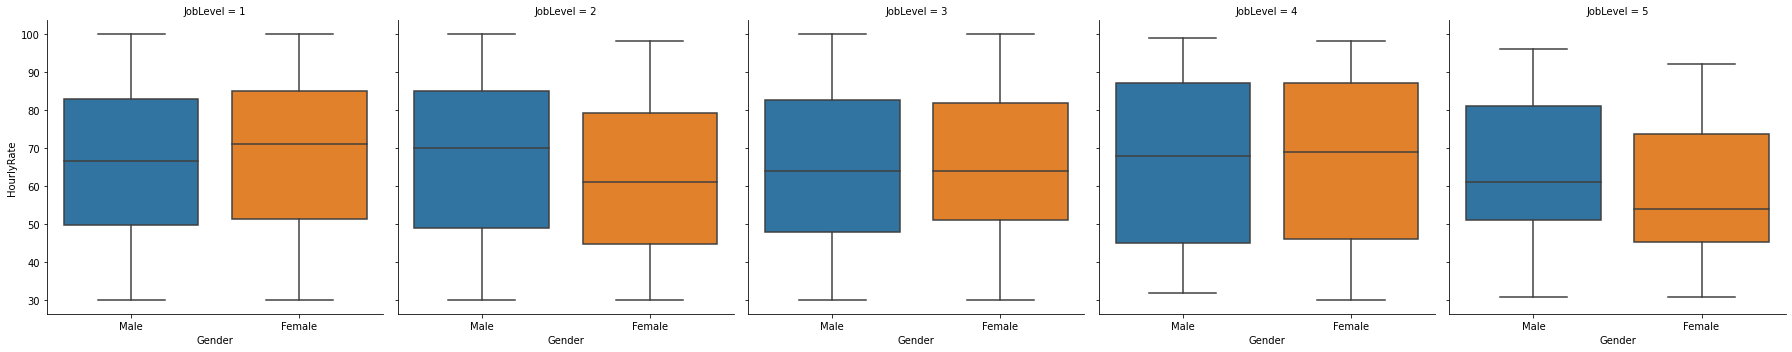

In [ ]:
sns.catplot(data = data[data['Department']== 'Research & Development'], col ='JobLevel',
            x = "Gender" , y ='HourlyRate' , kind= 'box')

In [ ]:
pg.pairwise_ttests(data = data[data["Department"] == "Research & Development"], 
                   parametric = True, marginal = True, correction = 'auto',
                   dv  = 'HourlyRate', between= ["JobLevel", 'Gender'])

Contrast JobLevel       A     B Paired  Parametric         T  \
0            JobLevel        -       1     2  False        True  0.963156   
1            JobLevel        -       1     3  False        True  0.969601   
2            JobLevel        -       1     4  False        True  0.120156   
3            JobLevel        -       1     5  False        True  1.766385   
4            JobLevel        -       2     3  False        True  0.201995   
5            JobLevel        -       2     4  False        True -0.395317   
6            JobLevel        -       2     5  False        True  1.194383   
7            JobLevel        -       3     4  False        True -0.499806   
8            JobLevel        -       3     5  False        True  0.965546   
9            JobLevel        -       4     5  False        True  1.240225   
10             Gender        -  Female  Male  False        True -0.801832   
11  JobLevel * Gender        1  Female  Male  False        True  0.638892   
12  JobLevel * Gender        2  Female  Male  False        True -2.039305   
13  JobLevel * Gender        3  Female  Male  False        True  0.581509   
14  JobLevel * Gender        4  Female  Male  False        True -0.088400   
15  JobLevel * Gender        5  Female  Male  False        True -1.147959   

           dof       Tail     p-unc   BF10    hedges  
0   578.079431  two-sided  0.335872  0.135  0.074397  
1   208.689376  two-sided  0.333368  0.175  0.097484  
2    84.891128  two-sided  0.904644  0.144  0.016892  
3    60.647471  two-sided  0.082364  0.693  0.255187  
4   257.485675  two-sided  0.840080   0.12  0.021138  
5    97.829712  two-sided  0.693470  0.159 -0.055271  
6    69.929993  two-sided  0.236364  0.323  0.172328  
7   125.362462  two-sided  0.618088  0.182 -0.076909  
8    91.463947  two-sided  0.336817  0.276  0.157150  
9   111.560458  two-sided  0.217494  0.397  0.225109  
10  802.625571  two-sided  0.422888  0.101 -0.052983  
11  311.913748  two-sided  0.523362  0.135  0.064220  
12  247.718371  two-sided  0.042481  0.952 -0.246423  
13  126.849272  two-sided  0.561929   0.22  0.101695  
14   63.565777  two-sided  0.929837  0.251 -0.021309  
15   31.174875  two-sided  0.259718  0.508 -0.338105

In [ ]:
data[data['Department'] == "Research & Development"].groupby(["JobLevel", "Gender"]).aggregate({'HourlyRate' : ['mean' , 'count']})

HourlyRate      
                      mean count
JobLevel Gender                 
1        Female  67.974026   154
         Male    66.696429   280
2        Female  62.646552   116
         Male    67.751515   165
3        Female  66.274194    62
         Male    64.223881    67
4        Female  66.548387    31
         Male    67.027027    37
5        Female  57.750000    16
         Male    64.212121    33

In [ ]:
pg.pairwise_ttests(data = data, dv  = 'HourlyRate', between= ['Department','Gender'])

Contrast              Department                       A  \
0           Department                       -         Human Resources   
1           Department                       -         Human Resources   
2           Department                       -  Research & Development   
3               Gender                       -                  Female   
4  Department * Gender         Human Resources                  Female   
5  Department * Gender  Research & Development                  Female   
6  Department * Gender                   Sales                  Female   

                        B Paired  Parametric         T          dof  \
0  Research & Development  False        True -0.667841    69.361572   
1                   Sales  False        True -0.422759    78.417897   
2                   Sales  False        True  0.556001   863.252440   
3                    Male  False        True  0.018252  1240.650941   
4                    Male  False        True -2.652007    38.536844   
5                    Male  False        True -0.801832   802.625571   
6                    Male  False        True  2.112707   396.133027   

        Tail     p-unc   BF10    hedges  
0  two-sided  0.506451  0.176 -0.091710  
1  two-sided  0.673628   0.16 -0.059338  
2  two-sided  0.578354  0.075  0.031900  
3  two-sided  0.985440   0.06  0.000975  
4  two-sided  0.011554  4.672 -0.698536  
5  two-sided  0.422888  0.101 -0.052983  
6  two-sided  0.035251  0.915  0.203313

In [ ]:
print(data[(data['Gender'] == 'Female')  & (data['Department'] == 'Human Resources')]['HourlyRate'].describe())
print(data[(data['Gender'] == 'Female')  & (data['Department'] == 'Research & Development')]['HourlyRate'].describe())

count    20.00000
mean     54.35000
std      20.05066
min      30.00000
25%      42.75000
50%      51.00000
75%      62.25000
max      98.00000
Name: HourlyRate, dtype: float64
count    379.000000
mean      65.517150
std       20.361978
min       30.000000
25%       48.000000
50%       66.000000
75%       82.000000
max      100.000000
Name: HourlyRate, dtype: float64


In [ ]:
pg.pairwise_ttests(data =data, dv= 'HourlyRate', subject = 'JobLevel',  between = 'Gender', interaction = False)

Contrast       A     B  Paired  Parametric         T          dof  \
0   Gender  Female  Male   False        True  0.018252  1240.650941   

        Tail    p-unc  BF10    hedges  
0  two-sided  0.98544  0.06  0.000975

In [ ]:
data[data['JobLevel'] == 1]

Age Attrition     BusinessTravel  DailyRate              Department  \
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
...   ...       ...                ...        ...                     ...   
1455   40        No      Travel_Rarely       1322  Research & Development   
1457   40        No      Travel_Rarely       1194  Research & Development   
1458   35        No      Travel_Rarely        287  Research & Development   
1460   29        No      Travel_Rarely        468  Research & Development   
1464   26        No      Travel_Rarely       1167                   Sales   

      DistanceFromHome  Education EducationField  EmployeeCount  \
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
5                    2          2  Life Sciences              1   
6                    3          3        Medical              1   
...                ...        ...            ...            ...   
1455                 2          4  Life Sciences              1   
1457                 2          4        Medical              1   
1458                 1          4  Life Sciences              1   
1460                28          4        Medical              1   
1464                 5          3          Other              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
5                  8  ...                         3            80   
6                 10  ...                         1            80   
...              ...  ...                       ...           ...   
1455            2048  ...                         4            80   
1457            2051  ...                         2            80   
1458            2052  ...                         4            80   
1460            2054  ...                         2            80   
1464            2060  ...                         4            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
5                    0                  8                      2   
6                    3                 12                      3   
...                ...                ...                    ...   
1455                 0                  8                      2   
1457                 3                 20                      2   
1458                 1                  4                      5   
1460                 0                  5                      3   
1464                 0                  5                      2   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
5                  2               7                  7   
6                  2               1                  0   
...              ...             ...                ...   
1455               3               2                  2   
1457               3               5                  3   
1458               3               4                  3   
1460               1               5    

In [ ]:
data.columns.unique()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

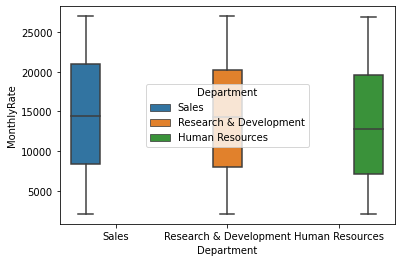

In [ ]:
sns.boxplot(data= data, x= 'Department', y = 'MonthlyRate', hue= 'Department')

In [ ]:
data.groupby("Department")["HourlyRate"].describe()

count       mean        std   min   25%   50%   75%  \
Department                                                                    
Human Resources          63.0  64.301587  21.562090  30.0  47.0  59.0  85.5   
Research & Development  961.0  66.167534  20.249281  30.0  49.0  66.0  84.0   
Sales                   446.0  65.520179  20.354461  30.0  48.0  66.0  83.0   

                          max  
Department                     
Human Resources         100.0  
Research & Development  100.0  
Sales                   100.0

In [ ]:
pg.pairwise_ttests(data =data, dv= 'HourlyRate', between = 'Department', interaction = True)

Contrast                       A                       B  Paired  \
0  Department         Human Resources  Research & Development   False   
1  Department         Human Resources                   Sales   False   
2  Department  Research & Development                   Sales   False   

   Parametric         T         dof       Tail     p-unc   BF10    hedges  
0        True -0.667841   69.361572  two-sided  0.506451  0.176 -0.091710  
1        True -0.422759   78.417897  two-sided  0.673628   0.16 -0.059338  
2        True  0.556001  863.252440  two-sided  0.578354  0.075  0.031900

In [ ]:
pg.pairwise_tukey(data =data, dv= 'HourlyRate', between = 'Department')

A                       B    mean(A)    mean(B)  \
0         Human Resources  Research & Development  64.301587  66.167534   
1         Human Resources                   Sales  64.301587  65.520179   
2  Research & Development                   Sales  66.167534  65.520179   

       diff        se         T   p-tukey    hedges  
0 -1.865947  2.645050 -0.705449  0.740111 -0.091678  
1 -1.218592  2.737392 -0.445165  0.889014 -0.059827  
2  0.647354  1.165289  0.555531  0.825878  0.031812

In [ ]:
pg.pairwise_ttests(data =data, dv= 'HourlyRate', between = 'Department')

Contrast                       A                       B  Paired  \
0  Department         Human Resources  Research & Development   False   
1  Department         Human Resources                   Sales   False   
2  Department  Research & Development                   Sales   False   

   Parametric         T         dof       Tail     p-unc   BF10    hedges  
0        True -0.667841   69.361572  two-sided  0.506451  0.176 -0.091710  
1        True -0.422759   78.417897  two-sided  0.673628   0.16 -0.059338  
2        True  0.556001  863.252440  two-sided  0.578354  0.075  0.031900

In [ ]:
pg.pairwise_tukey(data =data, dv= 'HourlyRate', between = 'Department')

A                       B    mean(A)    mean(B)  \
0         Human Resources  Research & Development  64.301587  66.167534   
1         Human Resources                   Sales  64.301587  65.520179   
2  Research & Development                   Sales  66.167534  65.520179   

       diff        se         T   p-tukey    hedges  
0 -1.865947  2.645050 -0.705449  0.740111 -0.091678  
1 -1.218592  2.737392 -0.445165  0.889014 -0.059827  
2  0.647354  1.165289  0.555531  0.825878  0.031812

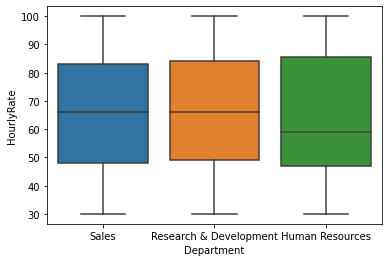

In [ ]:
sns.boxplot( data =data , x = 'Department', y ='HourlyRate')

In [ ]:
pg.pairwise_ttests(data =data, dv= 'HourlyRate', between = 'Gender', interaction = True)

Contrast       A     B  Paired  Parametric         T          dof  \
0   Gender  Female  Male   False        True  0.018252  1240.650941   

        Tail    p-unc  BF10    hedges  
0  two-sided  0.98544  0.06  0.000975

In [ ]:
pg.pairwise_ttests(data =data, dv= 'HourlyRate', between = ['Gender', 'Education'], interaction = True)

Contrast  Gender       A     B Paired  Parametric         T  \
0               Gender       -  Female  Male  False        True  0.018252   
1            Education       -       1     2  False        True -0.587520   
2            Education       -       1     3  False        True -0.339086   
3            Education       -       1     4  False        True -0.546404   
4            Education       -       1     5  False        True -0.952278   
5            Education       -       2     3  False        True  0.388384   
6            Education       -       2     4  False        True  0.094861   
7            Education       -       2     5  False        True -0.645122   
8            Education       -       3     4  False        True -0.324692   
9            Education       -       3     5  False        True -0.846118   
10           Education       -       4     5  False        True -0.704873   
11  Gender * Education  Female       1     2  False        True -0.588535   
12  Gender * Education  Female       1     3  False        True -0.512697   
13  Gender * Education  Female       1     4  False        True -0.435690   
14  Gender * Education  Female       1     5  False        True -0.415278   
15  Gender * Education  Female       2     3  False        True  0.179118   
16  Gender * Education  Female       2     4  False        True  0.234013   
17  Gender * Education  Female       2     5  False        True -0.060038   
18  Gender * Education  Female       3     4  False        True  0.080806   
19  Gender * Education  Female       3     5  False        True -0.150473   
20  Gender * Education  Female       4     5  False        True -0.181928   
21  Gender * Education    Male       1     2  False        True -0.291291   
22  Gender * Education    Male       1     3  False        True -0.029607   
23  Gender * Education    Male       1     4  False        True -0.369479   
24  Gender * Education    Male       1     5  False        True -0.938918   
25  Gender * Education    Male       2     3  False        True  0.358163   
26  Gender * Education    Male       2     4  False        True -0.069677   
27  Gender * Education    Male       2     5  False        True -0.811355   
28  Gender * Education    Male       3     4  False        True -0.488471   
29  Gender * Education    Male       3     5  False        True -0.990148   
30  Gender * Education    Male       4     5  False        True -0.794335   

            dof       Tail     p-unc   BF10    hedges  
0   1240.650941  two-sided  0.985440   0.06  0.000975  
1    358.352951  two-sided  0.557225  0.127 -0.056850  
2    265.821897  two-sided  0.734813  0.103 -0.030452  
3    315.001892  two-sided  0.585175  0.118 -0.050306  
4     71.982759  two-sided  0.344143  0.267 -0.160845  
5    530.436662  two-sided  0.697888  0.088  0.028818  
6    596.739044  two-sided  0.924457  0.087  0.007404  
7     62.109813  two-sided  0.521224  0.204 -0.104680  
8    833.447443  two-sided  0.745496  0.077 -0.021321  
9     53.422655  two-sided  0.401261  0.227 -0.140267  
10    57.085864  two-sided  0.483755  0.208 -0.114494  
11   126.607859  two-sided  0.557222  0.201 -0.090996  
12    92.639932  two-sided  0.609383  0.178 -0.073234  
13   106.301999  two-sided  0.663945   0.18 -0.066476  
14    34.572315  two-sided  0.680505  0.274 -0.107130  
15   221.298861  two-sided  0.858009  0.127  0.020582  
16   238.472182  two-sided  0.815176  0.138  0.028946  
17    29.022751  two-sided  0.952537  0.241 -0.014112  
18   334.349888  two-sided  0.935645  0.115  0.008308  
19    24.492438  two-sided  0.881624  0.234 -0.035660  
20    26.069928  two-sided  0.857047   0.24 -0.044771  
21   228.259538  two-sided  0.771093  0.141 -0.036000  
22   170.866749  two-sided  0.976415  0.121 -0.003418  
23   207.216562  two-sided  0.712148  0.135 -0.042602  
24    36.219123  two-sided  0.353992  0.334 -0.211318  
25   306.806833  two-sided  0.720467  0.112  0.034780  
26   356.256564  two-sided  0.944490 

In [ ]:
import numpy as np

In [ ]:
a = np.random.randint(low =1, high= 10, size = (10, 5))
print(a.shape)

(10, 5)


In [ ]:
a[:  , [1,-1]]

array([[1, 9],
       [5, 5],
       [4, 7],
       [7, 6],
       [5, 6],
       [3, 9],
       [6, 1],
       [2, 1],
       [1, 7],
       [7, 5]])

In [ ]:
a

array([[5, 1, 8, 2, 9],
       [5, 5, 9, 1, 5],
       [3, 4, 4, 2, 7],
       [4, 7, 6, 5, 6],
       [4, 5, 6, 9, 6],
       [2, 3, 7, 1, 9],
       [9, 6, 6, 6, 1],
       [6, 2, 9, 4, 1],
       [8, 1, 1, 2, 7],
       [5, 7, 3, 4, 5]])

NameError: ignored

# Deployment

In [ ]:
pip install gradio

     |████████████████████████████████| 2.9 MB 13.0 MB/s 
     |████████████████████████████████| 2.0 MB 46.3 MB/s 
     |████████████████████████████████| 1.1 MB 45.6 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 84 kB 2.5 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 211 kB 58.8 MB/s 
     |████████████████████████████████| 253 kB 49.9 MB/s 
     |████████████████████████████████| 94 kB 2.8 MB/s 
     |████████████████████████████████| 144 kB 44.4 MB/s 
     |████████████████████████████████| 271 kB 45.0 MB/s 
     |████████████████████████████████| 58 kB 4.5 MB/s 
     |████████████████████████████████| 10.9 MB 40.1 MB/s 
     |████████████████████████████████| 79 kB 6.1 MB/s 
     |████████████████████████████████| 43 kB 1.4 MB/s 
     |████████████████████████████████| 856 kB 41.4 MB/s 
     |████████████████████████████████| 61 kB 317 kB/s 
     |███████████████████████

In [ ]:
import gradio as gr

In [ ]:
X_train.columns

Index(['binarized_Gender', 'binarized_OverTime', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Age', 'MonthlyRate', 'DistanceFromHome',
       'PercentSalaryHike', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction',
       'WorkLifeBalance'],
      dtype='object')

In [ ]:
X_train.head()

binarized_Gender  binarized_OverTime  BusinessTravel_Non-Travel  \
1194                 0                   0                          0   
128                  1                   0                          0   
810                  1                   0                          0   
478                  1                   0                          0   
491                  1                   1                          0   

      BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
1194                                 0                             1   
128                                  0                             1   
810                                  0                             1   
478                                  0                             1   
491                                  1                             0   

      Department_Human Resources  Department_Research & Development  \
1194                           0                                  0   
128                            0                                  1   
810                            0                                  0   
478                            0                                  0   
491                            0                                  1   

      Department_Sales  MaritalStatus_Divorced  MaritalStatus_Married  ...  \
1194                 1                       1                      0  ...   
128                  0                       0                      1  ...   
810                  1                       0                      1  ...   
478                  1                       0                      1  ...   
491                  0                       1                      0  ...   

      PercentSalaryHike  TrainingTimesLastYear  YearsAtCompany  \
1194          -0.337129              -0.605389       -0.665706   
128           -0.337129              -0.605389       -0.830071   
810           -0.880974               0.190962        0.813578   
478           -1.152896              -1.401740       -0.008246   
491           -0.609051               0.190962        0.156119   

      YearsInCurrentRole  YearsWithCurrManager  EnvironmentSatisfaction  \
1194           -0.625365             -0.616406                        2   
128            -0.905635             -0.897047                        3   
810             1.336527              1.348076                        1   
478            -0.064824              0.506155                        2   
491             0.775986              0.786795                        4   

      JobInvolvement  JobSatisfaction  RelationshipSatisfaction  \
1194               4                2                         3   
128                3                4                         3   
810                3                3                         4   
478                3                3                         3   
491                3                3                         2   

      WorkLifeBalance  
1194                3  
128                 3  
810                 3  
478                 3  
491                 3  

[5 rows x 24 columns]

In [ ]:
# test_input = np.random.randint(5, size=(1, 24))
test_input = np.zeros( (1, 24))

def attrition_prob(gender, ot, travel, department, m_stat, age, rate, distance):
    test_input = np.zeros( (1, 24))
    if gender == "Male":
        test_input[:, 0 ] =1
    else:
        test_input[:, 0 ] =0


    if ot == "Yes":
        test_input[:, 1 ] =1
    else:
        test_input[:, 1 ] =0


    if travel == "None":
        test_input[:, 2 ] =1
    elif travel =='Rarely':
        test_input[:, 4 ] =1
    elif travel =='Frequently':
        test_input[:, 3 ] =1


    if department == "HR":
        test_input[:, 5 ] =1
    elif department =='R&D':
        test_input[:, 6 ] =1
    elif department =='Sales':
        test_input[:, 7 ] =1



    if m_stat == "Divorced":
        test_input[:, 8 ] =1
    elif m_stat =='Married':
        test_input[:, 9 ] =1
    elif m_stat =='Single':
        test_input[:, 10 ] =1

    test_input[:, 11 ] = (age - copy_data['Age'].mean()) / copy_data['Age'].std()
    
    test_input[:, 12 ] = (rate - copy_data['MonthlyRate'].mean()) / copy_data['MonthlyRate'].std()
    test_input[:, 13 ] = (distance - copy_data['DistanceFromHome'].mean()) / copy_data['DistanceFromHome'].std()

    test_input[:, 14: ]  = X_train.iloc[:, 14:].mean(axis = 0)

    pred = svm_clf2.predict_proba(test_input)
    leaving_prob = round(float(pred[:, -1]), 4) * 100
    prob_pred = np.max(svm_clf2.predict_proba(test_input))
    predicted_class_idx = np.argmax(svm_clf2.predict_proba(test_input))
    if predicted_class_idx == 0:
        predicted_class = 'Stay'
    else:
        predicted_class = 'Leave'

    
    return {"Stay": float(pred[:, 0]), "Leave": float(pred[:, 1])}
    
    
    # test_input, pred, prob_pred, predicted_class, f'The probability of leaving: {leaving_prob}%'


In [ ]:
attrition_prob('Male', 'Yes', 'Rarely', 'R&D', 'Married', 50, 30000, 30)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


{'Leave': 0.15034190194109043, 'Stay': 0.8496580980589096}

In [ ]:
input1 = gr.inputs.Dropdown(['Female', 'Male'], label="Gender")
input2 = gr.inputs.Dropdown(['Yes', 'No'], label="Is this role required to work overtime?", default = 'Yes')
input3 = gr.inputs.Radio(choices = ['None', 'Rarely', 'Frequently'], label="Travel frequency of this applied role")
input4 = gr.inputs.Radio(choices = ['HR', 'R&D', 'Sales'], label="Applied Department")
input5 = gr.inputs.Radio(choices = ['Single', 'Married', 'Divorced'], label="Marital Status")
input6 = gr.inputs.Slider(minimum=20, maximum=65, step=1, default=35, label= 'Age', optional=False)
input7 = gr.inputs.Number(label = 'Expected Salary (THB)')
input8 = gr.inputs.Number(label = 'Distance from Home (Km)')

# input2 = gr.inputs.Textbox(placeholder="Enter Last Name")

output = gr.outputs.Label(num_top_classes=2, label = 'Probabiliy distribution') 

gui = gr.Interface(fn=attrition_prob,
                   inputs= [input1, input2, input3, input4, input5, input6, input7, input8],
                   outputs=[output],
                   title="Predicted attrition rate of new hires",
                   description = 'This system helps determine the likelihood of IBM new hires leavning the organization',
                   theme = 'dark-grass')

gui.launch()



Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://55308.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f0db5d52ed0>,
 'http://127.0.0.1:7860/',
 'https://55308.gradio.app')

In [ ]:
print('im happy')

im happy


In [ ]:
!git clone https://huggingface.co/spaces/Carlosito16/BIA-IBMAttrition

Cloning into 'BIA-IBMAttrition'...
fatal: could not read Username for 'https://huggingface.co': No such device or address


# Plotly

In [ ]:
px.scatter(data ,x  = ['Age'], y = 'DistanceFromHome', facet_col = 'Gender', color = 'Attrition', trendline="ols")

In [ ]:
px.scatter_3d(data ,x  = 'BusinessTravel', y = 'DistanceFromHome',z = 'OverTime', color = 'Attrition')

In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'somethingnew', 'OverallSatisfaction',
       'MinimumSatis', 'EngagementType', '%SalOver18', 'TalentStatus',
       'Hours'],
      dtype='object')